In [1066]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import kendalltau, spearmanr, chi2_contingency, ttest_ind, bartlett, kruskal, mannwhitneyu,f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas.plotting import scatter_matrix
from sklearn.decomposition import FactorAnalysis as FA
from sklearn.decomposition import PCA
from sklearn import metrics
#!pip install fanalysis
#!pip install --user mca
#from mca import MCA as mca
#from fanalysis.mca import MCA as f_mca
#from fanalysis.ca import CA
!pip install prince
from prince import CA, MCA, FAMD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
import sqlite3

In [1067]:
os.getcwd()

'C:\\Users\\cleme\\Documents\\DU_Python\\Projet Data'

# Gestion et traitement des différentes bases de données

In [1068]:
# importation de la base des communes et département
Base1 = pd.read_csv("fremuni17.csv", sep=";", decimal=".", on_bad_lines="skip")

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\4219943727.py:2: DtypeWarning:

Columns (14,24,30,34,38,46,49,50,53,54,56) have mixed types. Specify dtype option on import or set low_memory=False.



In [1069]:
Base1

,PK_UID,INSEE_COM,NOM_COM,DEPT,geometry,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,1,32216,LOURTIES-MONBRUN,32,list(list(c(499484.6,499739.3,500441.5,501566.9,501891.3,502181.4,503114.2,503076.3,501568.1,501653.6,502173.7,501699.6,501701.6,502985.6,502806.2,502183.3,501002.3,499637.1,499484.6,6265244.29999999,6266207.19999999,6265965.59999999,6266822.49999999,6267443.09999999,6266895.19999999,6266626.79999999,6265180.59999999,6265454.79999999,6265043.59999999,6264999.29999999,6264558.69999999,6264198.09999999,6263516.09999999,6263087.09999999,6262782.59999999,6263228.89999999,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6264177.19999999,6265244.29999999))),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,47033,BOUDY-DE-BEAUREGARD,47,list(list(c(513668,515868.9,516216.1,516992.9,516922.7,517448.6,516906.7,517152.7,515304.1,514320.8,514817.3,513576.9,513668,6388041.19999999,6386486.39999999,6386783.19999999,6386495.99999999,6385857.19999999,6384941.79999999,6384171.99999999,6383590.79999999,6383361.39999999,6384320.19999999,6385206.39999999,6386812.09999999,6388041.19999999))),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,32009,ARMOUS-ET-CAU,32,list(list(c(470691.8,472102.8,472474.9,473151.9,474752.3,474744.6,474436,474764.1,474850.8,472941.9,472070.2,472330.9,471055.4,471398,470691.8,6279747.69999999,6279799.99999999,6280584.09999999,6280675.39999999,6280446.59999999,6279869.99999999,6279516.99999999,6278729.09999999,6278452.59999999,6278110.79999999,6276867.99999999,6276681.29999999,6276907.09999999,6278775.89999999,6279747.69999999))),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,38225,MEAUDRE,38,list(list(c(896082.3,895867.5,895965.9,897019.5,897739.6,899078.1,900312.3,902581.5,902293.4,901177.7,900649.9,899705,897838.6,896082.3,6447566.89999999,6448273.09999999,6451814.89999999,6454681.19999999,6454765.89999999,6453927.19999999,6454327.09999999,6453998.99999999,6452092.29999999,6451336.59999999,6450571.79999999,6447582.69999999,6447915.49999999,6447566.89999999))),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50029,36569,47310,TONNEINS,47,list(list(c(484313.7,484639.1,483941,485762.2,487214.8,487608.6,487683.7,488376.2,489668.7,490778.1,489301.7,489253.6,488137.4,488401.6,487656.7,485497.6,484745.1,485013,484313.7,6369374.89999999,6369456.1,6370687.69999999,6371890.39999999,6373532.69999999,6373122.89999999,6372067.29999999,6371236.4,6370973.99999999,6370255.59999999,6369230.19999999,6367768.6,6366033.59999999,6364401.89999999,6363848.69999999,6363939.5,6366326.29999999,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50030,6367677.79999999,6369374.89999999))),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [1070]:
# sélestion des 4 variables importantes pour l'analyse
Base1_reduit = Base1.iloc[:, :4]

In [1071]:
Base1_reduit

,PK_UID,INSEE_COM,NOM_COM,DEPT
0,1,32216,LOURTIES-MONBRUN,32
1,6264177.19999999,6265244.29999999))),NaN,NaN
2,2,47033,BOUDY-DE-BEAUREGARD,47
3,3,32009,ARMOUS-ET-CAU,32
4,4,38225,MEAUDRE,38
...,...,...,...,...
50029,36569,47310,TONNEINS,47
50030,6367677.79999999,6369374.89999999))),NaN,NaN
50031,36570,27664,LE TRONQUAY,27
50032,6925678.39999861,6925708.39999862,6925552.19999861,6925210.79999861


* traitement des données manquantes de la base des communes: base 1

In [1072]:
# on regarde le nombre de lignes dans la base
len(Base1_reduit)

50034

In [1073]:
# on obtient le nombre de valeurs manquantes pour chaque variable
Base1_reduit.isna().sum()

PK_UID          0
INSEE_COM    2321
NOM_COM      4022
DEPT         4621
dtype: int64

* Il y a au moins une NAN dans le nom de la commune et le département.

* On va traiter ces NaN en supprimant les observations.

In [1074]:
# pr supprimer les observations où il y a au moins une NAN
Base1_reduit.dropna(axis=0)

,PK_UID,INSEE_COM,NOM_COM,DEPT
0,1,32216,LOURTIES-MONBRUN,32
2,2,47033,BOUDY-DE-BEAUREGARD,47
3,3,32009,ARMOUS-ET-CAU,32
4,4,38225,MEAUDRE,38
5,5,62890,WILLEMAN,62
...,...,...,...,...
50028,36568,68101,GALFINGUE,68
50029,36569,47310,TONNEINS,47
50031,36570,27664,LE TRONQUAY,27
50032,6925678.39999861,6925708.39999862,6925552.19999861,6925210.79999861


In [1075]:
# On constat Les valeurs float comme: 6925678.39999861	6925708.39999862 6925552.19999861	6925210.79999861 qui sont des anomalies qu'on va supprimer

In [1076]:
# S'assurer que PK_UID est bien en numérique
Base1_reduit["PK_UID"] = pd.to_numeric(Base1_reduit["PK_UID"], errors='coerce')

# Supprimer les lignes où PK_UID contient des float
Base1_clean = Base1_reduit[Base1_reduit["PK_UID"].apply(lambda x: x.is_integer() if not pd.isna(x) else False)]

# Réinitialiser l'index après suppression
Base1_clean.reset_index(drop=True, inplace=True)

# Afficher les premières lignes après nettoyage
print(Base1_clean.head())


   PK_UID INSEE_COM              NOM_COM DEPT
0     1.0     32216     LOURTIES-MONBRUN   32
1     2.0     47033  BOUDY-DE-BEAUREGARD   47
2     3.0     32009        ARMOUS-ET-CAU   32
3     4.0     38225              MEAUDRE   38
4     5.0     62890             WILLEMAN   62


C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\2356125097.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1077]:
Base1_clean

,PK_UID,INSEE_COM,NOM_COM,DEPT
0,1.0,32216,LOURTIES-MONBRUN,32
1,2.0,47033,BOUDY-DE-BEAUREGARD,47
2,3.0,32009,ARMOUS-ET-CAU,32
3,4.0,38225,MEAUDRE,38
4,5.0,62890,WILLEMAN,62
...,...,...,...,...
36575,36567.0,64461,PUYOO,64
36576,36568.0,68101,GALFINGUE,68
36577,36569.0,47310,TONNEINS,47
36578,36570.0,27664,LE TRONQUAY,27


In [1078]:
# Convertir PK_UID en entier pour un éventuel la jointure
Base1_clean["PK_UID"] = Base1_clean["PK_UID"].astype(int)

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\2916950579.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1079]:
Base1_clean1 = Base1_clean.copy()

* Traitement des doublons pour la Base1 : commune et département.

In [1080]:
# on regarde le nombre de lignes dans la base
len(Base1_clean1)

36580

In [1081]:
# on regarde combien il y a d'individus sur la clé primaire
Base1_clean1.PK_UID.nunique()

36580

In [1082]:
sum(Base1_clean1.duplicated())

0

In [1083]:
# On remarqu'il n' y a pas de doublons dans la bas des départements

In [1084]:
 # Supprimer les lignes où le nom de la commune contient des valeurs de type float
Base1_clean2 = Base1_clean1[Base1_clean1["NOM_COM"].apply(lambda x: isinstance(x, str))]

# Réinitialiser l'index après suppression
Base1_clean2.reset_index(drop=True, inplace=True)

# Afficher les premières lignes après nettoyage
Base1_clean2

,PK_UID,INSEE_COM,NOM_COM,DEPT
0,1,32216,LOURTIES-MONBRUN,32
1,2,47033,BOUDY-DE-BEAUREGARD,47
2,3,32009,ARMOUS-ET-CAU,32
3,4,38225,MEAUDRE,38
4,5,62890,WILLEMAN,62
...,...,...,...,...
36574,36567,64461,PUYOO,64
36575,36568,68101,GALFINGUE,68
36576,36569,47310,TONNEINS,47
36577,36570,27664,LE TRONQUAY,27


In [1085]:
# Supprimer les lignes où la colonne 'DEPT' contient des valeurs float
Base1_clean3 = Base1_clean2[Base1_clean2["DEPT"].apply(lambda x: not isinstance(x, float))]

# Réinitialiser l'index après suppression
Base1_clean3.reset_index(drop=True, inplace=True)

# Afficher les premières lignes après suppression
Base1_clean3.head()


,PK_UID,INSEE_COM,NOM_COM,DEPT
0,1,32216,LOURTIES-MONBRUN,32
1,2,47033,BOUDY-DE-BEAUREGARD,47
2,3,32009,ARMOUS-ET-CAU,32
3,4,38225,MEAUDRE,38
4,5,62890,WILLEMAN,62


In [1086]:
Base1_clean3

,PK_UID,INSEE_COM,NOM_COM,DEPT
0,1,32216,LOURTIES-MONBRUN,32
1,2,47033,BOUDY-DE-BEAUREGARD,47
2,3,32009,ARMOUS-ET-CAU,32
3,4,38225,MEAUDRE,38
4,5,62890,WILLEMAN,62
...,...,...,...,...
36574,36567,64461,PUYOO,64
36575,36568,68101,GALFINGUE,68
36576,36569,47310,TONNEINS,47
36577,36570,27664,LE TRONQUAY,27


In [1087]:
# Filtrer les lignes où PK_UID est un entier avec au plus 5 chiffres
BASE1 = Base1_clean3[Base1_clean3['PK_UID'].between(0, 99999)]  
# Garder uniquement les nombres entre 0 et 99999 vu qu'il y a des anomalies entre les lignes

In [1088]:
BASE1

,PK_UID,INSEE_COM,NOM_COM,DEPT
0,1,32216,LOURTIES-MONBRUN,32
1,2,47033,BOUDY-DE-BEAUREGARD,47
2,3,32009,ARMOUS-ET-CAU,32
3,4,38225,MEAUDRE,38
4,5,62890,WILLEMAN,62
...,...,...,...,...
36574,36567,64461,PUYOO,64
36575,36568,68101,GALFINGUE,68
36576,36569,47310,TONNEINS,47
36577,36570,27664,LE TRONQUAY,27


In [1089]:
# Exporter le DataFrame ass_sin en fichier CSV
BASE1.to_csv("Departement.csv", index=False)

## Importation et traitement de la base2: base des sinistres

In [1090]:
base2= pd.read_csv("pg17trainclaim.csv",sep = ";", decimal = ",")
base2

,id_client,id_vehicle,id_year,id_claim,claim_nb,claim_amount
0,A00047578,V01,Year 0,CL01,1,1236
1,A00058432,V01,Year 0,CL01,1,59.84
2,A00047550,V01,Year 0,CL02,1,2683.76
3,A00012792,V01,Year 0,CL01,1,84.05
4,A00032112,V01,Year 0,CL01,1,104.49
...,...,...,...,...,...,...
14540,A00064771,V01,Year 0,CL01,1,145.08
14541,A00078851,V01,Year 0,CL01,1,2453.28
14542,A00067797,V01,Year 0,CL01,1,142.4
14543,A00085199,V01,Year 0,CL01,1,557.66


* Nettoyage de la base 2

In [1091]:
#Créer id_policy dans la base des sinistres (concaténation id_client et id_vehicle) pour permettre la jointure : 
base2["id_policy"] = base2["id_client"] + "-" + base2["id_vehicle"]

In [1092]:
base2.sort_values(by=["id_policy"])

,id_client,id_vehicle,id_year,id_claim,claim_nb,claim_amount,id_policy
13443,A00000009,V01,Year 0,CL01,1,927.16,A00000009-V01
7470,A00000016,V01,Year 0,CL01,1,555.48,A00000016-V01
6256,A00000026,V01,Year 0,CL01,1,478.01,A00000026-V01
2907,A00000040,V01,Year 0,CL01,1,512.83,A00000040-V01
501,A00000056,V01,Year 0,CL01,1,1236,A00000056-V01
...,...,...,...,...,...,...,...
6404,A00189426,V01,Year 0,CL01,1,708.04,A00189426-V01
5079,A00189881,V01,Year 0,CL01,1,1257.41,A00189881-V01
8259,A00190489,V01,Year 0,CL01,1,1186.12,A00190489-V01
14063,A00190782,V01,Year 0,CL01,1,824.65,A00190782-V01


In [1093]:
# on regarde le nombre de lignes dans la base
len(base2) 

14545

In [1094]:
# on regarde combien il y a d'individus sur la clé primaire
base2.id_policy.nunique()

12954

In [1095]:
# nous donne le nombre de doublons
len(base2)-base2.id_policy.nunique() 

1591

In [1096]:
sum(base2.duplicated('id_policy'))

1591

In [1097]:
sum(base2.duplicated())
# nombre de doublons purs/parfaits (quand 2 observations sont identiques sur toutes les variables)

0

In [1098]:
base2[base2.duplicated("id_policy")] 
# nombre de lignes qui se répètent les lignes qui se répètent

,id_client,id_vehicle,id_year,id_claim,claim_nb,claim_amount,id_policy
264,A00040145,V01,Year 0,CL02,1,1171.66,A00040145-V01
378,A00033418,V01,Year 0,CL02,1,1243.35,A00033418-V01
412,A00057995,V02,Year 0,CL03,1,1236,A00057995-V02
414,A00011219,V01,Year 0,CL01,1,427.8,A00011219-V01
609,A00053406,V01,Year 0,CL02,1,0,A00053406-V01
...,...,...,...,...,...,...,...
14515,A00014543,V01,Year 0,CL02,1,740.48,A00014543-V01
14526,A00032383,V01,Year 0,CL02,1,82.66,A00032383-V01
14530,A00054421,V01,Year 0,CL02,1,363.22,A00054421-V01
14531,A00060285,V01,Year 0,CL01,1,1236,A00060285-V01


In [1099]:
# keep = false permet de conserver la première occurence des lignes qui sont doublons
doublons = base2[base2.duplicated("id_policy", keep = False)].sort_values("id_policy") 
doublons

,id_client,id_vehicle,id_year,id_claim,claim_nb,claim_amount,id_policy
292,A00000103,V01,Year 0,CL01,1,1389.39,A00000103-V01
3790,A00000103,V01,Year 0,CL02,1,419.63,A00000103-V01
7704,A00000210,V01,Year 0,CL01,1,231.31,A00000210-V01
8380,A00000210,V01,Year 0,CL02,1,588.5,A00000210-V01
3931,A00000221,V01,Year 0,CL01,1,671.47,A00000221-V01
...,...,...,...,...,...,...,...
10849,A00091466,V01,Year 0,CL01,1,856.64,A00091466-V01
8889,A00105274,V01,Year 0,CL02,1,2683.76,A00105274-V01
6445,A00105274,V01,Year 0,CL01,1,1146.34,A00105274-V01
1056,A00116003,V01,Year 0,CL01,1,5087.17,A00116003-V01


In [1100]:
# base des sinistres sans doublons
base2_ssDoub = base2[~base2.duplicated("id_policy")]

In [1101]:
base2_ssDoub 

,id_client,id_vehicle,id_year,id_claim,claim_nb,claim_amount,id_policy
0,A00047578,V01,Year 0,CL01,1,1236,A00047578-V01
1,A00058432,V01,Year 0,CL01,1,59.84,A00058432-V01
2,A00047550,V01,Year 0,CL02,1,2683.76,A00047550-V01
3,A00012792,V01,Year 0,CL01,1,84.05,A00012792-V01
4,A00032112,V01,Year 0,CL01,1,104.49,A00032112-V01
...,...,...,...,...,...,...,...
14540,A00064771,V01,Year 0,CL01,1,145.08,A00064771-V01
14541,A00078851,V01,Year 0,CL01,1,2453.28,A00078851-V01
14542,A00067797,V01,Year 0,CL01,1,142.4,A00067797-V01
14543,A00085199,V01,Year 0,CL01,1,557.66,A00085199-V01


In [1102]:
# Vérificationn des données manquantes
base2_ssDoub.isna().sum()

id_client       0
id_vehicle      0
id_year         0
id_claim        0
claim_nb        0
claim_amount    0
id_policy       0
dtype: int64

In [1103]:
# Vérifications des doublons
base2_ssDoub.duplicated().sum() 

0

* vérification du type des variables de la base des sinistres

In [1104]:
base2_ssDoub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12954 entries, 0 to 14544
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_client     12954 non-null  object
 1   id_vehicle    12954 non-null  object
 2   id_year       12954 non-null  object
 3   id_claim      12954 non-null  object
 4   claim_nb      12954 non-null  int64 
 5   claim_amount  12954 non-null  object
 6   id_policy     12954 non-null  object
dtypes: int64(1), object(6)
memory usage: 809.6+ KB


In [1105]:
# le coût des sinistres est en chaîne de caractère ce qui n'est pas normal

In [1106]:
BASE2=base2_ssDoub.copy()

In [1107]:
BASE2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12954 entries, 0 to 14544
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_client     12954 non-null  object
 1   id_vehicle    12954 non-null  object
 2   id_year       12954 non-null  object
 3   id_claim      12954 non-null  object
 4   claim_nb      12954 non-null  int64 
 5   claim_amount  12954 non-null  object
 6   id_policy     12954 non-null  object
dtypes: int64(1), object(6)
memory usage: 809.6+ KB


In [1108]:
# convertion de claim_amount en entier
BASE2["claim_amount"] = pd.to_numeric(BASE2["claim_amount"], errors="coerce")

In [1109]:
BASE2

,id_client,id_vehicle,id_year,id_claim,claim_nb,claim_amount,id_policy
0,A00047578,V01,Year 0,CL01,1,1236.00,A00047578-V01
1,A00058432,V01,Year 0,CL01,1,59.84,A00058432-V01
2,A00047550,V01,Year 0,CL02,1,2683.76,A00047550-V01
3,A00012792,V01,Year 0,CL01,1,84.05,A00012792-V01
4,A00032112,V01,Year 0,CL01,1,104.49,A00032112-V01
...,...,...,...,...,...,...,...
14540,A00064771,V01,Year 0,CL01,1,145.08,A00064771-V01
14541,A00078851,V01,Year 0,CL01,1,2453.28,A00078851-V01
14542,A00067797,V01,Year 0,CL01,1,142.40,A00067797-V01
14543,A00085199,V01,Year 0,CL01,1,557.66,A00085199-V01


In [1110]:
BaseSin=BASE2.copy()

## Traitement de la base3: Base assurance

In [1111]:
# importation de la base 
base3= pd.read_csv("pg17trainpol.csv",sep = ";", decimal = ",")

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\2973042899.py:2: DtypeWarning:

Columns (5,19,31) have mixed types. Specify dtype option on import or set low_memory=False.



In [1112]:
base3.head()

,id_client,id_vehicle,id_policy,id_year,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_sex2,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,Unnamed: 31
0,A00072644,V01,A00072644-V01,Year 0,0.5,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,0.0,F,NaN,33.0,0.0,6,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0,NaN
1,A00036953,V01,A00036953-V01,Year 0,0.5,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,F,39.0,34.0,1,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0,NaN
2,A00079066,V01,A00079066-V01,Year 0,0.5,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,0.0,F,NaN,51.0,0.0,6,1598.0,113.0,Gasoline,NaN,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0,NaN
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,M,15.0,17.0,17,1294.0,100.0,Gasoline,NaN,106,18.0,15.0,190.0,Tourism,12517.0,860.0,NaN
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,0.0,F,NaN,9.0,0.0,18,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0,NaN


In [1113]:
base3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100043 entries, 0 to 100042
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_client         100042 non-null  object 
 1   id_vehicle        100042 non-null  object 
 2   id_policy         100042 non-null  object 
 3   id_year           100042 non-null  object 
 4   pol_bonus         100042 non-null  object 
 5   pol_coverage      100042 non-null  object 
 6   pol_duration      100042 non-null  float64
 7   pol_sit_duration  100042 non-null  float64
 8   pol_pay_freq      100042 non-null  object 
 9   pol_payd          100042 non-null  object 
 10  pol_usage         100042 non-null  object 
 11  pol_insee_code    100042 non-null  object 
 12  drv_drv2          100042 non-null  object 
 13  drv_age1          100042 non-null  float64
 14  drv_age2          100042 non-null  float64
 15  drv_sex1          99919 non-null   object 
 16  drv_sex2          33

In [1114]:
# on regarde le nombre de lignes dans la base
len(base3)

100043

In [1115]:
# on regarde combien il y a d'individus sur la clé primaire
base3.id_policy.nunique() 

100000

In [1116]:
# nombre de doublons
len(base3) - base3.id_policy.nunique()

43

In [1117]:
# Visualisation des doublons
doublons = base3[base3.duplicated("id_policy", keep = False)].sort_values("id_policy")
doublons

,id_client,id_vehicle,id_policy,id_year,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_sex2,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,Unnamed: 31
6349,A00001830,V01,A00001830-V01,Year 0,0.5,4,14.0,3.0,Yearly,No,Professional,92026,No,52.0,0.0,F,NaN,32.0,0.0,4,1560.0,109.0,Diesel,CITROEN,C4 PICASSO,5.0,3.0,180.0,Tourism,27200.0,1539.0,NaN
40623,A00001830,V01,A00001830-V01,Year 0,0.5,4,14.0,3.0,Yearly,No,Professional,92026,No,52.0,56.0,F,M,32.0,32.0,4,1560.0,109.0,Diesel,CITROEN,C4 PICASSO,5.0,3.0,180.0,Tourism,27200.0,1539.0,NaN
44681,A00004437,V01,A00004437-V01,Year 0,0.5,4,19.0,6.0,Monthly,No,Retired,42038,No,64.0,0.0,M,NaN,45.0,0.0,9,1399.0,68.0,Diesel,FORD,FUSION,9.0,1.0,158.0,Tourism,14640.0,1102.0,NaN
30854,A00004437,V01,A00004437-V01,Year 0,0.5,4,19.0,6.0,Monthly,No,Retired,42038,No,64.0,58.0,M,F,45.0,36.0,9,1399.0,68.0,Diesel,FORD,FUSION,9.0,1.0,158.0,Tourism,14640.0,1102.0,NaN
97548,A00004689,V02,A00004689-V02,Year 0,0.68,4,1.0,1.0,Biannual,No,WorkPrivate,49323,No,29.0,0.0,F,NaN,11.0,0.0,5,1870.0,125.0,Diesel,RENAULT,SCENIC,6.0,5.0,190.0,Tourism,28350.0,1430.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72002,A00085938,V01,A00085938-V01,Year 0,0.58,4,8.0,5.0,Yearly,No,WorkPrivate,69190,No,36.0,36.0,M,F,18.0,18.0,7,1149.0,59.0,Gasoline,RENAULT,TWINGO,13.0,11.0,151.0,Tourism,8522.0,823.0,NaN
36639,A00088147,V01,A00088147-V01,Year 0,0.5,3,4.0,1.0,Yearly,No,Retired,34246,No,57.0,0.0,F,NaN,34.0,0.0,8,1527.0,58.0,Diesel,CITROEN,SAXO,15.0,8.0,158.0,Commercial,11362.0,890.0,NaN
89190,A00088147,V01,A00088147-V01,Year 0,0.5,3,4.0,1.0,Yearly,No,Retired,34246,No,57.0,62.0,F,M,34.0,43.0,8,1527.0,58.0,Diesel,CITROEN,SAXO,15.0,8.0,158.0,Commercial,11362.0,890.0,NaN
13712,A00088269,V01,A00088269-V01,Year 0,0.5,4,5.0,1.0,Yearly,No,WorkPrivate,41297,No,60.0,25.0,M,M,42.0,6.0,13,1896.0,111.0,Diesel,AUDI,A3,14.0,13.0,194.0,Tourism,22654.0,1170.0,NaN


In [1118]:
# base3 sans doublons
base3_ssDoub = base3[~base3.duplicated("id_policy")] 
base3_ssDoub

,id_client,id_vehicle,id_policy,id_year,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_sex2,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,Unnamed: 31
0,A00072644,V01,A00072644-V01,Year 0,0.5,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,0.0,F,NaN,33.0,0.0,6,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0,NaN
1,A00036953,V01,A00036953-V01,Year 0,0.5,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,F,39.0,34.0,1,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0,NaN
2,A00079066,V01,A00079066-V01,Year 0,0.5,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,0.0,F,NaN,51.0,0.0,6,1598.0,113.0,Gasoline,NaN,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0,NaN
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,M,15.0,17.0,17,1294.0,100.0,Gasoline,NaN,106,18.0,15.0,190.0,Tourism,12517.0,860.0,NaN
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,0.0,F,NaN,9.0,0.0,18,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100038,A00033699,V01,A00033699-V01,Year 0,0.5,3.0,11.0,2.0,Biannual,No,Professional,81257,No,42.0,0.0,M,NaN,22.0,0.0,8.0,2664.0,125.0,Diesel,NISSAN,TERRANO,9.0,3.0,155.0,Commercial,26800.0,1700.0,NaN
100039,A00012012,V01,A00012012-V01,Year 0,0.5,4.0,17.0,3.0,Yearly,No,WorkPrivate,57547,No,40.0,0.0,M,NaN,17.0,0.0,7.0,1781.0,226.0,Gasoline,AUDI,TT,12.0,6.0,243.0,Tourism,37710.0,1465.0,NaN
100040,A00073986,V01,A00073986-V01,Year 0,0.5,4.0,20.0,1.0,Biannual,Yes,WorkPrivate,45308,No,65.0,0.0,M,NaN,47.0,0.0,15.0,1108.0,56.0,Gasoline,FIAT,PUNTO,18.0,16.0,150.0,Tourism,9254.0,840.0,NaN
100041,A00053226,V01,A00053226-V01,Year 0,0.5,3.0,4.0,1.0,Biannual,No,Retired,66136,No,51.0,0.0,F,NaN,33.0,0.0,8.0,1398.0,93.0,Diesel,CITROEN,C3,9.0,9.0,180.0,Tourism,14250.0,1058.0,NaN


In [1119]:
# Suppression de la dernière observation
base3_ssDoub = base3_ssDoub.drop(index=100042)

In [1120]:
base3_ssDoub

,id_client,id_vehicle,id_policy,id_year,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_sex2,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,Unnamed: 31
0,A00072644,V01,A00072644-V01,Year 0,0.5,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,0.0,F,NaN,33.0,0.0,6,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0,NaN
1,A00036953,V01,A00036953-V01,Year 0,0.5,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,F,39.0,34.0,1,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0,NaN
2,A00079066,V01,A00079066-V01,Year 0,0.5,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,0.0,F,NaN,51.0,0.0,6,1598.0,113.0,Gasoline,NaN,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0,NaN
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,M,15.0,17.0,17,1294.0,100.0,Gasoline,NaN,106,18.0,15.0,190.0,Tourism,12517.0,860.0,NaN
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,0.0,F,NaN,9.0,0.0,18,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100037,A00016135,V01,A00016135-V01,Year 0,0.5,4.0,25.0,1.0,Yearly,No,Retired,76341,Yes,65.0,63.0,M,F,47.0,42.0,7.0,2148.0,143.0,Diesel,MERCEDES BENZ,C220,11.0,7.0,215.0,Tourism,33265.0,1545.0,NaN
100038,A00033699,V01,A00033699-V01,Year 0,0.5,3.0,11.0,2.0,Biannual,No,Professional,81257,No,42.0,0.0,M,NaN,22.0,0.0,8.0,2664.0,125.0,Diesel,NISSAN,TERRANO,9.0,3.0,155.0,Commercial,26800.0,1700.0,NaN
100039,A00012012,V01,A00012012-V01,Year 0,0.5,4.0,17.0,3.0,Yearly,No,WorkPrivate,57547,No,40.0,0.0,M,NaN,17.0,0.0,7.0,1781.0,226.0,Gasoline,AUDI,TT,12.0,6.0,243.0,Tourism,37710.0,1465.0,NaN
100040,A00073986,V01,A00073986-V01,Year 0,0.5,4.0,20.0,1.0,Biannual,Yes,WorkPrivate,45308,No,65.0,0.0,M,NaN,47.0,0.0,15.0,1108.0,56.0,Gasoline,FIAT,PUNTO,18.0,16.0,150.0,Tourism,9254.0,840.0,NaN


In [1121]:
BASE3=base3_ssDoub.sort_values(by=["id_policy"])

In [1122]:
BASE3

,id_client,id_vehicle,id_policy,id_year,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_sex2,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,Unnamed: 31
68526,A00000001,V01,A00000001-V01,Year 0,0.5,4,29.0,9.0,Biannual,No,Retired,36233,No,85.0,0.0,M,NaN,62.0,0.0,10,1587.0,98.0,Gasoline,PEUGEOT,306,10.0,9.0,182.0,Tourism,20700.0,1210.0,NaN
89056,A00000002,V01,A00000002-V01,Year 0,0.5,4,3.0,1.0,Biannual,No,Retired,92073,No,69.0,0.0,M,NaN,39.0,0.0,4,2149.0,170.0,Diesel,MERCEDES BENZ,C220,4.0,2.0,229.0,Tourism,34250.0,1510.0,NaN
105,A00000003,V01,A00000003-V01,Year 0,0.5,4,2.0,2.0,Yearly,No,WorkPrivate,92026,No,37.0,0.0,M,NaN,18.0,0.0,11,1991.0,150.0,Gasoline,BMW,Z3,12.0,11.0,210.0,Tourism,28661.0,1270.0,NaN
26336,A00000004,V01,A00000004-V01,Year 0,0.5,3,22.0,1.0,Yearly,No,WorkPrivate,78537,Yes,81.0,21.0,M,F,54.0,3.0,16,1781.0,90.0,Gasoline,NaN,GOLF,18.0,15.0,180.0,Tourism,14407.0,1020.0,NaN
50829,A00000005,V01,A00000005-V01,Year 0,0.5,4,16.0,4.0,Biannual,No,Retired,38544,Yes,62.0,68.0,F,M,37.0,48.0,11,1598.0,108.0,Gasoline,RENAULT,LAGUNA,13.0,11.0,195.0,Tourism,16770.0,1230.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39106,A00091485,V01,A00091485-V01,Year 0,0.5,4,7.0,4.0,Biannual,No,Retired,90010,No,65.0,0.0,M,NaN,46.0,0.0,14,2499.0,75.0,Diesel,RENAULT,MASTER,15.0,13.0,130.0,Commercial,24269.0,0.0,NaN
87989,A00091485,V02,A00091485-V02,Year 0,0.5,4,4.0,2.0,Biannual,No,Retired,90010,No,65.0,0.0,M,NaN,46.0,0.0,15,1761.0,111.0,Gasoline,CITROEN,XANTIA,15.0,13.0,192.0,Tourism,18050.0,1234.0,NaN
82086,A00091486,V01,A00091486-V01,Year 0,0.5,4,6.0,6.0,Monthly,No,Professional,82025,Yes,65.0,67.0,M,F,45.0,26.0,15,2874.0,123.0,Diesel,MERCEDES BENZ,SPRINTER,16.0,11.0,141.0,Commercial,24416.0,0.0,NaN
49029,A00091487,V01,A00091487-V01,Year 0,0.5,4,11.0,5.0,Biannual,No,WorkPrivate,45234,No,47.0,0.0,F,NaN,28.0,0.0,5,1242.0,66.0,Gasoline,FIAT,PUNTO,6.0,4.0,155.0,Tourism,10950.0,1015.0,NaN


In [1123]:
BASE3 = base3_ssDoub.copy()

* Traitement de la base des polices d'assurances 

In [1124]:
# Valeurs manquantes pour chaque variable
BASE3.isna().sum()

id_client                0
id_vehicle               0
id_policy                0
id_year                  0
pol_bonus                0
pol_coverage             0
pol_duration             0
pol_sit_duration         0
pol_pay_freq             0
pol_payd                 0
pol_usage                0
pol_insee_code           0
drv_drv2                 0
drv_age1                 0
drv_age2                 0
drv_sex1               123
drv_sex2             66839
drv_age_lic1             0
drv_age_lic2             0
vh_age                   1
vh_cyl                   0
vh_din                   0
vh_fuel                 19
vh_make              12284
vh_model                 0
vh_sale_begin            0
vh_sale_end              0
vh_speed                 0
vh_type                  0
vh_value                 0
vh_weight                0
Unnamed: 31         100000
dtype: int64

- les variables drv_sex1, drv_se2, vh_age, vh_fuel,vh_make possèdent des données manquantes.

* Traitement des données manquantes pour ces différentes variables

In [1125]:
# Suppression de variables 
BASE3.drop("Unnamed: 31", axis=1, inplace=True)

In [1126]:
# détection des données manquantes
BASE3.isna().sum()

id_client               0
id_vehicle              0
id_policy               0
id_year                 0
pol_bonus               0
pol_coverage            0
pol_duration            0
pol_sit_duration        0
pol_pay_freq            0
pol_payd                0
pol_usage               0
pol_insee_code          0
drv_drv2                0
drv_age1                0
drv_age2                0
drv_sex1              123
drv_sex2            66839
drv_age_lic1            0
drv_age_lic2            0
vh_age                  1
vh_cyl                  0
vh_din                  0
vh_fuel                19
vh_make             12284
vh_model                0
vh_sale_begin           0
vh_sale_end             0
vh_speed                0
vh_type                 0
vh_value                0
vh_weight               0
dtype: int64

In [1127]:
BASE3["drv_sex1"].unique()

array(['F', 'M', nan], dtype=object)

In [1128]:
BASE3.head()

,id_client,id_vehicle,id_policy,id_year,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_sex2,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight
0,A00072644,V01,A00072644-V01,Year 0,0.5,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,0.0,F,NaN,33.0,0.0,6,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0
1,A00036953,V01,A00036953-V01,Year 0,0.5,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,F,39.0,34.0,1,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0
2,A00079066,V01,A00079066-V01,Year 0,0.5,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,0.0,F,NaN,51.0,0.0,6,1598.0,113.0,Gasoline,NaN,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,M,15.0,17.0,17,1294.0,100.0,Gasoline,NaN,106,18.0,15.0,190.0,Tourism,12517.0,860.0
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,0.0,F,NaN,9.0,0.0,18,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0


In [1129]:
#  supprimer de la variable  drv_sex2 car les données maquantes sont supérieures à 50% ?
BASE3.drop("drv_sex2", axis=1, inplace=True)

In [1130]:
# variables derv_sex1
BASE3.drv_sex1.value_counts(dropna = False)

drv_sex1
M      60155
F      39722
NaN      123
Name: count, dtype: int64

In [1131]:
#Mode
BASE3.drv_sex1.mode()

0    M
Name: drv_sex1, dtype: object

In [1132]:
# imputation  par le mode pour la variable drv_sex1
BASE3.drv_sex1.fillna(BASE3.drv_sex1.mode()[0], inplace = True)
# remplace les valeurs manquantes de la colonne Gender par la valeur la plus fréquente (le mode)

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\2524084798.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [1133]:
BASE3.drv_sex1.value_counts(dropna = False)

drv_sex1
M    60278
F    39722
Name: count, dtype: int64

In [1134]:
# variable vh_fuel
BASE3.vh_fuel.value_counts(dropna = False)

vh_fuel
Diesel      54872
Gasoline    44996
Hybrid         61
Gazol          52
NaN            19
Name: count, dtype: int64

In [1135]:
# Après analyse, on constate que Diesel et Gazoline (essence) renferme beaucoup plus d'informations et donc
#les modalités hybride et Gazol sont considérées comme des anomalies

In [1136]:
# 2 : retraitement des anomalies
BASE3.vh_fuel.replace({"Gazol": "Diesel", "Hybrid": "Diesel"}, inplace = True)

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\815277279.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [1137]:
BASE3.vh_fuel.value_counts(dropna = False)

vh_fuel
Diesel      54985
Gasoline    44996
NaN            19
Name: count, dtype: int64

In [1138]:
# imputation des données manquantes par le mode
BASE3.vh_fuel.fillna(BASE3.vh_fuel.mode()[0], inplace = True)

In [1139]:
# variables vh_make
BASE3.vh_make.value_counts(dropna = False)

vh_make
RENAULT     19772
PEUGEOT     16853
CITROEN     15794
NaN         12284
FORD         4487
            ...  
BENTLEY         1
NSU             1
UNIMOG          1
LDV             1
INFINITI        1
Name: count, Length: 102, dtype: int64

In [1140]:
# traitement des données manquantes par le mode
BASE3.vh_make.mode()

0    RENAULT
Name: vh_make, dtype: object

In [1141]:
BASE3.vh_make.fillna(BASE3.vh_make.mode()[0], inplace = True)
# remplace les valeurs manquantes de la colonne vh_make par la valeur la plus fréquente (le mode)

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\2862317439.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [1142]:
# traitement de la variable Age

In [1143]:
#: identification des valeurs incohérentes par la statistique descriptive
BASE3.vh_age.describe() 

count     99999
unique      131
top           2
freq       7553
Name: vh_age, dtype: object

In [1144]:
print(BASE3["vh_age"].dtype)  # Vérifier le type de la colonne
print(BASE3["vh_age"].unique())  # Afficher toutes les valeurs uniques

object
['6' '1' '17' '18' '5' '7' '14' '3' '13' '11' '2' '9' '_15' '12' '10' '19'
 '8' '27' '25' '4' '22' '24' '23' '21' '16' '15' '40' '20' '37' '28' '30'
 '26' '48' '39' '41' '44' '_3' '33' '34' '31' '47' '36' '29' '35' '45'
 '56' '42' '50' '32' '_1' '38' '55' '54' '_13' '59' '49' '51' '53' '_23'
 '46' '_9' '61' '_5' '_8' '_6' '57' '43' '_22' '_16' '_18' '_14' '_11'
 '_19' '52' '66' nan '_33' '_2' '63' '_17' '_10' '_4' '_21' '_20' '64'
 '_7' '_12' '58' '65' '_53' '_40' '60' 12.0 27.0 13.0 5.0 6.0 16.0 8.0 4.0
 3.0 19.0 20.0 2.0 1.0 7.0 22.0 15.0 21.0 26.0 11.0 9.0 24.0 23.0 10.0
 25.0 14.0 18.0 30.0 31.0 17.0 42.0 28.0 36.0 37.0 33.0 32.0 34.0 51.0
 38.0 45.0 29.0]


In [1145]:
# On remarque des anomalies(_15,3) dans la variables age qui sont dues à une mal interprétation d'excel vu que c'est un fichier csv.

In [1146]:
# Correction
BASE3["vh_age"].value_counts()

vh_age
2       7553
1       6736
6       6278
3       6161
5       6021
        ... 
_21        1
30.0       1
_33        1
66         1
58         1
Name: count, Length: 131, dtype: int64

In [1147]:
BASE3["vh_age"] = BASE3["vh_age"].astype(str).str.replace("_", "").astype(float)

In [1148]:
print(BASE3["vh_age"].value_counts())

vh_age
2.0     7675
1.0     6850
6.0     6413
3.0     6285
5.0     6135
        ... 
66.0       1
64.0       1
58.0       1
65.0       1
60.0       1
Name: count, Length: 65, dtype: int64


In [1149]:
# convertion de l'age en entier
BASE3["vh_age"] = BASE3["vh_age"].astype(str).str.replace("_", "").astype(float) 

In [1150]:
# Remplacement des valeurs manquantes par la médiane
BASE3["vh_age"].fillna(BASE3["vh_age"].median(), inplace=True)

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\4177767835.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [1151]:
BASE3.vh_age.describe()

count    100000.000000
mean          9.551940
std           7.027084
min           1.000000
25%           4.000000
50%           8.000000
75%          13.000000
max          66.000000
Name: vh_age, dtype: float64

In [1152]:
BASE3.isna().sum()

id_client           0
id_vehicle          0
id_policy           0
id_year             0
pol_bonus           0
pol_coverage        0
pol_duration        0
pol_sit_duration    0
pol_pay_freq        0
pol_payd            0
pol_usage           0
pol_insee_code      0
drv_drv2            0
drv_age1            0
drv_age2            0
drv_sex1            0
drv_age_lic1        0
drv_age_lic2        0
vh_age              0
vh_cyl              0
vh_din              0
vh_fuel             0
vh_make             0
vh_model            0
vh_sale_begin       0
vh_sale_end         0
vh_speed            0
vh_type             0
vh_value            0
vh_weight           0
dtype: int64

In [1153]:
BASE3.pol_bonus.value_counts()

pol_bonus
0.5     78122
0.54     1827
0.51     1728
0.57     1706
0.6      1552
        ...  
90          1
54          1
1.07        1
2.16        1
1.5         1
Name: count, Length: 88, dtype: int64

* Gestion des données incohérentes des variables pour la base des Assurance (BASE3)

In [1154]:
BaseAss=BASE3.copy() 

In [1155]:
BaseAss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 100041
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_client         100000 non-null  object 
 1   id_vehicle        100000 non-null  object 
 2   id_policy         100000 non-null  object 
 3   id_year           100000 non-null  object 
 4   pol_bonus         100000 non-null  object 
 5   pol_coverage      100000 non-null  object 
 6   pol_duration      100000 non-null  float64
 7   pol_sit_duration  100000 non-null  float64
 8   pol_pay_freq      100000 non-null  object 
 9   pol_payd          100000 non-null  object 
 10  pol_usage         100000 non-null  object 
 11  pol_insee_code    100000 non-null  object 
 12  drv_drv2          100000 non-null  object 
 13  drv_age1          100000 non-null  float64
 14  drv_age2          100000 non-null  float64
 15  drv_sex1          100000 non-null  object 
 16  drv_age_lic1      100000 

In [1156]:
BaseAss.pol_bonus.value_counts()

pol_bonus
0.5     78122
0.54     1827
0.51     1728
0.57     1706
0.6      1552
        ...  
90          1
54          1
1.07        1
2.16        1
1.5         1
Name: count, Length: 88, dtype: int64

In [1157]:
## pol_bonus : En France (et dans beaucoup de pays avec un système similaire), 
## le coefficient maximal prévu par la législation est généralement 3,5. et le coefficient minimum 0.5

In [1158]:
BaseAss.pol_bonus.value_counts().sort_index()

pol_bonus
0.5     78122
0.51     1728
0.52      567
0.53      365
0.54     1827
        ...  
60          1
72          1
76          1
80          2
90          1
Name: count, Length: 88, dtype: int64

In [1159]:
# Conversion en numérique avec gestion des erreurs
BaseAss['pol_bonus'] = pd.to_numeric(BaseAss['pol_bonus'], errors='coerce')

# Remplacement des valeurs supérieures à 3.5 par NaN
BaseAss.loc[BaseAss['pol_bonus'] > 3.5, 'pol_bonus'] = np.nan

In [1160]:
# Remplacement des données manquantes par la valeur médiane
BaseAss.pol_bonus.fillna(BaseAss.pol_bonus.median(),inplace=True) 

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\2806000699.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [1161]:
BaseAss.pol_bonus.describe()

count    100000.000000
mean          0.537262
std           0.097913
min           0.500000
25%           0.500000
50%           0.500000
75%           0.500000
max           2.160000
Name: pol_bonus, dtype: float64

* pol_pay_freq : variable catégorielle : remplacer 1 par Monthly, 4 par Quarterly

In [1162]:
# détection des anomalies
BaseAss['pol_pay_freq'].value_counts()

pol_pay_freq
Yearly       35218
Monthly      29933
Biannual     29606
1             2515
Quarterly     2397
4              150
6               96
12              85
Name: count, dtype: int64

In [1163]:
# Exemple de remplacement de la fréquence de payement: 
BaseAss['pol_pay_freq'] = BaseAss['pol_pay_freq'].astype(str) 
remplacements = {
    '1': 'Yearly',
    '12': 'Monthly',
    '4': 'Quarterly',
    '6': 'Biannual'
}
BaseAss['pol_pay_freq'] = BaseAss['pol_pay_freq'].replace(remplacements)

In [1164]:
BaseAss.pol_pay_freq.value_counts().sort_index()

pol_pay_freq
Biannual     29702
Monthly      30018
Quarterly     2547
Yearly       37733
Name: count, dtype: int64

* pol_coverage

In [1165]:
BaseAss['pol_coverage'].unique

<bound method Series.unique of 0           4
1           4
2           4
3           3
4           1
         ... 
100037    4.0
100038    3.0
100039    4.0
100040    4.0
100041    3.0
Name: pol_coverage, Length: 100000, dtype: object>

In [1166]:
# Identifier les lignes avec "?" dans la colonne pol_coverage
masque_invalide = BaseAss['pol_coverage'] == "?"

#  Supprimer ces lignes avec drop
BaseAss = BaseAss.drop(index=BaseAss[masque_invalide].index)

#  Convertir proprement la colonne en entier
BaseAss['pol_coverage'] = BaseAss['pol_coverage'].astype(float).astype(int)

* pol_usage :

In [1167]:
BaseAss.pol_usage.value_counts().sort_index() 

pol_usage
All                 6
AllTrips           85
Priv               80
Pro                37
Professional     7170
Retired         26673
WorkPrivate     65911
Name: count, dtype: int64

In [1168]:
# 
BaseAss.pol_usage.replace({'All':'AllTrips','Priv':'WorkPrivate','Pro':'Professional'}, inplace=True)
BaseAss.pol_usage.value_counts().sort_index() 

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\512634496.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





pol_usage
AllTrips           91
Professional     7207
Retired         26673
WorkPrivate     65991
Name: count, dtype: int64

In [1169]:
# J'ai consolidé les catégories marginales (avec moins de 100 observations) en
# les regroupant avec les catégories principales pour des raisons de robustesse statistique
#car les catégories avec moins de 100 observations ne permettent pas des analyses fiables

+ drv_age1 & drv_age2

In [1170]:
BaseAss.drv_age2.describe()

count    99962.000000
mean        15.570727
std         24.000683
min          0.000000
25%          0.000000
50%          0.000000
75%         34.000000
max         99.000000
Name: drv_age2, dtype: float64

In [1171]:
# La valeur mediane est bien calculer sur 18 mais l'âgee minimum est de 19

BaseAss[~((BaseAss.drv_age2 >= 18) & (BaseAss.drv_age2<=75))].drv_age2 = BaseAss.drv_age2.median()
BaseAss[~((BaseAss.drv_age1 >= 18) & (BaseAss.drv_age1<=75))].drv_age1 = BaseAss.drv_age1.median()

np.arange(19,76)

BaseAss.loc[~ BaseAss.drv_age2.isin(np.arange(19,76)),'drv_age2'] = np.nan
BaseAss.loc[~ BaseAss.drv_age1.isin(np.arange(19,76)),'drv_age1'] = np.nan

BaseAss.drv_age2.fillna(BaseAss.drv_age2.median(),inplace=True)
BaseAss.drv_age1.fillna(BaseAss.drv_age1.median(),inplace=True)

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\1869642277.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\1869642277.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\1869642277.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the in

* drv_age_lic1 & drv_age_lic2

In [1172]:
BaseAss.drv_age_lic1.value_counts().sort_index()

drv_age_lic1
1.0      220
2.0      327
3.0      290
4.0      339
5.0      423
        ... 
75.0       4
76.0       3
77.0       2
79.0       1
111.0     24
Name: count, Length: 79, dtype: int64

In [1173]:
# Confrontons l'âge du conducteur à l'anciénété de son permis de conduire

ageSous1 = BaseAss.drv_age1 - BaseAss.drv_age_lic1
ageSous1.value_counts().sort_index()

-65.0     2
-59.0    19
-43.0     1
-38.0     2
-27.0     1
         ..
 60.0     8
 61.0     6
 62.0     2
 63.0     1
 66.0     1
Name: count, Length: 95, dtype: int64

In [1174]:
ageSous2 = BaseAss.drv_age2 - BaseAss.drv_age_lic2
ageSous2.value_counts().sort_index() 

-92.0    148
-91.0    114
-90.0     85
-89.0     61
-88.0     61
        ... 
 60.0      3
 61.0      2
 62.0      1
 65.0      2
 66.0      1
Name: count, Length: 128, dtype: int64

In [1175]:
# Construire une fonction qui prend drv_age1 et drv_age_lic1 en param et qui renvoie l'ancieneté median consitionnelle si drv_age1 < drv_age_lic1 (sinon renvoi anc)

In [1176]:
def cor_Poldur1(age, anc):
    if anc > age:
        res = BaseAss.drv_age_lic1[BaseAss.drv_age1 == age].median()
    else:
        res = anc
    return res
cor_Poldur1(27, 28)

8.0

In [1177]:
def cor_Poldur2(age, anc):
    if anc > age:
        res = BaseAss.drv_age_lic2[BaseAss.drv_age2 == age].median()
    else:
        res = anc
    return res
cor_Poldur2(27, 30)

8.0

In [1178]:
# Appliquer cette fonction à drv_age_lic1
BaseAss.drv_age_lic1 = BaseAss.apply(lambda x: cor_Poldur1(x['drv_age1'], x['drv_age_lic1']), axis=1)

ageSous1 = BaseAss.drv_age1 - BaseAss.drv_age_lic1
ageSous1.value_counts().sort_index()

0.0      433
1.0     5855
2.0      353
3.0      350
4.0      285
        ... 
60.0       8
61.0       6
62.0       2
63.0       1
66.0       1
Name: count, Length: 65, dtype: int64

In [1179]:
# Appliquer cette fonction à drv_age_lic2
BaseAss.drv_age_lic2 = BaseAss.apply(lambda x: cor_Poldur2(x['drv_age2'], x['drv_age_lic2']), axis=1)

ageSous2 = BaseAss.drv_age2 - BaseAss.drv_age_lic2
ageSous2.value_counts().sort_index()

0.0     49
1.0     46
2.0     49
3.0     41
4.0     40
        ..
60.0     3
61.0     2
62.0     1
65.0     2
66.0     1
Name: count, Length: 65, dtype: int64

* vh_weight

In [1180]:
BaseAss.vh_weight.describe()

count    99962.000000
mean      1117.035277
std        376.754104
min          0.000000
25%        945.000000
50%       1123.000000
75%       1320.000000
max       7901.000000
Name: vh_weight, dtype: float64

In [1181]:
BaseAss.vh_weight.value_counts().sort_index()

vh_weight
0.000       3741
0.500          2
0.525          1
0.550          1
0.560          4
            ... 
3250.000       2
3300.000       4
3490.000       1
3500.000       8
7901.000       1
Name: count, Length: 1347, dtype: int64

In [1182]:
# 3742 voitures ont un poids nul, ce qui n'est pas normal
# Détection
# Compter le nombre de véhicules avec poids = 0
zero_weight_count = (BaseAss.vh_weight == 0).sum()
print(f"Nombre de véhicules avec poids = 0: {zero_weight_count}")

# Afficher ces observations
zero_weight_vehicles = BaseAss[BaseAss.vh_weight == 0]
print(zero_weight_vehicles[['vh_weight', 'vh_make', 'vh_model']].head())

Nombre de véhicules avec poids = 0: 3741
     vh_weight  vh_make vh_model
47         0.0  PEUGEOT    BOXER
55         0.0  RENAULT   TRAFIC
80         0.0  RENAULT   TRAFIC
107        0.0  RENAULT   MASTER
126        0.0  PEUGEOT   EXPERT


In [1183]:
# Correction: Imputation par la médiane de leur marque
#Poids minimum (voitures particulières) : environ 350 kg (pour les voitures sans permis).
#Poids maximum (voitures particulières) : jusqu'à 2 500 kg (pour les grandes SUV 
#Poids minimum (véhicules commerciaux) : environ 800 kg (pour les petits utilitaires).
#Poids maximum (véhicules commerciaux) : jusqu'à 7 500 kg (pour les camions légers ou porteurs).

# Choisir la colonne de la variable
variable = 'vh_weight' 

# Calcul de la médiane pour la variable
mediane = BaseAss[variable].median()

# Appliquer l'imputation de la médiane pour les valeurs qui ne sont pas dans l'intervalle [350, 7500]
BaseAss[variable] = BaseAss[variable].apply(lambda x: mediane if not (350 <= x <= 7500) else x)


median_by_make = BaseAss[BaseAss.vh_weight > 0].groupby('vh_make')['vh_weight'].median()

# Remplacer les 0 par la médiane de leur marque
BaseAss.loc[BaseAss.vh_weight == 0, 'vh_weight'] = BaseAss[BaseAss.vh_weight == 0]['vh_make'].map(median_by_make)

In [1184]:
print("\nStatistiques après correction:")
print(BaseAss.vh_weight.describe())


Statistiques après correction:
count    99962.000000
mean      1170.341500
std        281.693719
min        500.000000
25%        975.000000
50%       1123.000000
75%       1320.000000
max       3500.000000
Name: vh_weight, dtype: float64


In [1185]:
BaseAss.vh_weight.value_counts().sort_index() 

vh_weight
500.0      34
520.0       1
525.0      51
550.0       2
560.0     455
         ... 
3200.0      1
3250.0      2
3300.0      4
3490.0      1
3500.0      8
Name: count, Length: 1062, dtype: int64

Top 10 plus petits poids:
vh_weight
500.0    10
Name: count, dtype: int64

Top 10 plus grands poids:
vh_weight
3300.0    1
3490.0    1
3500.0    8
Name: count, dtype: int64


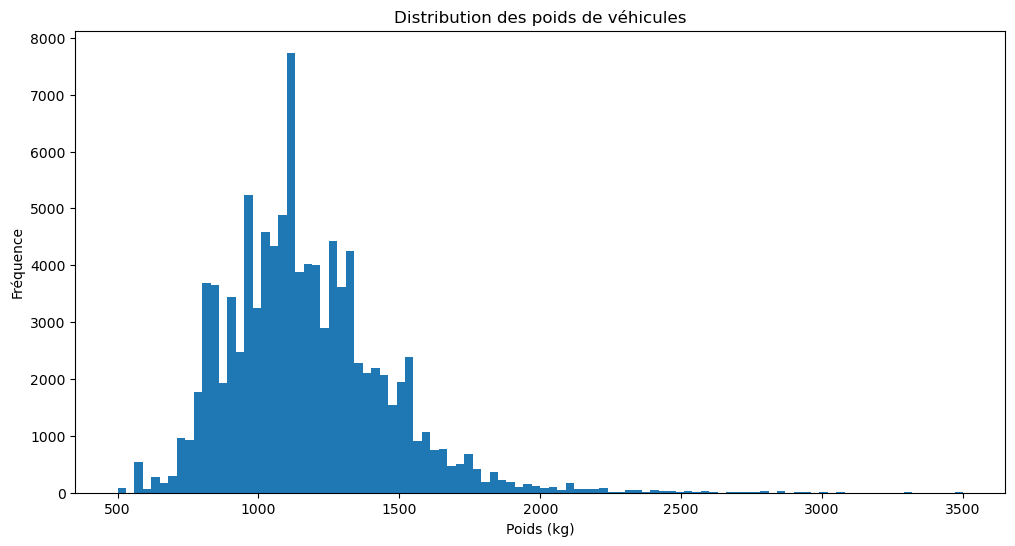

In [1186]:
import matplotlib.pyplot as plt

# Analyse des valeurs extrêmes
print("Top 10 plus petits poids:")
print(BaseAss.vh_weight.nsmallest(10).value_counts().sort_index())

print("\nTop 10 plus grands poids:")
print(BaseAss.vh_weight.nlargest(10).value_counts().sort_index())

# Visualisation
plt.figure(figsize=(12,6))
plt.hist(BaseAss.vh_weight, bins=100)
plt.title('Distribution des poids de véhicules')
plt.xlabel('Poids (kg)')
plt.ylabel('Fréquence')
plt.show()

* vh_fuel

In [1187]:
# Remplacer "Gazoline" par "Essence" dans la colonne vh_fuel
BaseAss['vh_fuel'] = BaseAss['vh_fuel'].replace("Gazoline", "Essence")

* vh_cyl

In [1188]:
BaseAss.vh_cyl.value_counts().sort_index()

vh_cyl
0.0        5
425.0     88
435.0     45
479.0     36
499.0      3
          ..
6217.0     1
6332.0     1
6500.0     2
6761.0     1
6997.0     1
Name: count, Length: 613, dtype: int64

In [1189]:
# 5 valeur ont un cylindré de moteur égale à 0, ce qui est impossible.

In [1190]:
#: Suppression de ces lignes
index_a_supprimer = BaseAss[BaseAss['vh_cyl'] == 0].index
BaseAss = BaseAss.drop(index_a_supprimer)

In [1191]:
BaseAss.vh_cyl.value_counts().sort_index()

vh_cyl
425.0     88
435.0     45
479.0     36
499.0      3
545.0      1
          ..
6217.0     1
6332.0     1
6500.0     2
6761.0     1
6997.0     1
Name: count, Length: 612, dtype: int64

* vh_model

In [1192]:
#BaseSin['vh_model'].value_counts()
BaseAss.vh_model.value_counts().sort_index() 

vh_model
04-avr        2
09-mai       14
09-mars      85
10            4
100          11
           ... 
ZS            3
ZT            1
ZT-T          2
ZX          483
ZX COUPE     37
Name: count, Length: 1022, dtype: int64

In [1193]:
# On remarque certaines marques de véhicules qui ne sont pas correcte donc on va les traités

In [1194]:
# Détection des marques incohérentes
marque_bizarre = BaseAss['vh_model'].str.contains('avr|mai|mars', case=False, na=False)
BaseAss[marque_bizarre]

,id_client,id_vehicle,id_policy,id_year,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight
2280,A00062100,V02,A00062100-V02,Year 0,0.5,2,2.0,2.0,Yearly,No,WorkPrivate,44109,No,60.0,45.0,M,41.0,0.0,11.0,1985.0,150.0,Gasoline,SAAB,09-mars,11.0,10.0,210.0,Tourism,26156.0,1345.0
3157,A00023562,V02,A00023562-V02,Year 0,0.5,4,1.0,1.0,Biannual,Yes,WorkPrivate,1136,No,49.0,45.0,F,29.0,0.0,14.0,1985.0,150.0,Gasoline,SAAB,09-mai,14.0,13.0,215.0,Tourism,31100.0,1485.0
4095,A00074049,V01,A00074049-V01,Year 0,0.5,3,6.0,1.0,Monthly,Yes,WorkPrivate,59009,No,46.0,45.0,F,23.0,0.0,13.0,2171.0,116.0,Diesel,SAAB,09-mars,13.0,11.0,200.0,Tourism,21938.0,1370.0
4888,A00059160,V01,A00059160-V01,Year 0,0.6,3,1.0,1.0,Monthly,No,WorkPrivate,78335,No,31.0,45.0,M,13.0,0.0,9.0,2171.0,125.0,Diesel,SAAB,09-mars,11.0,10.0,200.0,Tourism,24773.0,1370.0
5127,A00055197,V01,A00055197-V01,Year 0,0.5,3,7.0,2.0,Biannual,No,Retired,30189,No,52.0,45.0,M,51.0,0.0,11.0,2171.0,116.0,Diesel,SAAB,09-mars,13.0,11.0,200.0,Tourism,27472.0,1370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94852,A00073664,V01,A00073664-V01,Year 0,0.5,4,7.0,2.0,Biannual,No,WorkPrivate,38397,Yes,53.0,24.0,M,34.0,3.0,2.0,1910.0,180.0,Diesel,SAAB,09-mars,4.0,1.0,220.0,Tourism,42600.0,1725.0
97024,A00046856,V01,A00046856-V01,Year 0,0.5,4,19.0,1.0,Biannual,No,WorkPrivate,44220,No,54.0,45.0,M,36.0,0.0,5.0,2792.0,250.0,Gasoline,SAAB,09-mars,6.0,5.0,250.0,Tourism,39500.0,1535.0
97796,A00091295,V01,A00091295-V01,Year 0,0.5,4,4.0,2.0,Yearly,No,Retired,1034,No,65.0,45.0,M,47.0,0.0,7.0,2171.0,120.0,Diesel,SAAB,09-mars,9.0,7.0,200.0,Tourism,29950.0,1370.0
98937,A00026442,V01,A00026442-V01,Year 0,0.5,2,8.0,8.0,Biannual,No,WorkPrivate,75116,No,66.0,45.0,M,48.0,0.0,33.0,1599.0,89.0,Gasoline,MORGAN,04-avr,38.0,33.0,170.0,Tourism,4268.0,650.0


In [1195]:
# proportions des marques bizarres dans la data frame BaseSin

In [1196]:
marque_erreur = BaseAss['vh_model'].str.contains('avr|mars|mai|^\d+$', case=False, na=False)
pourcentage_erreur = marque_erreur.mean() * 100
print(f"{pourcentage_erreur:.2f}% des valeurs sont suspectes.")

20.11% des valeurs sont suspectes.


<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\2673133221.py:1: SyntaxWarning:

invalid escape sequence '\d'



In [1197]:
# les marques bizarres occupent 20 % de la base de données donc on va les imputés par le mode des marques:
modele_majoritaire = BaseAss['vh_model'].mode()[0]
BaseAss.loc[marque_erreur, 'vh_model'] = modele_majoritaire

In [1198]:
BaseAss.vh_model.value_counts().sort_index()

vh_model
100NX        12
116 I         4
118 I         4
120 I         8
125 I         2
           ... 
ZS            3
ZT            1
ZT-T          2
ZX          483
ZX COUPE     37
Name: count, Length: 882, dtype: int64

* vh_Value

In [1199]:
BaseAss.vh_value.value_counts().sort_index()

vh_value
0.0          2
648.0       36
694.0        7
767.0        5
792.0        1
            ..
128650.0     1
129000.0     1
131500.0     1
145000.0     1
155498.0     1
Name: count, Length: 5922, dtype: int64

In [1200]:
# On remarque deux voitures coûtent 0 € ce qui n'est pas normal donc suppression.

In [1201]:
BaseAss = BaseAss[BaseAss['vh_value'] != 0]

In [1202]:
BaseAss.vh_value.value_counts().sort_index()

vh_value
648.0       36
694.0        7
767.0        5
792.0        1
824.0       11
            ..
128650.0     1
129000.0     1
131500.0     1
145000.0     1
155498.0     1
Name: count, Length: 5921, dtype: int64

In [1203]:
BaseAss

,id_client,id_vehicle,id_policy,id_year,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight
0,A00072644,V01,A00072644-V01,Year 0,0.50,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,45.0,F,33.0,0.0,6.0,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0
1,A00036953,V01,A00036953-V01,Year 0,0.50,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,39.0,34.0,1.0,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0
2,A00079066,V01,A00079066-V01,Year 0,0.50,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,45.0,F,51.0,0.0,6.0,1598.0,113.0,Gasoline,RENAULT,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,15.0,17.0,17.0,1294.0,100.0,Gasoline,RENAULT,CLIO,18.0,15.0,190.0,Tourism,12517.0,860.0
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,45.0,F,9.0,0.0,18.0,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100037,A00016135,V01,A00016135-V01,Year 0,0.50,4,25.0,1.0,Yearly,No,Retired,76341,Yes,65.0,63.0,M,47.0,42.0,7.0,2148.0,143.0,Diesel,MERCEDES BENZ,C220,11.0,7.0,215.0,Tourism,33265.0,1545.0
100038,A00033699,V01,A00033699-V01,Year 0,0.50,3,11.0,2.0,Biannual,No,Professional,81257,No,42.0,45.0,M,22.0,0.0,8.0,2664.0,125.0,Diesel,NISSAN,TERRANO,9.0,3.0,155.0,Commercial,26800.0,1700.0
100039,A00012012,V01,A00012012-V01,Year 0,0.50,4,17.0,3.0,Yearly,No,WorkPrivate,57547,No,40.0,45.0,M,17.0,0.0,7.0,1781.0,226.0,Gasoline,AUDI,TT,12.0,6.0,243.0,Tourism,37710.0,1465.0
100040,A00073986,V01,A00073986-V01,Year 0,0.50,4,20.0,1.0,Biannual,Yes,WorkPrivate,45308,No,65.0,45.0,M,47.0,0.0,15.0,1108.0,56.0,Gasoline,FIAT,PUNTO,18.0,16.0,150.0,Tourism,9254.0,840.0


# Traitement de la base Climatique: Base 4

In [1204]:
# importation
base4 = pd.read_csv("DataClimatiques.csv",sep = ",", decimal = ",") 

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\818868361.py:2: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



In [1205]:
base4.head() 

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMM,RR,QRR,NBRR,RR_ME,RRAB,QRRAB,RRABDAT,NBJRR1,NBJRR5,NBJRR10,NBJRR30,NBJRR50,NBJRR100,PMERM,QPMERM,NBPMERM,PMERMINAB,QPMERMINAB,PMERMINABDAT,TX,QTX,NBTX,TX_ME,TXAB,QTXAB,TXDAT,TXMIN,QTXMIN,TXMINDAT,NBJTX0,NBJTX25,NBJTX30,NBJTX35,NBJTXI20,NBJTXI27,NBJTXS32,TN,QTN,NBTN,TN_ME,TNAB,QTNAB,TNDAT,TNMAX,QTNMAX,TNMAXDAT,NBJTN5,NBJTN10,NBJTNI10,NBJTNI15,NBJTNI20,NBJTNS20,NBJTNS25,NBJGELEE,TAMPLIM,QTAMPLIM,TAMPLIAB,QTAMPLIAB,TAMPLIABDAT,NBTAMPLI,TM,QTM,NBTM,TMM,QTMM,NBTMM,NBJTMS24,TMMIN,QTMMIN,TMMINDAT,TMMAX,QTMMAX,TMMAXDAT,UNAB,QUNAB,UNABDAT,NBUN,UXAB,QUXAB,UXABDAT,NBUX,UMM,QUMM,NBUM,TSVM,QTSVM,NBTSVM,ETP,QETP,FXIAB,QFXIAB,DXIAB,QDXIAB,FXIDAT,NBJFF10,NBJFF16,NBJFF28,NBFXI,FXI3SAB,QFXI3SAB,DXI3SAB,QDXI3SAB,FXI3SDAT,NBJFXI3S10,NBJFXI3S16,NBJFXI3S28,NBFXI3S,FXYAB,QFXYAB,DXYAB,QDXYAB,FXYABDAT,NBJFXY8,NBJFXY10,NBJFXY15,NBFXY,FFM,QFFM,NBFFM,INST,QINST,NBINST,NBSIGMA0,NBSIGMA20,NBSIGMA80,GLOT,QGLOT,NBGLOT,DIFT,QDIFT,NBDIFT,DIRT,QDIRT,NBDIRT,HNEIGEFTOT,QHNEIGEFTOT,HNEIGEFAB,QHNEIGEFAB,HNEIGEFDAT,NBHNEIGEF,NBJNEIG,NBJHNEIGEF1,NBJHNEIGEF5,NBJHNEIGEF10,NBJSOLNG,NEIGETOTM,QNEIGETOTM,NEIGETOTAB,QNEIGETOTAB,NEIGETOTABDAT,NBJNEIGETOT1,NBJNEIGETOT10,NBJNEIGETOT30,NBJGREL,NBJORAG,NBJBROU,DEP
0,1014002,ARBENT,46.278167,5.669,534,202301,112.8,1.0,31.0,NaN,17.8,1.0,8.0,14.0,10.0,4.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,6.4,1.0,31.0,NaN,17.7,1.0,1.0,-1.1,1.0,22.0,1.0,0.0,0.0,0.0,31.0,31.0,0.0,-1.2,1.0,31.0,NaN,-15.7,1.0,20.0,11.6,1.0,1.0,10.0,4.0,30.0,31.0,31.0,0.0,0.0,15.0,7.6,1.0,20.2,1.0,20.0,31.0,2.6,1.0,31.0,2.6,1.0,31.0,0.0,-5.6,1.0,20.0,14.7,1.0,1.0,35.0,1.0,14.0,31.0,100.0,1.0,31.0,31.0,85.0,1.0,31.0,6.5,9.0,31.0,NaN,NaN,18.2,1.0,150.0,1.0,16.0,12.0,5.0,0.0,31.0,16.7,9.0,NaN,0.0,16.0,11.0,2.0,0.0,31.0,10.2,1.0,150.0,1.0,16.0,2.0,1.0,0.0,31.0,1.9,1.0,31.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3.0,9.0,12.0,9.0,19.0,15.0,2.0,0.0,NaN,NaN,NaN,1
1,1014002,ARBENT,46.278167,5.669,534,202302,19.4,1.0,28.0,NaN,9.8,1.0,23.0,5.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,10.7,1.0,28.0,NaN,17.3,1.0,21.0,3.2,1.0,26.0,0.0,0.0,0.0,0.0,28.0,28.0,0.0,-3.7,1.0,28.0,NaN,-10.3,1.0,10.0,5.9,1.0,18.0,13.0,1.0,28.0,28.0,28.0,0.0,0.0,21.0,14.4,1.0,23.4,1.0,13.0,28.0,3.5,1.0,28.0,2.4,1.0,28.0,0.0,-1.8,1.0,10.0,10.2,1.0,18.0,26.0,1.0,13.0,28.0,100.0,1.0,25.0,28.0,82.0,1.0,28.0,6,9.0,28.0,NaN,NaN,25.5,1.0,40.0,1.0,26.0,3.0,1.0,0.0,28.0,23,9.0,NaN,0.0,26.0,3.0,1.0,0.0,28.0,12.6,1.0,10.0,1.0,26.0,1.0,1.0,0.0,28.0,1.4,1.0,28.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,9.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,1
2,1014002,ARBENT,46.278167,5.669,534,202303,134.4,1.0,31.0,NaN,25.4,1.0,10.0,14.0,9.0,6.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,13.3,1.0,31.0,NaN,22.5,1.0,13.0,6,1.0,27.0,0.0,0.0,0.0,0.0,28.0,31.0,0.0,1.6,1.0,31.0,NaN,-9.2,1.0,1.0,11.9,1.0,30.0,4.0,0.0,30.0,31.0,31.0,0.0,0.0,12.0,11.8,1.0,22.2,1.0,22.0,31.0,7.4,1.0,31.0,7.4,1.0,31.0,0.0,-1.6,1.0,1.0,14.8,1.0,30.0,24.0,1.0,22.0,31.0,100.0,1.0,28.0,31.0,73.0,1.0,31.0,7.3,9.0,31.0,NaN,NaN,21.3,1.0,170.0,1.0,13.0,19.0,8.0,0.0,31.0,18.8,9.0,NaN,0.0,13.0,16.0,3.0,0.0,31.0,9.7,1.0,150.0,1.0,24.0,7.0,0.0,0.0,31.0,2.3,1.0,31.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,9.0,1.0,9.0,3.0,2.0,0.0,0.0,NaN,NaN,NaN,1
3,1014002,ARBENT,46.278167,5.669,534,202304,113.6,1.0,30.0,NaN,16.4,1.0,28.0,15.0,10.0,5.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,14.6,1.0,30.0,NaN,23.1,1.0,28.0,7.2,1.0,15.0,0.0,0.0,0.0,0.0,27.0,30.0,0.0,2.4,1.0,30.0,NaN,-6.5,1.0,4.0,12.9,1.0,29.0,3.0,0.0,28.0,30.0,30.0,0.0,0.0,10.0,12.2,1.0,21.8,1.0,9.0,30.0,8.5,1.0,30.0,8.2,1.0,30.0,0.0,2.5,1.0,5.0,17.4,1.0,28.0,24.0,1.0,6.0,30.0,100.0,1.0,30.0,30.0,78.0,1.0,30.0,8.5,9.0,30.0,NaN,NaN,14.4,1.0,10.0,1.0,4.0,12.0,0.0,0.0,30.0,12.5,9.0,NaN,0.0,4.0,7.0,0.0,0.0,30.0,7.9,1.0,340.0,1.0,17.0,0.0,0.0,0.0,30.0,1.9,1.0,30.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,

In [1206]:
base4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28162 entries, 0 to 28161
Columns: 163 entries, NUM_POSTE to DEP
dtypes: float64(131), int64(4), object(28)
memory usage: 35.0+ MB


In [1207]:
# on regarde le nombre de lignes dans la base
len(base4) # nombre de ligne 

28162

In [1208]:
# on regarde combien il y a d'individus sur la clé primaire
base4.NUM_POSTE.nunique() 

2441

In [1209]:
len(base4) - base4.NUM_POSTE.nunique()
# nous donne le nombre de doublons 

25721

In [1210]:
sum(base4.duplicated()) 
# nombre de doublons purs/parfaits (quand 2 observations sont identiques sur toutes les variables)

0

In [1211]:
# On a 2441 valeurs uniques et 25721 doublons ce qui est normal car chaque poste peut avoir plusieurs valeurs mensuelles en ce qui concerne la météo.

In [1212]:
pd.set_option('display.max_columns', None)

* Traitement des données manquantes tjrs pour la base4 (données Climatique)

In [1213]:
base4.isna().sum()
# on obtient le nombre de valeurs manquantes pour chaque variable
# somme par colonne

NUM_POSTE            0
NOM_USUEL            0
LAT                  0
LON                  0
ALTI                 0
                 ...  
NBJNEIGETOT30    23605
NBJGREL          27649
NBJORAG          26080
NBJBROU          25773
DEP                  0
Length: 163, dtype: int64

In [1214]:
# Filtrer et afficher uniquement les colonnes avec des valeurs manquantes
valeurs_manquantes = base4.isna().sum()
# affichage des variables qui ont plus de 50% des donnnées manquantes( variables trop dégradées donc à supprimer)
valeurs_manquantes = valeurs_manquantes[valeurs_manquantes > (len(base4)/2)]
# Afficher le résultat
print(valeurs_manquantes)

RR_ME            27998
PMERM            25445
QPMERM           25445
PMERMINAB        25445
QPMERMINAB       25445
                 ...  
NBJNEIGETOT10    23605
NBJNEIGETOT30    23605
NBJGREL          27649
NBJORAG          26080
NBJBROU          25773
Length: 78, dtype: int64


In [1215]:
# Identifier les colonnes ayant plus de 50% de valeurs manquantes
colonnes_a_supprimer = valeurs_manquantes.index

# Supprimer ces colonnes du DataFrame
base4_clean = base4.drop(columns=colonnes_a_supprimer)

# Afficher la nouvelle taille du DataFrame
print(f"Colonnes supprimées : {len(colonnes_a_supprimer)}")
print(f"Nouvelle taille du DataFrame : {base4_clean.shape}")


Colonnes supprimées : 78
Nouvelle taille du DataFrame : (28162, 85)


In [1216]:
base4_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28162 entries, 0 to 28161
Data columns (total 85 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NUM_POSTE    28162 non-null  int64  
 1   NOM_USUEL    28162 non-null  object 
 2   LAT          28162 non-null  object 
 3   LON          28162 non-null  object 
 4   ALTI         28162 non-null  int64  
 5   AAAAMM       28162 non-null  int64  
 6   RR           27356 non-null  object 
 7   QRR          27356 non-null  float64
 8   NBRR         28125 non-null  float64
 9   RRAB         27357 non-null  object 
 10  QRRAB        27357 non-null  float64
 11  RRABDAT      27293 non-null  float64
 12  NBJRR1       27358 non-null  float64
 13  NBJRR5       27358 non-null  float64
 14  NBJRR10      27358 non-null  float64
 15  NBJRR30      27358 non-null  float64
 16  NBJRR50      27358 non-null  float64
 17  NBJRR100     27358 non-null  float64
 18  NBPMERM      28125 non-null  float64
 19  TX  

In [1217]:
valeurs_manquantes = base4_clean.isna().sum()

In [1218]:
valeurs_manquantes = valeurs_manquantes[valeurs_manquantes > 0]

In [1219]:
valeurs_manquantes

RR           806
QRR          806
NBRR          37
RRAB         805
QRRAB        805
            ... 
NBINST        38
NBGLOT        37
NBDIFT        37
NBDIRT        37
NBHNEIGEF     37
Length: 78, dtype: int64

In [1220]:
# Remplissage des données manquantes pour les variables(entier et float) par la médiane
num_cols = base4_clean.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    base4_clean[col].fillna(base4_clean[col].median(), inplace=True)


C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\3597577412.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [1221]:
# Remplissage des données manquantes pour les variables(objet) par le mode

cat_cols = base4_clean.select_dtypes(include=['object']).columns

for col in cat_cols:
    base4_clean[col].fillna(base4_clean[col].mode()[0], inplace=True)


C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\311773607.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [1222]:
print(base4_clean.isna().sum().sum())  # Doit afficher 0 si toutes les valeurs ont été remplies

0


In [1405]:
base4_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28162 entries, 0 to 28161
Data columns (total 85 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NUM_POSTE    28162 non-null  int64  
 1   NOM_USUEL    28162 non-null  object 
 2   LAT          28162 non-null  object 
 3   LON          28162 non-null  object 
 4   ALTI         28162 non-null  int64  
 5   AAAAMM       28162 non-null  int64  
 6   RR           28162 non-null  object 
 7   QRR          28162 non-null  float64
 8   NBRR         28162 non-null  float64
 9   RRAB         28162 non-null  object 
 10  QRRAB        28162 non-null  float64
 11  RRABDAT      28162 non-null  float64
 12  NBJRR1       28162 non-null  float64
 13  NBJRR5       28162 non-null  float64
 14  NBJRR10      28162 non-null  float64
 15  NBJRR30      28162 non-null  float64
 16  NBJRR50      28162 non-null  float64
 17  NBJRR100     28162 non-null  float64
 18  NBPMERM      28162 non-null  float64
 19  TX  

In [1404]:
# Sauvegarde :  
base4_clean.to_csv('baseClimatique.csv', index=False)

In [1224]:
BASE4 = base4_clean.copy()

In [1225]:
BASE4

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMM,RR,QRR,NBRR,RRAB,QRRAB,RRABDAT,NBJRR1,NBJRR5,NBJRR10,NBJRR30,NBJRR50,NBJRR100,NBPMERM,TX,QTX,NBTX,TXAB,QTXAB,TXDAT,TXMIN,QTXMIN,TXMINDAT,NBJTX0,NBJTX25,NBJTX30,NBJTX35,NBJTXI20,NBJTXI27,NBJTXS32,TN,QTN,NBTN,TNAB,QTNAB,TNDAT,TNMAX,QTNMAX,TNMAXDAT,NBJTN5,NBJTN10,NBJTNI10,NBJTNI15,NBJTNI20,NBJTNS20,NBJTNS25,NBJGELEE,TAMPLIM,QTAMPLIM,TAMPLIAB,QTAMPLIAB,TAMPLIABDAT,NBTAMPLI,TM,QTM,NBTM,TMM,QTMM,NBTMM,NBJTMS24,TMMIN,QTMMIN,TMMINDAT,TMMAX,QTMMAX,TMMAXDAT,NBUN,NBUX,NBUM,NBTSVM,NBFXI,NBFXI3S,NBFXY,NBFFM,NBINST,NBGLOT,NBDIFT,NBDIRT,NBHNEIGEF,DEP
0,1014002,ARBENT,46.278167,5.669,534,202301,112.8,1.0,31.0,17.8,1.0,8.0,14.0,10.0,4.0,0.0,0.0,0.0,0.0,6.4,1.0,31.0,17.7,1.0,1.0,-1.1,1.0,22.0,1.0,0.0,0.0,0.0,31.0,31.0,0.0,-1.2,1.0,31.0,-15.7,1.0,20.0,11.6,1.0,1.0,10.0,4.0,30.0,31.0,31.0,0.0,0.0,15.0,7.6,1.0,20.2,1.0,20.0,31.0,2.6,1.0,31.0,2.6,1.0,31.0,0.0,-5.6,1.0,20.0,14.7,1.0,1.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,0.0,0.0,0.0,0.0,0.0,1
1,1014002,ARBENT,46.278167,5.669,534,202302,19.4,1.0,28.0,9.8,1.0,23.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,10.7,1.0,28.0,17.3,1.0,21.0,3.2,1.0,26.0,0.0,0.0,0.0,0.0,28.0,28.0,0.0,-3.7,1.0,28.0,-10.3,1.0,10.0,5.9,1.0,18.0,13.0,1.0,28.0,28.0,28.0,0.0,0.0,21.0,14.4,1.0,23.4,1.0,13.0,28.0,3.5,1.0,28.0,2.4,1.0,28.0,0.0,-1.8,1.0,10.0,10.2,1.0,18.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,0.0,0.0,0.0,0.0,0.0,1
2,1014002,ARBENT,46.278167,5.669,534,202303,134.4,1.0,31.0,25.4,1.0,10.0,14.0,9.0,6.0,0.0,0.0,0.0,0.0,13.3,1.0,31.0,22.5,1.0,13.0,6,1.0,27.0,0.0,0.0,0.0,0.0,28.0,31.0,0.0,1.6,1.0,31.0,-9.2,1.0,1.0,11.9,1.0,30.0,4.0,0.0,30.0,31.0,31.0,0.0,0.0,12.0,11.8,1.0,22.2,1.0,22.0,31.0,7.4,1.0,31.0,7.4,1.0,31.0,0.0,-1.6,1.0,1.0,14.8,1.0,30.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,0.0,0.0,0.0,0.0,0.0,1
3,1014002,ARBENT,46.278167,5.669,534,202304,113.6,1.0,30.0,16.4,1.0,28.0,15.0,10.0,5.0,0.0,0.0,0.0,0.0,14.6,1.0,30.0,23.1,1.0,28.0,7.2,1.0,15.0,0.0,0.0,0.0,0.0,27.0,30.0,0.0,2.4,1.0,30.0,-6.5,1.0,4.0,12.9,1.0,29.0,3.0,0.0,28.0,30.0,30.0,0.0,0.0,10.0,12.2,1.0,21.8,1.0,9.0,30.0,8.5,1.0,30.0,8.2,1.0,30.0,0.0,2.5,1.0,5.0,17.4,1.0,28.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,1
4,1014002,ARBENT,46.278167,5.669,534,202305,54.4,1.0,31.0,18.6,1.0,9.0,8.0,4.0,1.0,0.0,0.0,0.0,0.0,20.6,1.0,31.0,28.3,1.0,27.0,10.3,1.0,16.0,0.0,8.0,0.0,0.0,16.0,28.0,0.0,7,1.0,31.0,1.4,1.0,3.0,12.4,1.0,22.0,0.0,0.0,28.0,31.0,31.0,0.0,0.0,0.0,13.5,1.0,21.6,1.0,29.0,31.0,13.8,1.0,31.0,13.6,1.0,31.0,0.0,9.2,1.0,16.0,18.9,1.0,22.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28157,98833002,MEA,-21.4555,165.767333,571,202308,242.8,1.0,31.0,211.5,1.0,30.0,5.0,3.0,2.0,1.0,1.0,1.0,0.0,26.9,1.0,0.0,31.5,1.0,17.0,17.9,1.0,21.0,0.0,3.0,0.0,0.0,18.0,28.0,0.0,5.2,1.0,0.0,-2.8,1.0,14.0,11.3,1.0,18.0,0.0,0.0,19.0,28.0,30.0,0.0,0.0,0.0,10.6,1.0,17.6,1.0,15.0,0.0,20.2,1.0,0.0,20.2,1.0,0.0,0.0,-0.2,1.0,18.0,13,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,988
28158,98833002,MEA,-21.4555,165.767333,571,202309,261.7,1.0,30.0,89.4,1.0,14.0,12.0,7.0,6.0,4.0,1.0,0.0,0.0,26.9,1.0,0.0,31.5,1.0,17.0,17.9,1.0,21.0,0.0,3.0,0.0,0.0,18.0,28.0,0.0,5.2,1.0,0.0,-2.8,1.0,14.0,11.3,1.0,18.0,0.0,0.0,19.0,28.0,30.0,0.0,0.0,0.0,10.6,1.0,17.6,1.0,15.0,0.0,20.2,1.0,0.0,20.2,1.0,0.0,0.0,-0.2,1.0,18.0,13,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,988
28159,98833002,MEA,-21.4555,165.767333,571,202310,187.4,1.0,31.0,113.4,1.0,17.0,10.0,6.0,3.0,1.0,1.0,1.0,0.0,26.9,1.0,0.0,31.5,1.0,17.0,17.9,1.0,21.0,0.0,3.0,0.0,0.0,18.0,28.0,0.0,5.2,1.0,0.0,-2.8,1.0,14.0,11.3,1.0,18.0,0.0,0.0,19.0,28.0,30.0,0.0,0.0,0.0,10.6,1.0,17.6,1.0,15.0,0.0,20.2,1.0,0.0,20.2,1.0,0.0,0.0,

In [1226]:
# Exporter le DataFrame ass_sin en fichier CSV
BASE4.to_csv("Base_Climatique.csv", index=False)

# Analyses proprement dites.

## Jointures 

In [1227]:
BaseAss.to_csv('BaseAssurance.csv', index=False)
BaseSin.to_csv('BaseSin.csv', index=False)

In [1228]:
BaseAss

,id_client,id_vehicle,id_policy,id_year,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight
0,A00072644,V01,A00072644-V01,Year 0,0.50,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,45.0,F,33.0,0.0,6.0,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0
1,A00036953,V01,A00036953-V01,Year 0,0.50,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,39.0,34.0,1.0,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0
2,A00079066,V01,A00079066-V01,Year 0,0.50,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,45.0,F,51.0,0.0,6.0,1598.0,113.0,Gasoline,RENAULT,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,15.0,17.0,17.0,1294.0,100.0,Gasoline,RENAULT,CLIO,18.0,15.0,190.0,Tourism,12517.0,860.0
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,45.0,F,9.0,0.0,18.0,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100037,A00016135,V01,A00016135-V01,Year 0,0.50,4,25.0,1.0,Yearly,No,Retired,76341,Yes,65.0,63.0,M,47.0,42.0,7.0,2148.0,143.0,Diesel,MERCEDES BENZ,C220,11.0,7.0,215.0,Tourism,33265.0,1545.0
100038,A00033699,V01,A00033699-V01,Year 0,0.50,3,11.0,2.0,Biannual,No,Professional,81257,No,42.0,45.0,M,22.0,0.0,8.0,2664.0,125.0,Diesel,NISSAN,TERRANO,9.0,3.0,155.0,Commercial,26800.0,1700.0
100039,A00012012,V01,A00012012-V01,Year 0,0.50,4,17.0,3.0,Yearly,No,WorkPrivate,57547,No,40.0,45.0,M,17.0,0.0,7.0,1781.0,226.0,Gasoline,AUDI,TT,12.0,6.0,243.0,Tourism,37710.0,1465.0
100040,A00073986,V01,A00073986-V01,Year 0,0.50,4,20.0,1.0,Biannual,Yes,WorkPrivate,45308,No,65.0,45.0,M,47.0,0.0,15.0,1108.0,56.0,Gasoline,FIAT,PUNTO,18.0,16.0,150.0,Tourism,9254.0,840.0


In [1229]:
BaseSin

,id_client,id_vehicle,id_year,id_claim,claim_nb,claim_amount,id_policy
0,A00047578,V01,Year 0,CL01,1,1236.00,A00047578-V01
1,A00058432,V01,Year 0,CL01,1,59.84,A00058432-V01
2,A00047550,V01,Year 0,CL02,1,2683.76,A00047550-V01
3,A00012792,V01,Year 0,CL01,1,84.05,A00012792-V01
4,A00032112,V01,Year 0,CL01,1,104.49,A00032112-V01
...,...,...,...,...,...,...,...
14540,A00064771,V01,Year 0,CL01,1,145.08,A00064771-V01
14541,A00078851,V01,Year 0,CL01,1,2453.28,A00078851-V01
14542,A00067797,V01,Year 0,CL01,1,142.40,A00067797-V01
14543,A00085199,V01,Year 0,CL01,1,557.66,A00085199-V01


# Jointure des polices d'assurances (BaseAss) et de la base des coûts des sinistres (BaseSin). 

In [1230]:
# jointure de la base des polices d'assurances et de la base des sinistrialités
Base_tot = BaseAss.merge(BaseSin, on='id_policy', how='left')

In [1231]:
Base_tot

,id_client_x,id_vehicle_x,id_policy,id_year_x,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,id_client_y,id_vehicle_y,id_year_y,id_claim,claim_nb,claim_amount
0,A00072644,V01,A00072644-V01,Year 0,0.50,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,45.0,F,33.0,0.0,6.0,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0,A00072644,V01,Year 0,CL01,1.0,1860.92
1,A00036953,V01,A00036953-V01,Year 0,0.50,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,39.0,34.0,1.0,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0,NaN,NaN,NaN,NaN,NaN,NaN
2,A00079066,V01,A00079066-V01,Year 0,0.50,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,45.0,F,51.0,0.0,6.0,1598.0,113.0,Gasoline,RENAULT,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0,NaN,NaN,NaN,NaN,NaN,NaN
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,15.0,17.0,17.0,1294.0,100.0,Gasoline,RENAULT,CLIO,18.0,15.0,190.0,Tourism,12517.0,860.0,NaN,NaN,NaN,NaN,NaN,NaN
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,45.0,F,9.0,0.0,18.0,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99950,A00016135,V01,A00016135-V01,Year 0,0.50,4,25.0,1.0,Yearly,No,Retired,76341,Yes,65.0,63.0,M,47.0,42.0,7.0,2148.0,143.0,Diesel,MERCEDES BENZ,C220,11.0,7.0,215.0,Tourism,33265.0,1545.0,NaN,NaN,NaN,NaN,NaN,NaN
99951,A00033699,V01,A00033699-V01,Year 0,0.50,3,11.0,2.0,Biannual,No,Professional,81257,No,42.0,45.0,M,22.0,0.0,8.0,2664.0,125.0,Diesel,NISSAN,TERRANO,9.0,3.0,155.0,Commercial,26800.0,1700.0,A00033699,V01,Year 0,CL01,1.0,524.72
99952,A00012012,V01,A00012012-V01,Year 0,0.50,4,17.0,3.0,Yearly,No,WorkPrivate,57547,No,40.0,45.0,M,17.0,0.0,7.0,1781.0,226.0,Gasoline,AUDI,TT,12.0,6.0,243.0,Tourism,37710.0,1465.0,NaN,NaN,NaN,NaN,NaN,NaN
99953,A00073986,V01,A00073986-V01,Year 0,0.50,4,20.0,1.0,Biannual,Yes,WorkPrivate,45308,No,65.0,45.0,M,47.0,0.0,15.0,1108.0,56.0,Gasoline,FIAT,PUNTO,18.0,16.0,150.0,Tourism,9254.0,840.0,NaN,NaN,NaN,NaN,NaN,NaN


In [1232]:
# Exportation de la base totale
Base_tot.to_csv("Base_tot.csv", index=False)

In [1233]:
# Suppression des colonnes sans importance
colonnes_a_supprimer = ['id_client_y', 'id_vehicle_y', 'id_year_y']
Base_tot.drop(columns=colonnes_a_supprimer, inplace=True)

In [1234]:
# On remarque qu'il y a des NAN dans la base totale ce qui est normal car certaine lignes de la base des assurés
#n'ont pas trouvé de ligne dans la base des sinistres.
# Ce qui veut dire que certains assurés n'ont pas de coût de sinistre.

# Dans la suite de l'analyse, on va plus s'intéressé aux assurés ayant les coûts de sinistres.

In [1235]:
# sélections des assurés avec au moins un sinistre
ass_sin= Base_tot[Base_tot['claim_nb'].notna()]
ass_sin.head()

,id_client_x,id_vehicle_x,id_policy,id_year_x,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,id_claim,claim_nb,claim_amount
0,A00072644,V01,A00072644-V01,Year 0,0.50,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,45.0,F,33.0,0.0,6.0,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0,CL01,1.0,1860.92
13,A00071825,V01,A00071825-V01,Year 0,0.50,4,24.0,2.0,Biannual,No,Retired,72346,No,68.0,45.0,F,48.0,0.0,3.0,1461.0,86.0,Diesel,RENAULT,MODUS,5.0,4.0,171.0,Tourism,18150.0,1185.0,CL01,1.0,2502.05
17,A00029040,V01,A00029040-V01,Year 0,0.62,4,14.0,1.0,Monthly,No,WorkPrivate,33122,No,58.0,45.0,F,36.0,0.0,2.0,996.0,66.0,Gasoline,OPEL,AGILA,3.0,1.0,160.0,Tourism,11490.0,975.0,CL01,1.0,1236.00
28,A00067129,V01,A00067129-V01,Year 0,0.50,3,3.0,1.0,Monthly,No,WorkPrivate,55383,No,42.0,45.0,M,24.0,0.0,6.0,1461.0,66.0,Diesel,RENAULT,CLIO,7.0,6.0,163.0,Commercial,14173.0,1525.0,CL01,1.0,327.05
32,A00079638,V01,A00079638-V01,Year 0,0.80,4,4.0,1.0,Yearly,No,WorkPrivate,91549,No,30.0,45.0,F,11.0,0.0,1.0,1598.0,75.0,Diesel,VOLKSWAGEN,POLO,2.0,1.0,170.0,Tourism,14650.0,1082.0,CL01,1.0,107.47


In [1236]:
# Assurés sans sinistres (claim_nb vide) où il y a des NA, ce qui veut dire qu'ils n'ont pas de nombre de sinistres  donc pas de coût de sinitre.
ass_nsin = Base_tot[Base_tot['claim_nb'].isna()]
ass_nsin.shape

(87305, 33)

In [1237]:
# Base avec tous les assurés (sinistrés ou non) ou encore total des assurés tot_ass
ass = Base_tot[(Base_tot.id_policy.notna())]
ass

,id_client_x,id_vehicle_x,id_policy,id_year_x,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,id_claim,claim_nb,claim_amount
0,A00072644,V01,A00072644-V01,Year 0,0.50,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,45.0,F,33.0,0.0,6.0,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0,CL01,1.0,1860.92
1,A00036953,V01,A00036953-V01,Year 0,0.50,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,39.0,34.0,1.0,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0,NaN,NaN,NaN
2,A00079066,V01,A00079066-V01,Year 0,0.50,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,45.0,F,51.0,0.0,6.0,1598.0,113.0,Gasoline,RENAULT,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0,NaN,NaN,NaN
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,15.0,17.0,17.0,1294.0,100.0,Gasoline,RENAULT,CLIO,18.0,15.0,190.0,Tourism,12517.0,860.0,NaN,NaN,NaN
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,45.0,F,9.0,0.0,18.0,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99950,A00016135,V01,A00016135-V01,Year 0,0.50,4,25.0,1.0,Yearly,No,Retired,76341,Yes,65.0,63.0,M,47.0,42.0,7.0,2148.0,143.0,Diesel,MERCEDES BENZ,C220,11.0,7.0,215.0,Tourism,33265.0,1545.0,NaN,NaN,NaN
99951,A00033699,V01,A00033699-V01,Year 0,0.50,3,11.0,2.0,Biannual,No,Professional,81257,No,42.0,45.0,M,22.0,0.0,8.0,2664.0,125.0,Diesel,NISSAN,TERRANO,9.0,3.0,155.0,Commercial,26800.0,1700.0,CL01,1.0,524.72
99952,A00012012,V01,A00012012-V01,Year 0,0.50,4,17.0,3.0,Yearly,No,WorkPrivate,57547,No,40.0,45.0,M,17.0,0.0,7.0,1781.0,226.0,Gasoline,AUDI,TT,12.0,6.0,243.0,Tourism,37710.0,1465.0,NaN,NaN,NaN
99953,A00073986,V01,A00073986-V01,Year 0,0.50,4,20.0,1.0,Biannual,Yes,WorkPrivate,45308,No,65.0,45.0,M,47.0,0.0,15.0,1108.0,56.0,Gasoline,FIAT,PUNTO,18.0,16.0,150.0,Tourism,9254.0,840.0,NaN,NaN,NaN


In [1238]:
# renomons la bases des assurés total pour les analyses futures 
tot_ass = Base_tot[(Base_tot.id_policy.notna())]
tot_ass.head()

,id_client_x,id_vehicle_x,id_policy,id_year_x,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,id_claim,claim_nb,claim_amount
0,A00072644,V01,A00072644-V01,Year 0,0.50,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,45.0,F,33.0,0.0,6.0,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0,CL01,1.0,1860.92
1,A00036953,V01,A00036953-V01,Year 0,0.50,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,39.0,34.0,1.0,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0,NaN,NaN,NaN
2,A00079066,V01,A00079066-V01,Year 0,0.50,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,45.0,F,51.0,0.0,6.0,1598.0,113.0,Gasoline,RENAULT,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0,NaN,NaN,NaN
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,15.0,17.0,17.0,1294.0,100.0,Gasoline,RENAULT,CLIO,18.0,15.0,190.0,Tourism,12517.0,860.0,NaN,NaN,NaN
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,45.0,F,9.0,0.0,18.0,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0,NaN,NaN,NaN


In [1239]:
# Remplacer les NA des sinistres dans la base de la jointure ass= Base_tot:
ass.claim_nb.fillna(0, inplace = True)
ass.claim_amount.fillna(0, inplace = True)
ass.id_claim.fillna(0, inplace =True)
# base total des assurés (tot_ass) qui équivaut encore à la base ass: remplacement des NAN
tot_ass.claim_nb.fillna(0, inplace = True)
tot_ass.claim_amount.fillna(0, inplace = True)
tot_ass.id_claim.fillna(0, inplace =True)

# Remplacer les NA par 0 dans la base des sinistres 
ass_sin.claim_nb.fillna(0, inplace = True)
ass_sin.claim_amount.fillna(0, inplace = True)
ass_sin.id_claim.fillna(0, inplace =True)

# Remplacer les NA par 0 dans la base des assurés non sinistrés
ass_nsin.claim_nb.fillna(0, inplace = True)
ass_nsin.claim_amount.fillna(0, inplace = True)
ass_nsin.id_claim.fillna(0, inplace =True)



C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\3792621982.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\3792621982.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [1240]:
# Sauvegarde des bases en CSV
ass_sin.to_csv("ass_sin.csv", index=False) # base des assurés sinistrés
ass_nsin.to_csv("ass_nsin.csv", index=False)# base des assurés non sinistrés
# base totale des assurés sinistrés ou non
ass.to_csv("ass.csv", index=False) 
tot_ass.to_csv("tot_ass.csv", index=False)

In [1241]:
# Base totale : Base_tot
ass.head()

,id_client_x,id_vehicle_x,id_policy,id_year_x,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,id_claim,claim_nb,claim_amount
0,A00072644,V01,A00072644-V01,Year 0,0.50,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,45.0,F,33.0,0.0,6.0,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0,CL01,1.0,1860.92
1,A00036953,V01,A00036953-V01,Year 0,0.50,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,39.0,34.0,1.0,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0,0,0.0,0.00
2,A00079066,V01,A00079066-V01,Year 0,0.50,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,45.0,F,51.0,0.0,6.0,1598.0,113.0,Gasoline,RENAULT,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0,0,0.0,0.00
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,15.0,17.0,17.0,1294.0,100.0,Gasoline,RENAULT,CLIO,18.0,15.0,190.0,Tourism,12517.0,860.0,0,0.0,0.00
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,45.0,F,9.0,0.0,18.0,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0,0,0.0,0.00


## Analyse descriptive des assurés sinistrés : ass_sin 

* Analyse univariée
* Variables quantitatives
  -  Graphiques : histogramme ou diagramme en boîte. 

In [1242]:
# Transformation de la variable drv_drv2 pour avoir une version binaire claire
ass_sin['has_second_driver'] = ass_sin['drv_drv2'].map({'Yes': 1, 'No': 0})
ass_sin

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\2829348494.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id_client_x,id_vehicle_x,id_policy,id_year_x,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,id_claim,claim_nb,claim_amount,has_second_driver
0,A00072644,V01,A00072644-V01,Year 0,0.50,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,45.0,F,33.0,0.0,6.0,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0,CL01,1.0,1860.92,0
13,A00071825,V01,A00071825-V01,Year 0,0.50,4,24.0,2.0,Biannual,No,Retired,72346,No,68.0,45.0,F,48.0,0.0,3.0,1461.0,86.0,Diesel,RENAULT,MODUS,5.0,4.0,171.0,Tourism,18150.0,1185.0,CL01,1.0,2502.05,0
17,A00029040,V01,A00029040-V01,Year 0,0.62,4,14.0,1.0,Monthly,No,WorkPrivate,33122,No,58.0,45.0,F,36.0,0.0,2.0,996.0,66.0,Gasoline,OPEL,AGILA,3.0,1.0,160.0,Tourism,11490.0,975.0,CL01,1.0,1236.00,0
28,A00067129,V01,A00067129-V01,Year 0,0.50,3,3.0,1.0,Monthly,No,WorkPrivate,55383,No,42.0,45.0,M,24.0,0.0,6.0,1461.0,66.0,Diesel,RENAULT,CLIO,7.0,6.0,163.0,Commercial,14173.0,1525.0,CL01,1.0,327.05,0
32,A00079638,V01,A00079638-V01,Year 0,0.80,4,4.0,1.0,Yearly,No,WorkPrivate,91549,No,30.0,45.0,F,11.0,0.0,1.0,1598.0,75.0,Diesel,VOLKSWAGEN,POLO,2.0,1.0,170.0,Tourism,14650.0,1082.0,CL01,1.0,107.47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99927,A00045064,V01,A00045064-V01,Year 0,0.50,4,8.0,1.0,Biannual,No,WorkPrivate,83023,No,47.0,45.0,M,29.0,0.0,1.0,1242.0,70.0,Gasoline,FORD,KA,1.0,1.0,159.0,Tourism,11700.0,865.0,CL01,1.0,923.29,0
99928,A00009305,V02,A00009305-V02,Year 0,0.50,4,7.0,2.0,Yearly,No,WorkPrivate,49048,Yes,35.0,40.0,F,17.0,20.0,2.0,1998.0,127.0,Diesel,TOYOTA,VERSO,2.0,1.0,185.0,Tourism,26300.0,1540.0,CL01,1.0,1663.19,1
99935,A00000390,V01,A00000390-V01,Year 0,0.50,4,30.0,2.0,Quarterly,No,Retired,42302,Yes,66.0,65.0,M,46.0,46.0,3.0,1461.0,106.0,Diesel,RENAULT,SCENIC,6.0,5.0,178.0,Tourism,24100.0,1365.0,CL01,1.0,5013.73,1
99942,A00090134,V01,A00090134-V01,Year 0,0.80,2,4.0,4.0,Monthly,No,WorkPrivate,90010,No,60.0,45.0,F,17.0,0.0,13.0,1868.0,70.0,Diesel,RENAULT,CLIO,13.0,9.0,161.0,Tourism,12290.0,1010.0,CL01,1.0,-226.97,0


In [1243]:
ass_sin.claim_amount.value_counts()

claim_amount
1236.00    766
0.00       506
1010.41    291
106.14     253
2683.76     98
          ... 
594.47       1
813.07       1
245.18       1
124.73       1
524.72       1
Name: count, Length: 9389, dtype: int64

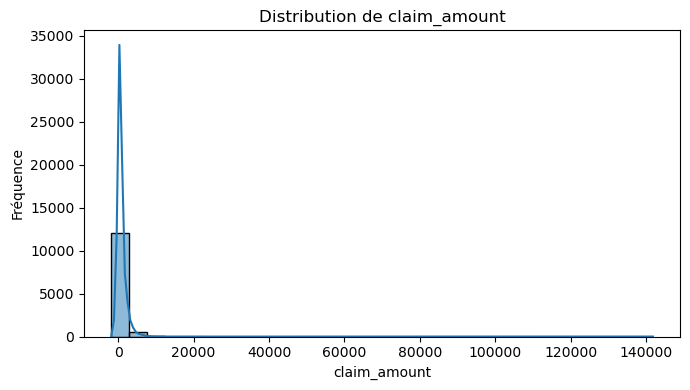

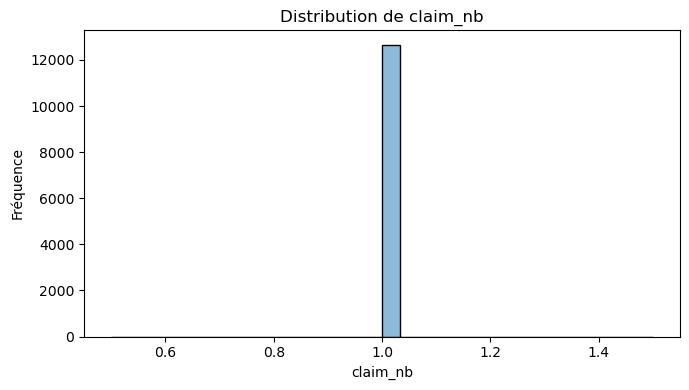

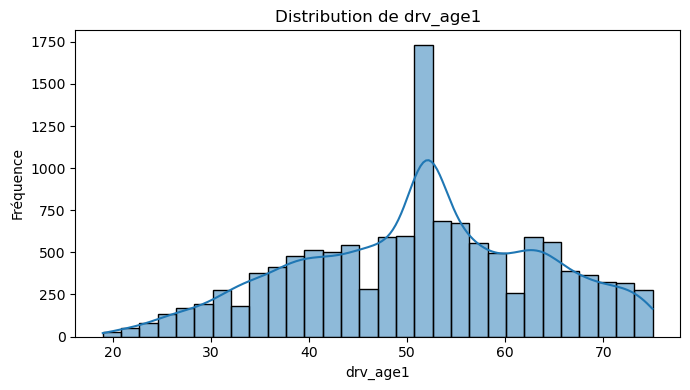

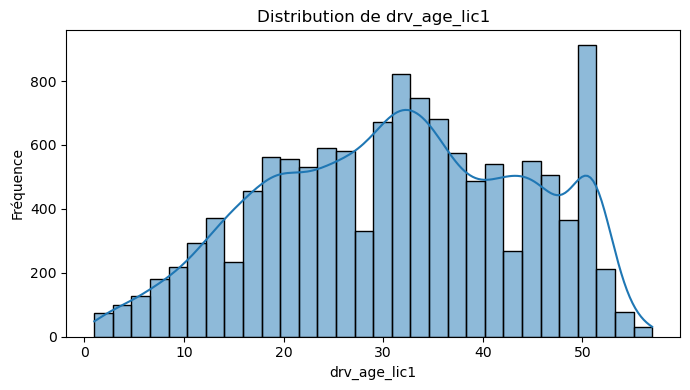

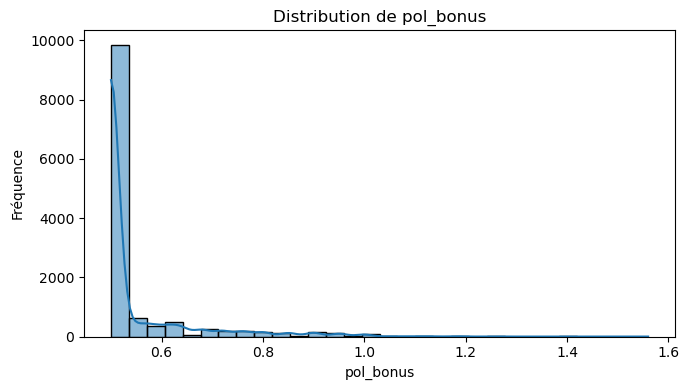

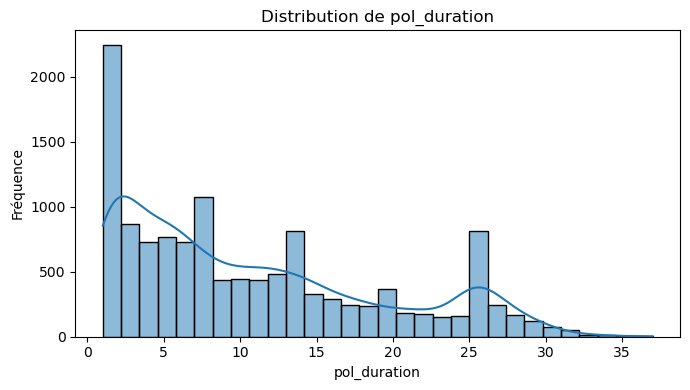

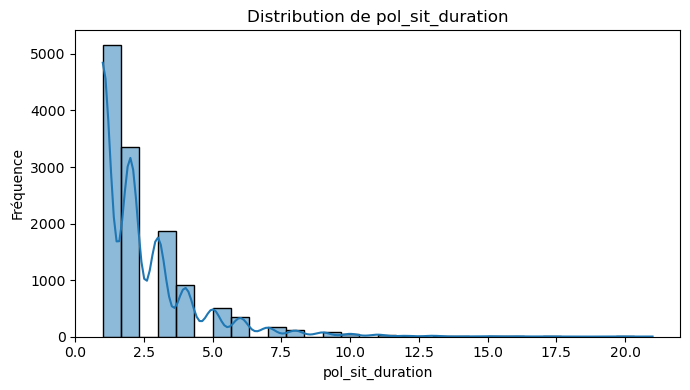

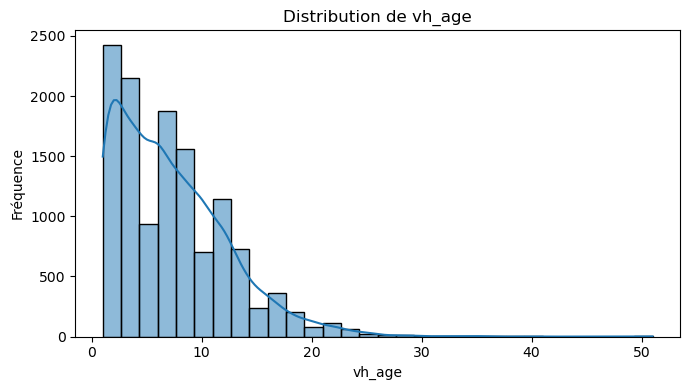

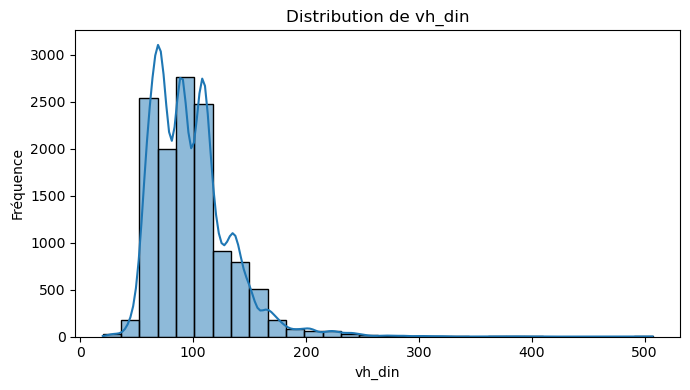

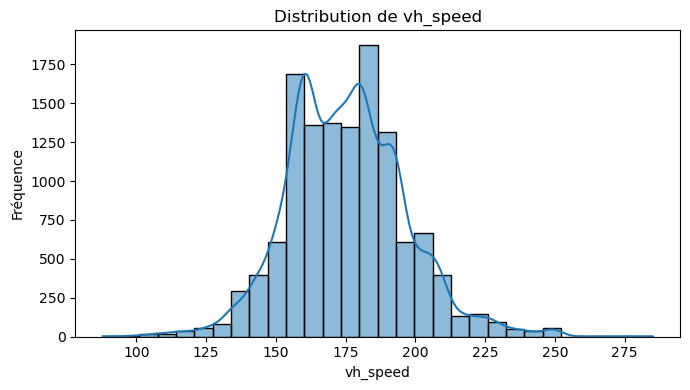

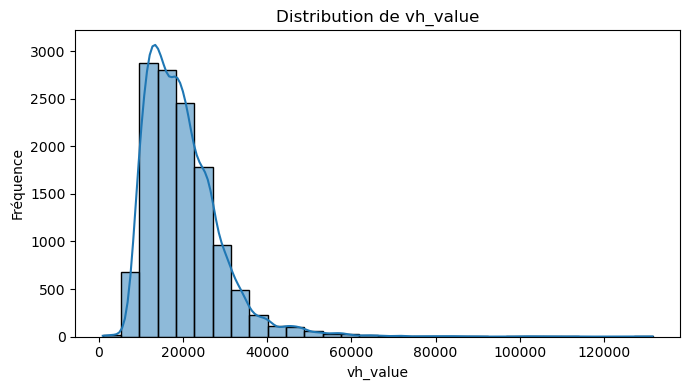

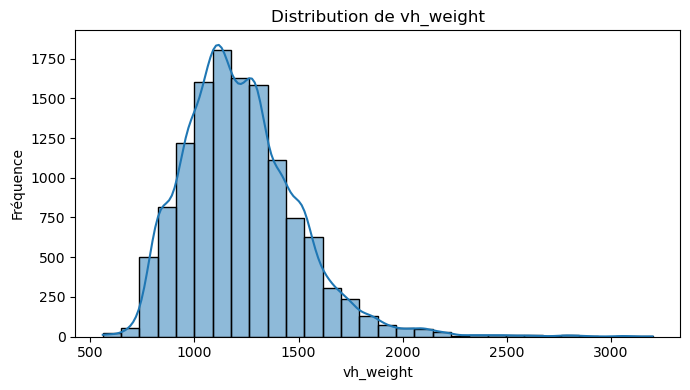

        claim_amount  claim_nb      drv_age1  drv_age_lic1     pol_bonus  \
count   12650.000000   12650.0  12650.000000  12650.000000  12650.000000   
mean      829.362985       1.0     51.185375     31.264980      0.543745   
std      2401.431312       0.0     12.180054     12.756703      0.104904   
min     -1863.920000       1.0     19.000000      1.000000      0.500000   
25%       122.255000       1.0     43.000000     21.000000      0.500000   
50%       476.025000       1.0     52.000000     32.000000      0.500000   
75%      1206.517500       1.0     60.000000     42.000000      0.500000   
max    141828.260000       1.0     75.000000     57.000000      1.560000   

       pol_duration  pol_sit_duration        vh_age        vh_din  \
count  12650.000000      12650.000000  12650.000000  12650.000000   
mean      10.688854          2.382372      7.263478     98.115731   
std        8.402333          1.875976      5.105611     34.166549   
min        1.000000          1.000000  

In [1244]:
# Liste des variables quantitatives à analyser
variables_quanti = [
    'claim_amount', 'claim_nb', 'drv_age1', 'drv_age_lic1',
    'pol_bonus', 'pol_duration', 'pol_sit_duration',
    'vh_age', 'vh_din', 'vh_speed', 'vh_value', 'vh_weight'
]

# Filtrer les colonnes disponibles dans la base
variables_quanti_valides = [var for var in variables_quanti if var in ass_sin.columns]

# Statistiques descriptives globales
desc_quanti = ass_sin[variables_quanti_valides].describe()

# Tracer les histogrammes pour chaque variable
for var in variables_quanti_valides:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=ass_sin, x=var, kde=True, bins=30)
    plt.title(f"Distribution de {var}")
    plt.xlabel(var)
    plt.ylabel("Fréquence")
    plt.tight_layout()
    plt.show()

# Affichage des statistiques descriptives dans un tableau
print(desc_quanti)

In [1245]:
# interprétation de l'analyse
#Claim Amount (Montant des Sinistres) Min : -1863,92 € ;Max : 141828,26 €
#Commentaires : La moyenne est de 829,36 €, mais l'écart-type est très élevé (2401,43 €), indiquant une forte dispersion des montants de sinistres.

#Claim Number (Nombre de Sinistres) : Min/Max : Chaque enregistrement correspond à exactement un sinistre.

#Âge du Conducteur Min : 19 ans, Max : 75 ansConducteurs relativement expérimentés, âge médian autour de 52 ans. 

#Ancienneté du Permis, Min : 1 an, Max : 57 ansLes conducteurs ont en général une bonne expérience de conduite. 

# Policy Bonus Min : 0,5 ; Max : 1,56 La majorité des assurés possède un bonus de 0,5 (niveau maximal de réduction), mais des valeurssupérieures à 1 existent.

# Policy Duration  Min : 1 an ; Max : 37 ans, Une large variation des durées de souscription, avec un contrat médian de 8 ans.

#Policy Situation DurationMin : 1 an ; Max : 21 ans, reflète des évolutions ou changements dans les contrats au fil du temps. 

# Vehicle Age (Âge du Véhicule) Min : 1 an , Max : 51 Le parc automobile est relativement récent avec un âge médian de 6 ans. 

#Vehicle Speed (Vitesse Maximale) Min : 88 km/h ; Max : 285 km/h Commentaires : Le parc inclut des véhicules standards et des véhicules de très hautes performances.

# Vehicle Value Min : 934€ ; Max : 131500 €, La valeur médiane est de 18250 €, avec une forte dispersion, probablement liée à des véhicules de luxe. 

# Vehicle Weight (Poids du Véhicule) Min : 560 kg Max : 3200 kg ; La majorité des véhicules sont standards en poids, mais il existe quelques véhicules très lourds (ex : SUV ou utilitaires).

* Statistiques descriptives pour les variables qualitatives

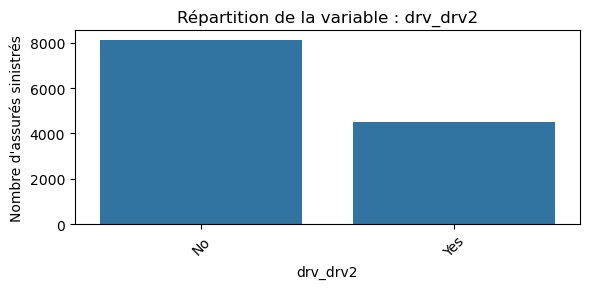

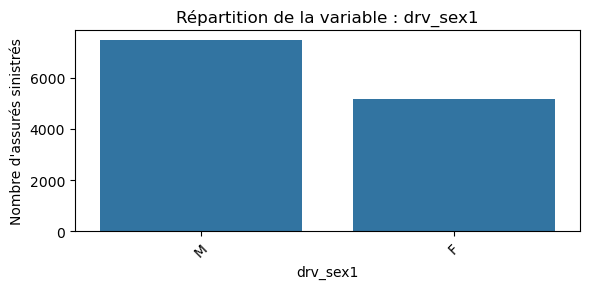

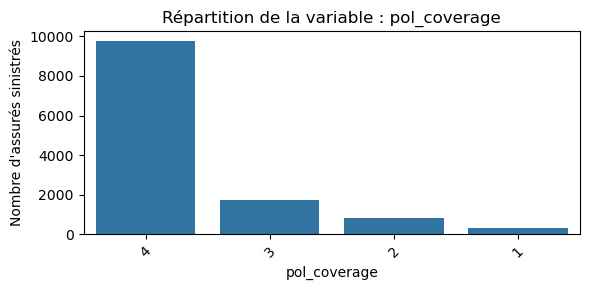

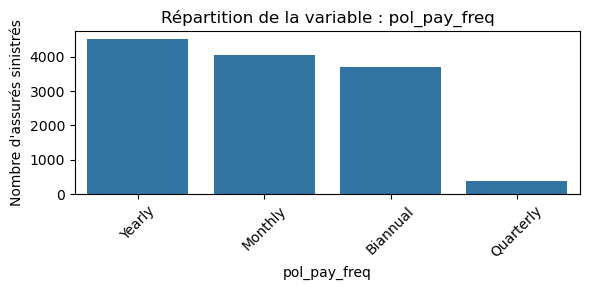

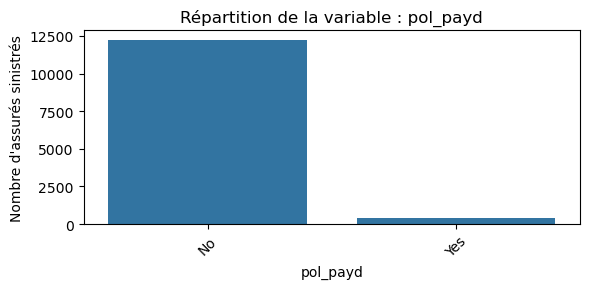

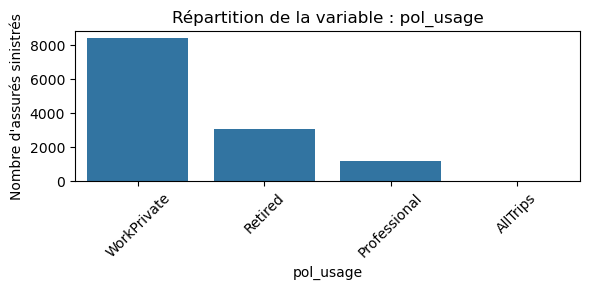

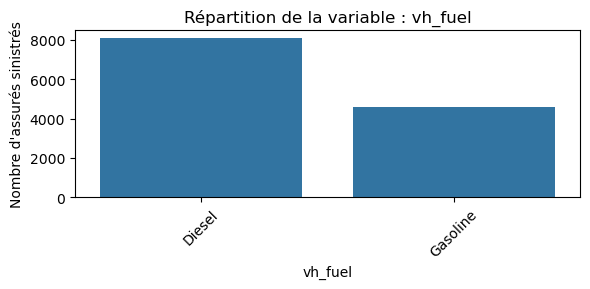

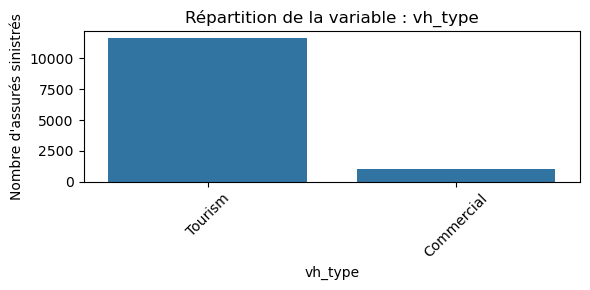

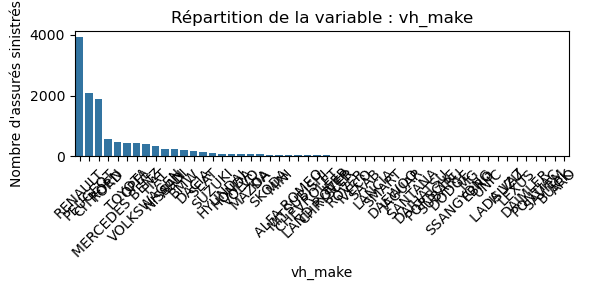

          vh_make  Fréquence (%)
0         RENAULT      30.940711
1         PEUGEOT      16.403162
2         CITROEN      14.972332
3            FORD       4.474308
4   MERCEDES BENZ       3.873518
5          TOYOTA       3.470356
6            OPEL       3.407115
7      VOLKSWAGEN       3.335968
8            FIAT       2.656126
9          NISSAN       1.992095
10           AUDI       1.968379
11            BMW       1.723320
12          DACIA       1.533597
13           SEAT       1.177866
14         SUZUKI       0.893281
15        HYUNDAI       0.735178
16          HONDA       0.648221
17          VOLVO       0.624506
18          MAZDA       0.569170
19            KIA       0.513834
20          SKODA       0.434783
21           MINI       0.418972
22     ALFA ROMEO       0.403162
23     MITSUBISHI       0.347826
24      CHEVROLET       0.300395
25     LAND ROVER       0.276680
26       CHRYSLER       0.268775
27           JEEP       0.213439
28          ROVER       0.166008
29        

In [1246]:
# Liste des variables qualitatives à analyser
variables_qualitatives = [
    'drv_drv2', 'drv_sex1',
    'pol_coverage', 'pol_pay_freq', 'pol_payd', 'pol_usage',
    'vh_fuel', 'vh_type', 'vh_make'
]

# Création d’un DataFrame pour stocker les fréquences
frequences_qualitatives = {}

for var in variables_qualitatives:
    # Calcul des fréquences relatives (%)
    freq = ass_sin[var].value_counts(normalize=True).rename_axis(var).reset_index(name='Fréquence (%)')
    freq['Fréquence (%)'] = freq['Fréquence (%)'] * 100
    frequences_qualitatives[var] = freq

    # Affichage graphique
    plt.figure(figsize=(6, 3))
    sns.countplot(data=ass_sin, x=var, order=ass_sin[var].value_counts().index)
    plt.title(f"Répartition de la variable : {var}")
    plt.xlabel(var)
    plt.ylabel("Nombre d'assurés sinistrés")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Exemple : retour de la fréquence pour drv_drv2
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Fréquences - drv_drv2 (conducteur secondaire)", dataframe=frequences_qualitatives['drv_drv2'])
print (freq)

In [1247]:
# Impact de la présence d'un second conducteur sur le montant des sinistres
claim_analysis = ass_sin.groupby("drv_drv2")["claim_amount"].agg(["count", "sum", "mean"]).reset_index()
# 2. Renommer les colonnes pour plus de clarté
claim_analysis.columns = ["Deuxième conducteur déclaré", "Nombre d’assurés", "Montant total des sinistres", "Montant moyen des sinistres"]
# 3. Affichage
print(claim_analysis)

  Deuxième conducteur déclaré  Nombre d’assurés  Montant total des sinistres  \
0                          No              8137                   6519342.37   
1                         Yes              4513                   3972099.39   

   Montant moyen des sinistres  
0                   801.197293  
1                   880.146109  


In [1248]:
# Test statistique : comparaison de moyenne pour valider cette différence
# Séparation des deux groupes : avec et sans deuxième conducteur
groupe_0 = ass_sin[ass_sin["drv_drv2"] == "No"]["claim_amount"]
groupe_1 = ass_sin[ass_sin["drv_drv2"] == "Yes"]["claim_amount"]

# Test t de Student (non apparié, variances inégales par défaut)
t_stat, p_value = ttest_ind(groupe_0, groupe_1, equal_var=False)

t_stat, p_value

(-1.4570221485581727, 0.1451672960047816)

In [1249]:
# La p-value > 0.05 indique que la différence observée entre le montant moyen des sinistres pour les assurés
# avec ou sans deuxième conducteur n'est pas statistiquement significative au seuil de 5 %. 

# C'est pourquoi seules les caractéristiques du premier conducteur ont été prises en compte dans la majorité des analyses.

In [1250]:
# croisement entre la valeur du véhicule et le type de couverture : 
ass_sin.groupby("pol_coverage")["vh_value"].agg(["count", "mean", "min", "max"]) 

,count,mean,min,max
pol_coverage,,,,
1,301,17382.013289,1060.0,112538.0
2,829,16730.623643,3299.0,89500.0
3,1754,17893.962942,934.0,107900.0
4,9766,20556.955458,3299.0,131500.0


In [1251]:
# interprétation : 
# Les assurés ayant déclaré un deuxième conducteur présentent un montant moyen de sinistres légèrement plus élevé (880 €) que ceux sans conducteur additionnel (801 €).
# La présence d’un deuxième conducteur pourrait accroître l’exposition au risque (plus d’utilisation du véhicule, habitudes de conduite différentes), 
#ce qui se traduit par des sinistres légèrement plus coûteux en moyenne.

In [1252]:
# Test statistique pour valider cette différence
# Filtrage pour garder les niveaux de couverture valides
filtered_data = ass_sin[ass_sin['pol_coverage'].isin([1, 2, 3, 4])]

# Création des groupes par niveau de couverture
grouped_values = [group["vh_value"].dropna() for name, group in filtered_data.groupby("pol_coverage")]

# ANOVA : test de comparaison de moyennes
anova_result = f_oneway(*grouped_values)
anova_result

F_onewayResult(statistic=91.41274691266968, pvalue=1.60094927904938e-58)

In [1253]:
#La p-value est extrêmement faible, bien inférieure à 0.05. 
#Cela signifie que la différence de valeur moyenne des véhicules selon le niveau de couverture est hautement significative.

## Analyses multivariées: 
- Graphiques

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\1053297134.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



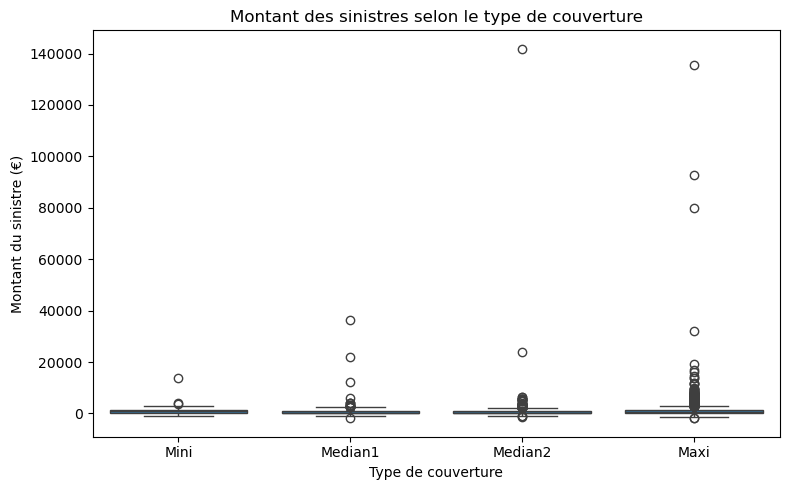

In [1254]:
# Recodage lisible de pol_coverage
ass_sin['pol_coverage_lbl'] = ass_sin['pol_coverage'].map({
    1: 'Mini',
    2: 'Median1',
    3: 'Median2',
    4: 'Maxi'
})

# Mini: couvre que les réclamation en responsabilité civil
# Maxi: couvre toutes les réclammations y compris les dommages, vol, le bris de pare-brise, l'assistance

#  Quanti - Quali : Boîtes à moustaches parallèles (claim_amount ~ pol_coverage)
plt.figure(figsize=(8, 5))
sns.boxplot(data=ass_sin, x='pol_coverage_lbl', y='claim_amount', order=['Mini', 'Median1', 'Median2', 'Maxi'])
plt.title("Montant des sinistres selon le type de couverture")
plt.xlabel("Type de couverture")
plt.ylabel("Montant du sinistre (€)")
plt.tight_layout()
plt.show()

In [1255]:
# interprétation: 
#La médiane et les extrêmes augmentent avec le niveau de couverture
#Les sinistres les plus élevés sont couverts par les formules Maxi


<Figure size 600x400 with 0 Axes>

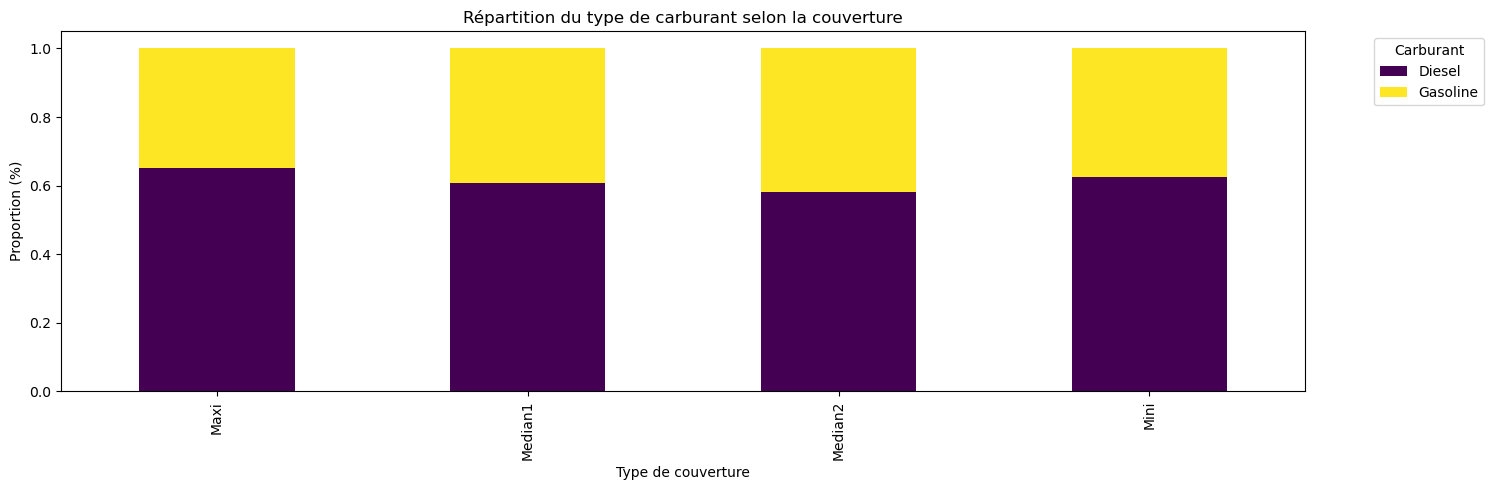

In [1256]:
# Quali - Quali : Diagramme en barres empilé (pol_coverage vs vh_fuel)
plt.figure(figsize=(6, 4))
cross_tab = pd.crosstab(ass_sin['pol_coverage_lbl'], ass_sin['vh_fuel'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Répartition du type de carburant selon la couverture")
plt.xlabel("Type de couverture")
plt.ylabel("Proportion (%)")
plt.legend(title="Carburant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [1257]:
# Interprétation: 
# Les formules Maxi et Median2 sont davantage choisies pour des véhicules Diesel
#Les véhicules Essence sont plus présents dans les formules plus simples

* Variables quantitatives et qualitatives

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\2279415220.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




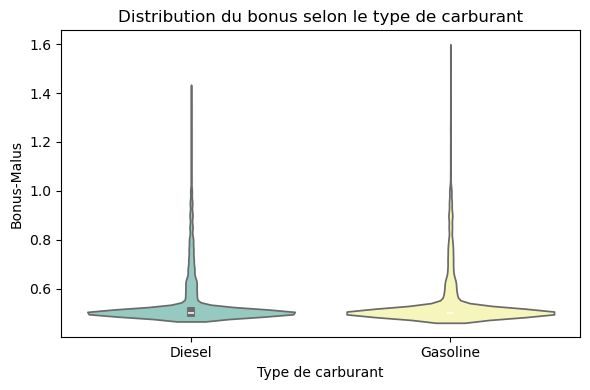

In [1258]:
# Quanti - Quali : Diagramme en violon (pol_bonus ~ vh_fuel)
plt.figure(figsize=(6, 4))
sns.violinplot(data=ass_sin, x='vh_fuel', y='pol_bonus', palette='Set3')
plt.title("Distribution du bonus selon le type de carburant")
plt.xlabel("Type de carburant")
plt.ylabel("Bonus-Malus")
plt.tight_layout()
plt.show()

In [1259]:
# Les profils Essence Gasoline et Diesel ont des bonus similaires, mais les véhicules Essence ont une distribution légèrement plus centrée autour
# de 0.5. Ce qui veut dire que ces assurés sont des bons conducteurs.

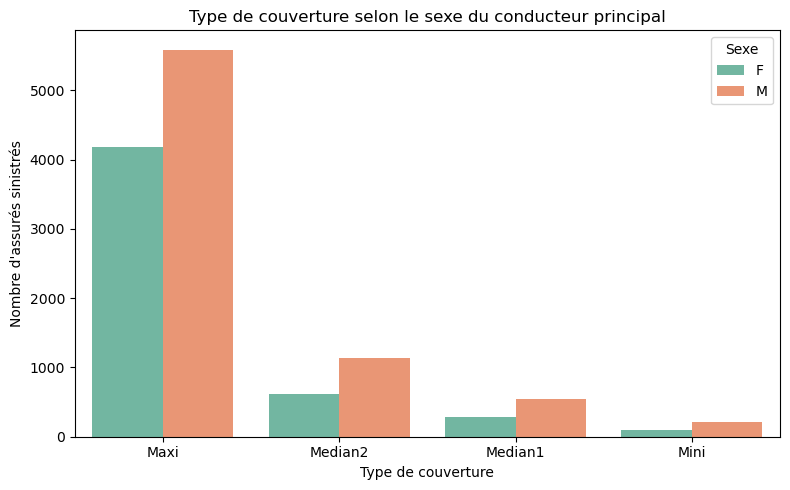

In [1260]:
#  Sexe du conducteur principal vs type de couverture
plt.figure(figsize=(8, 5))
sns.countplot(data=ass_sin, x='pol_coverage_lbl', hue='drv_sex1', palette='Set2')
plt.title("Type de couverture selon le sexe du conducteur principal")
plt.xlabel("Type de couverture")
plt.ylabel("Nombre d'assurés sinistrés")
plt.legend(title="Sexe")
plt.tight_layout()
plt.show()

In [1261]:
# interprétation: 
# Les deux sexes sont représentés dans toutes les couvertures
# Les hommes semblent plus nombreux globalement dans chaque niveau

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\111721910.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\111721910.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




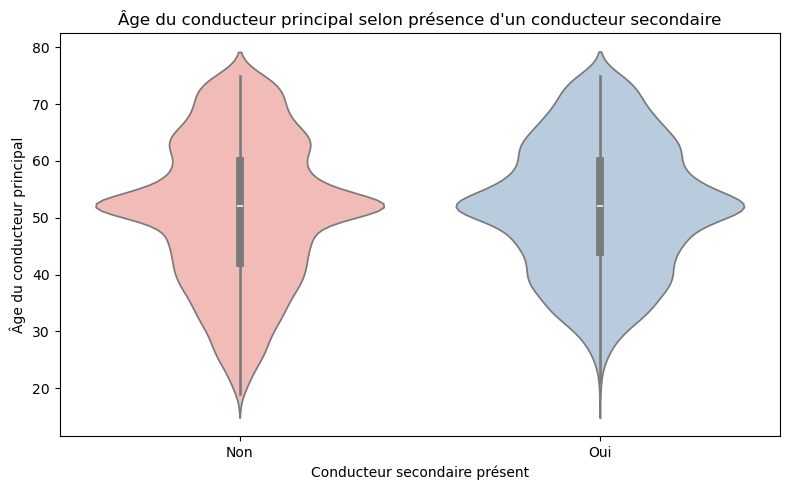

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\111721910.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1262]:
# Âge conducteur selon présence conducteur secondaire
# Recode binaire pour conducteur secondaire
ass_sin['has_second_driver'] = ass_sin['drv_drv2'].map({'Yes': 'Oui', 'No': 'Non'})
plt.figure(figsize=(8, 5))
sns.violinplot(data=ass_sin, x='has_second_driver', y='drv_age1', palette='Pastel1')
plt.title("Âge du conducteur principal selon présence d'un conducteur secondaire")
plt.xlabel("Conducteur secondaire présent")
plt.ylabel("Âge du conducteur principal")
plt.tight_layout()
plt.show()
# Recode binaire pour conducteur secondaire
ass_sin['has_second_driver'] = ass_sin['drv_drv2'].map({'Yes': 'Oui', 'No': 'Non'})


In [1263]:
# interprétation: Les conducteurs sans conducteur secondaire sont en moyenne plus âgés
# Ceux qui partagent le véhicule (second conducteur présent) sont plus jeunes en général → 
# Ce qui est logiquement, les jeunes qui viennent d'avoir le permis ont peur de faire un accident

In [1264]:
# Vérifier et préparer les modalités de sexe
ass_sin['drv_sex1'] = ass_sin['drv_sex1'].map({'F': 'Femme', 'M': 'Homme'})

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\2019175170.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



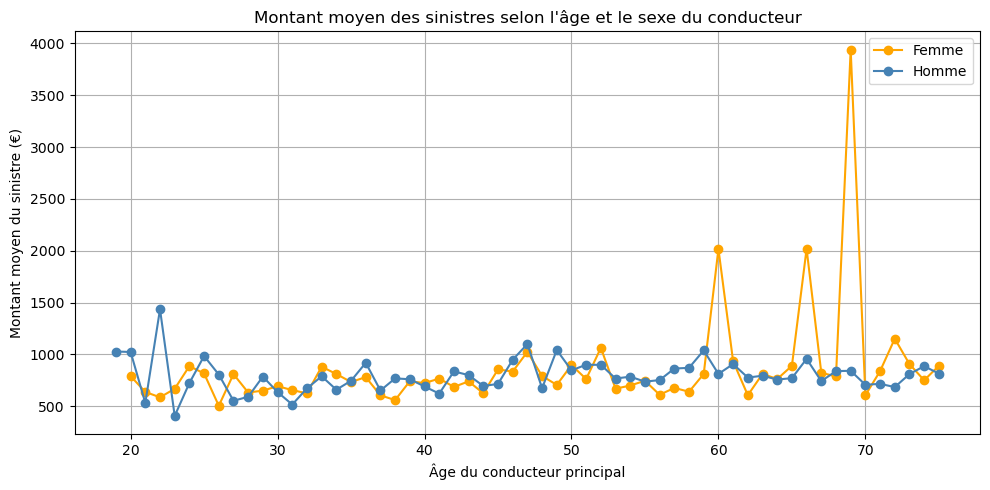

In [1265]:
# Calcul de la moyenne des sinistres par âge et par sexe
moyennes_par_age_sexe = ass_sin.groupby(['drv_age1', 'drv_sex1'])['claim_amount'].mean().unstack()

# Tracé des courbes comparatives
plt.figure(figsize=(10, 5))
plt.plot(moyennes_par_age_sexe.index, moyennes_par_age_sexe['Femme'], label='Femme', color='orange', marker='o')
plt.plot(moyennes_par_age_sexe.index, moyennes_par_age_sexe['Homme'], label='Homme', color='steelblue', marker='o')

plt.title("Montant moyen des sinistres selon l'âge et le sexe du conducteur")
plt.xlabel("Âge du conducteur principal")
plt.ylabel("Montant moyen du sinistre (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1266]:
# interprétation:
#Les conducteurs hommes ont tendance à générer des sinistres plus coûteux à l'assureur en moyenne que les femmes, surtout aux extrêmes d'âge.

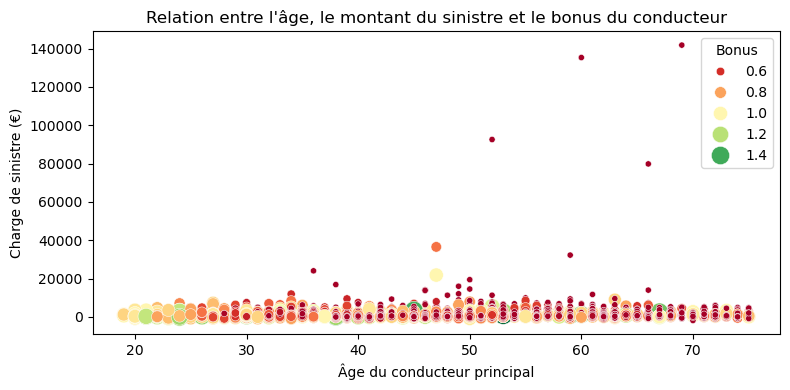

In [1267]:
# Tracer un graphique parallèle : Âge, Montant sinistre et Bonus
plt.figure(figsize=(8, 4))
sns.scatterplot(data=ass_sin, x="drv_age1", y="claim_amount", hue="pol_bonus", palette="RdYlGn", size="pol_bonus", sizes=(20, 200))
plt.xlabel("Âge du conducteur principal")
plt.ylabel("Charge de sinistre (€)")
plt.title("Relation entre l'âge, le montant du sinistre et le bonus du conducteur")
plt.legend(title="Bonus")
plt.tight_layout()
plt.show()

In [1268]:
# Interpétation: 
# La majorité des sinistres ont un montant relativement faible (inférieur à 10 000 €).
# On observe toutefois quelques sinistres très coûteux (> 100 000 €), principalement associés à des conducteurs âgés de 50 à 70 ans. 

#Les points rouges (bonus = 0.5 ou 0.6) sont prédominants, indiquant que de nombreux sinistrés sont des conducteurs prudents avec un bon bonus.
# Les conducteurs ayant un mauvais bonus (valeurs plus élevées, représentées par des points verts plus gros) sont moins nombreux, mais on remarque qu'ils peuvent être associés à des sinistres coûteux (notamment vers 45–60 ans).
#Cela peut indiquer que certains conducteurs à bonus élevé (malussés) ont eu des sinistres plus graves, ce qui corrobore le mécanisme de malus.

#Les conducteurs jeunes (moins de 30 ans) semblent moins souvent impliqués dans des sinistres coûteux (mais peuvent tout de même en générer).
#Une plus forte dispersion apparaît à partir de 40 ans, avec davantage de sinistres de haute valeur.

# Analyses des corrélations

* Matrice de corrélation de ass


In [1269]:
# conversion de claim_nb en entier
ass_sin['claim_nb'] = ass_sin['claim_nb'].astype(int)
ass_sin.corr(numeric_only = True, method = "spearman")

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\1674747959.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,drv_age1,drv_age2,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_sale_begin,vh_sale_end,vh_speed,vh_value,vh_weight,claim_nb,claim_amount
pol_bonus,1.000000,-0.092070,-0.269690,-0.102715,-0.410924,-0.103184,-0.445070,-0.124154,0.000046,-0.022626,-0.030141,-0.003716,-0.002967,-0.000633,-0.033296,-0.044595,NaN,-0.009506
pol_coverage,-0.092070,1.000000,0.093798,-0.033529,0.057339,0.032743,0.101265,0.071310,-0.566358,-0.069337,0.216406,-0.551690,-0.539337,0.227103,0.177722,0.164733,NaN,0.096268
pol_duration,-0.269690,0.093798,1.000000,0.256212,0.314461,0.054198,0.378977,0.003355,0.008853,-0.080822,-0.053015,0.019579,0.025405,-0.033543,-0.073926,-0.049600,NaN,0.033657
pol_sit_duration,-0.102715,-0.033529,0.256212,1.000000,0.138568,0.056628,0.163053,-0.050210,0.302655,-0.016060,-0.104071,0.297250,0.283697,-0.090738,-0.126043,-0.107863,NaN,0.018027
drv_age1,-0.410924,0.057339,0.314461,0.138568,1.000000,0.274816,0.838588,0.072101,0.012803,-0.020465,-0.018749,0.026806,0.021090,-0.032642,-0.019113,-0.006793,NaN,0.051734
drv_age2,-0.103184,0.032743,0.054198,0.056628,0.274816,1.000000,0.254935,0.146853,-0.024348,0.033588,0.045434,-0.020091,-0.023972,0.026434,0.047688,0.039436,NaN,0.004485
drv_age_lic1,-0.445070,0.101265,0.378977,0.163053,0.838588,0.254935,1.000000,0.049261,0.005210,-0.018181,-0.000078,0.018283,0.013670,-0.013548,-0.011264,0.002502,NaN,0.068983
drv_age_lic2,-0.124154,0.071310,0.003355,-0.050210,0.072101,0.146853,0.049261,1.000000,-0.079877,0.040890,0.086549,-0.083747,-0.074375,0.086253,0.093585,0.101060,NaN,-0.012591
vh_age,0.000046,-0.566358,0.008853,0.302655,0.012803,-0.024348,0.005210,-0.079877,1.000000,0.165682,-0.186243,0.941922,0.914630,-0.170156,-0.186713,-0.183306,NaN,-0.057630
vh_cyl,-0.022626,-0.069337,-0.080822,-0.016060,-0.020465,0.033588,-0.018181,0.040890,0.165682,1.000000,0.710274,0.121121,0.108525,0.470618,0.778094,0.719501,NaN,0.036459


In [1270]:
# les NAN de la variable claim_nb s'expliquent par le fait qu'il n'y a pas de variabilité dans les modalité de cette variable. 
#Tout les assurés ont un nombre de sinitre = 1.

<Axes: >

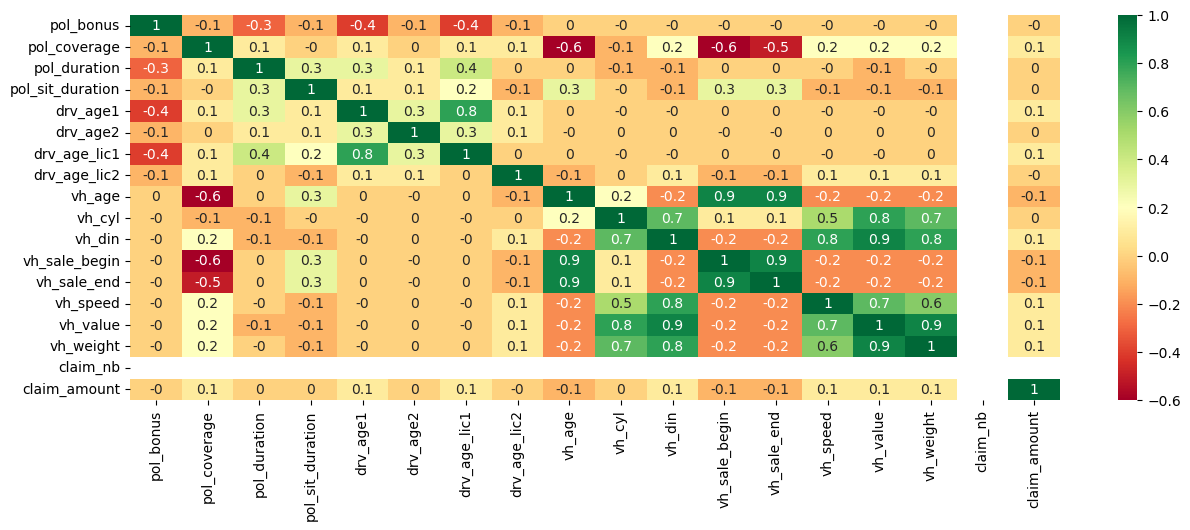

In [1271]:
sns.heatmap(np.round(ass_sin.corr(numeric_only = True, method = "spearman"),1), annot = True, cmap = "RdYlGn")

In [1272]:
# Liste des paires à tester avec spearmanr
couples = [
    ("vh_value", "vh_speed"),       # véhicules chers → rapides
    ("vh_cyl", "vh_value"),         # puissants → chers
    ("vh_weight", "vh_value"),      # poids ↔ valeur
    ("drv_age1", "pol_bonus"),      # jeunes → malus
    ("drv_age_lic1", "pol_bonus"),  # permis ancien → bonus
    ("vh_age", "pol_coverage"),     # voitures vieilles → moins couvertes
    ("vh_sale_begin", "pol_coverage")  # véhicules anciens = couverture minimale
]

# Test de corrélation de Spearman pour chaque couple
resultats = []

for var1, var2 in couples:
    coef, pval = spearmanr(ass_sin[var1], ass_sin[var2], nan_policy='omit')
    resultats.append((f"{var1} ↔ {var2}", coef, pval))

# DataFrame des résultats
df_spearman_test = pd.DataFrame(resultats, columns=["Couple de variables", "Spearman_corr", "p_value"])
print(df_spearman_test)

            Couple de variables  Spearman_corr  p_value
0           vh_value ↔ vh_speed       0.657166      0.0
1             vh_cyl ↔ vh_value       0.778094      0.0
2          vh_weight ↔ vh_value       0.864640      0.0
3          drv_age1 ↔ pol_bonus      -0.410924      0.0
4      drv_age_lic1 ↔ pol_bonus      -0.445070      0.0
5         vh_age ↔ pol_coverage      -0.566358      0.0
6  vh_sale_begin ↔ pol_coverage      -0.551690      0.0


In [1273]:
#  Les véhicules les plus chers sont souvent les plus rapides, avec une corrélation forte entre vh_value (valeur) et vh_speed (ρ = 0.66).
# Les véhicules les plus puissants (plus de cylindrée, vh_cyl) sont aussi les plus coûteux (vh_value)  corrélation très forte (ρ = 0.78).
# Plus un véhicule est lourd, plus sa valeur est élevée : poids et valeur sont très liés (vh_weight  vh_value, ρ = 0.79)
# Les jeunes conducteurs (drv_age1) ont plus souvent un malus élevé (pol_bonus) corrélation négative forte (ρ = –0.41)
# Moins un conducteur a d’ancienneté de permis (drv_age_lic1), plus il a un bonus élevé (donc moins avantageux) ρ = –0.45
# Les voitures plus anciennes (vh_age) sont moins bien couvertes (pol_coverage) corrélation modérée à forte
# Plus le véhicule est ancien (début de mise en circulation) (vh_sale_begin), plus la couverture est minimale — ρ ≈ –0.55

In [1274]:
# interprétation:
# Les véhicules chers sont souvent plus rapides, les véhicules puissants(vh_cyl) coûtent plus cher(vh_value), 
# Poids(vh_weight) et valeur du véhicule sont très liés (vh_value),
#  Les plus jeunes(drv_age1) conducteurs ont souvent un malus plus élevé(pol_bonus),
# Moins le permis est récent( drv_age_lic1) le bonus plus mauvais
# Les vieilles voitures ont souvent des contrats avec moins de couverture
# Véhicules anciens = couverture minimale

# Analyse en Composantes Pincipales (ACP), Analyse Factorielle des Correspondances (AFC).
* ACP

In [1275]:
# Note : faire d'abord l'conométrie avec la base ass_sin ensuite continué avec la base des ass_ns et 
# trouver une solution pr la base climatique et département.

In [1276]:
ass_sin.head()

,id_client_x,id_vehicle_x,id_policy,id_year_x,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,id_claim,claim_nb,claim_amount,has_second_driver,pol_coverage_lbl
0,A00072644,V01,A00072644-V01,Year 0,0.50,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,45.0,Femme,33.0,0.0,6.0,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0,CL01,1,1860.92,Non,Maxi
13,A00071825,V01,A00071825-V01,Year 0,0.50,4,24.0,2.0,Biannual,No,Retired,72346,No,68.0,45.0,Femme,48.0,0.0,3.0,1461.0,86.0,Diesel,RENAULT,MODUS,5.0,4.0,171.0,Tourism,18150.0,1185.0,CL01,1,2502.05,Non,Maxi
17,A00029040,V01,A00029040-V01,Year 0,0.62,4,14.0,1.0,Monthly,No,WorkPrivate,33122,No,58.0,45.0,Femme,36.0,0.0,2.0,996.0,66.0,Gasoline,OPEL,AGILA,3.0,1.0,160.0,Tourism,11490.0,975.0,CL01,1,1236.00,Non,Maxi
28,A00067129,V01,A00067129-V01,Year 0,0.50,3,3.0,1.0,Monthly,No,WorkPrivate,55383,No,42.0,45.0,Homme,24.0,0.0,6.0,1461.0,66.0,Diesel,RENAULT,CLIO,7.0,6.0,163.0,Commercial,14173.0,1525.0,CL01,1,327.05,Non,Median2
32,A00079638,V01,A00079638-V01,Year 0,0.80,4,4.0,1.0,Yearly,No,WorkPrivate,91549,No,30.0,45.0,Femme,11.0,0.0,1.0,1598.0,75.0,Diesel,VOLKSWAGEN,POLO,2.0,1.0,170.0,Tourism,14650.0,1082.0,CL01,1,107.47,Non,Maxi


In [1277]:
base_ass_sin = ass_sin.copy() 

In [1278]:
#Remplacer les modalités du sexe (« Male » et « Female ») par des modalités plus lisibles (« H » et « F » 
base_ass_sin.drv_sex1.replace({'Homme': 'H', 'Femme': 'F'}, inplace = True)

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\186057484.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [1279]:
# Convertir en float d'abord (si la colonne est au format string), puis en int
base_ass_sin['drv_age1'] = base_ass_sin['drv_age1'].astype(int)

- Agréger la base_as_sin en créant des individus synthétiques selon l’âge et le sexe du conducteur principal, :les variables drv_age1 et drv_sex1

In [1280]:
#le tableau agreg_base montre la moyenne de ces variables pour chaque combinaison drv_age1 et de drv_sex1
granularite = ["drv_age1", "drv_sex1"]
agreg_base = pd.pivot_table(base_ass_sin, index = granularite, values = ['drv_age_lic1', 'pol_bonus',
    'pol_duration', 'pol_sit_duration', 'pol_coverage',
    'vh_age', 'vh_value', 'vh_din', 'vh_speed',
    'vh_weight', 'vh_cyl'], aggfunc = np.mean)

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\2826900246.py:3: FutureWarning:

The provided callable <function mean at 0x000001DC01BC9260> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [1281]:
agreg_base.head()

drv_age_lic1  pol_bonus  pol_coverage  pol_duration  \
drv_age1 drv_sex1                                                        
19       H             1.000000   0.970000      3.200000      1.000000   
20       F             1.400000   0.973333      3.533333      1.200000   
         H             1.875000   0.937500      3.125000      1.625000   
21       F             2.187500   0.961875      3.625000      1.625000   
         H             2.727273   0.987273      3.000000      2.272727   

                   pol_sit_duration    vh_age   vh_cyl     vh_din    vh_speed  \
drv_age1 drv_sex1                                                               
19       H                 1.000000  7.400000  1587.80  80.800000  172.400000   
20       F                 1.200000  7.333333  1279.00  67.466667  160.666667   
         H                 1.500000  8.500000  1470.00  69.500000  165.250000   
21       F                 1.187500  6.750000  1443.75  71.500000  165.437500   
         H                 1.636364  9.454545  1522.00  76.363636  170.363636   

                       vh_value    vh_weight  
drv_age1 drv_sex1                             
19       H         15023.800000  1085.400000  
20       F         12151.733333   979.666667  
         H         14800.125000  1056.500000  
21       F         13740.125000  1006.562500  
         H         15481.272727  1049.000000

In [1282]:
# Normalisation de la base
sc = StandardScaler()
base_num_cr = sc.fit_transform(agreg_base)

In [1283]:
# instanciation
acp = PCA()
coord_fact = acp.fit_transform(base_num_cr)
print(acp.n_components_)
coord_fact.shape # coordonnées des points dans la nouvelle représentation
# on applique l'ACP sur les données normalisées, on transforme les données en coordonnées factorielles,
# on affiche le nombre de composantes principales et on montre les dimensions des nouvelles coordo

11


(113, 11)

In [1284]:
acp.components_
# expression des composantes en fonction des variables initiales

array([[ 2.76665900e-01, -3.49318612e-01,  1.96327524e-01,
         2.62583489e-01,  2.46184102e-01, -1.22174053e-02,
         3.39804852e-01,  3.78773254e-01,  3.05705469e-01,
         3.73337331e-01,  3.76043763e-01],
       [ 3.77718276e-01, -2.55431983e-01,  3.33926581e-01,
         4.10247860e-01,  3.95463706e-01, -4.26764528e-02,
        -3.08856910e-01, -2.42025504e-01, -2.94771093e-01,
        -2.46065286e-01, -2.29462979e-01],
       [ 1.77087831e-01,  9.62584304e-02, -4.65681983e-01,
         1.39178739e-01,  2.14775850e-01,  8.03907894e-01,
         1.04373945e-01, -2.77757918e-02, -1.32311081e-01,
         3.90737908e-02, -6.98698291e-03],
       [-1.70340540e-01,  1.61547617e-01,  3.08001724e-01,
        -1.64438745e-01,  3.54263327e-01,  2.73724226e-01,
        -1.50076433e-01,  5.03780838e-02,  6.94809084e-01,
        -2.06884101e-01, -2.68201913e-01],
       [-3.59096911e-01, -7.12431494e-02,  6.21522763e-01,
        -2.53878409e-01,  1.99317029e-02,  3.94544690e-01,
  

In [1285]:
acp.explained_variance_ratio_
# le premier axe nous donne 50% d'information
# les deux premiers axes nous donnent 87% d'information

array([0.50339249, 0.29945375, 0.13200304, 0.02506599, 0.01456309,
       0.01146816, 0.00703793, 0.00276677, 0.0018303 , 0.00142471,
       0.00099377])

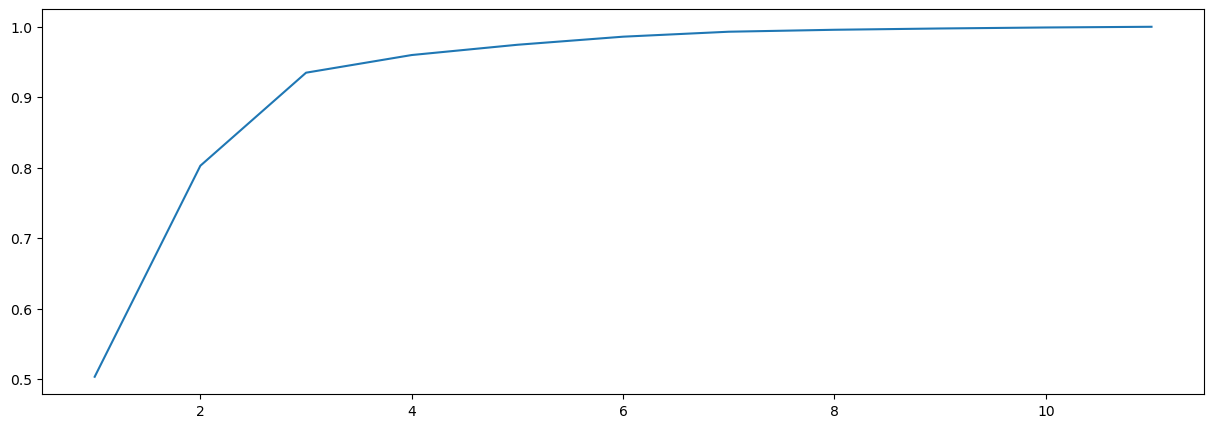

In [1286]:
n = base_num_cr.shape[0] # nombre d'observation
p = base_num_cr.shape[1] # nombre de variables
plt.plot(np.arange(1, p+1), np.cumsum(acp.explained_variance_ratio_)) # marginal expliquée

In [1287]:
# interprétation: 
#Les 2 premiers axes à eux seuls expliquent 80.2 % de la variance expliquée.

In [1288]:
np.cumsum(acp.explained_variance_ratio_)
# calcule la somme cumulée des proportions de variance expliquées par les composantes principales

array([0.50339249, 0.80284624, 0.93484927, 0.95991527, 0.97447836,
       0.98594652, 0.99298445, 0.99575122, 0.99758152, 0.99900623,
       1.        ])

<BarContainer object of 11 artists>

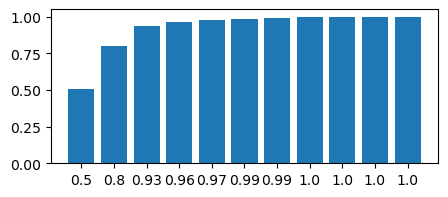

In [1289]:
fig = plt.figure(figsize = (5,2))
plt.bar(np.arange(len(acp.explained_variance_ratio_)) + 0.5, np.cumsum(acp.explained_variance_ratio_), tick_label = np.round(np.cumsum(acp.explained_variance_ratio_), 2))
# crée un graphique en barres pour visualiser la variance cumulée expliquée par les composantes principales

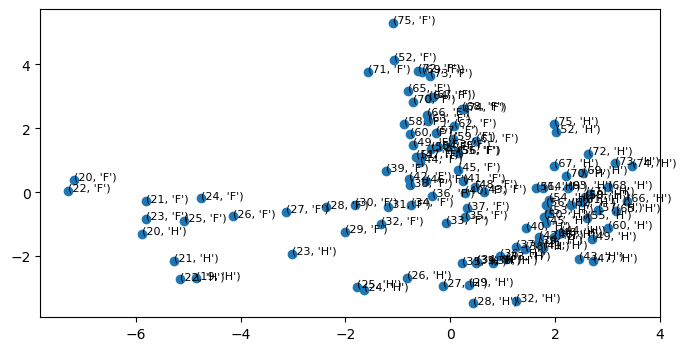

In [1290]:
fig = plt.figure(figsize=(8,4))  # crée une figure de taille 10x10 pour le scatter plot
plt.scatter(coord_fact[:, 0], coord_fact[:, 1])  # affiche les coordonnées factorielles des deux premières composantes principales
# Ajout des étiquettes
for i in range(0,len(coord_fact[:,0])):
    plt.text(coord_fact[i, 0],coord_fact[i,1],agreg_base.index[i],fontsize=8)
fig.savefig('ACP.pdf')  # enregistre le graphique dans un fichier PDF nommé ACP.pdf

In [1291]:
# Interprétation:
#Les jeunes hommes de 26, 27, 29, se distinguent fortement du reste des assurés : profil potentiellement plus risqué
#Les jeunes femmes ont des comportements proches de ceux des hommes expérimentés : profil potentiellement moins risqué
#Les personnes âgées ont un profil spécifique : probablement plus conservateur mais aussi plus segmenté

* Cercle de corrélation

In [1292]:
n = base_num_cr.shape[0]  # Nombre d'observations
p = base_num_cr.shape[1]  # Nombre de variables

var_cor = (n-1)/n * acp.explained_variance_
corvar = np.zeros((p, acp.n_components_))
var_cor_rac = np.sqrt(var_cor)

for k in range(acp.n_components_):
    corvar[:, k] = acp.components_[k, :] * var_cor_rac[k]

print(corvar)

[[ 6.51036507e-01  6.85534343e-01  2.13391455e-01 -8.94451557e-02
  -1.43725824e-01  1.48266123e-01 -5.01500109e-02  5.39865461e-02
   1.82099989e-02 -6.50032730e-02 -5.58805015e-03]
 [-8.21999276e-01 -4.63592597e-01  1.15991745e-01  8.48280260e-02
  -2.85145320e-02  2.87650429e-01  6.52853038e-02  1.08123818e-03
   4.64724248e-03  2.87587027e-02  9.02042504e-03]
 [ 4.61988217e-01  6.06055237e-01 -5.61148418e-01  1.61730509e-01
   2.48759788e-01  1.11668907e-01 -6.17275509e-02 -4.55491379e-03
   7.74250766e-04 -2.66163099e-03 -5.43456958e-03]
 [ 6.17898475e-01  7.44573443e-01  1.67710867e-01 -8.63461463e-02
  -1.01612914e-01  4.46441008e-02 -6.94391526e-02 -6.52997118e-02
  -1.96516075e-02  7.94173416e-02  1.14822352e-02]
 [ 5.79308248e-01  7.17741156e-01  2.58805650e-01  1.86022297e-01
   7.97751341e-03 -3.26898809e-02  2.15621229e-01  2.61833873e-03
  -5.26559194e-03  2.35818142e-03  3.65584369e-05]
 [-2.87493937e-02 -7.74550132e-02  9.68711824e-01  1.43731527e-01
   1.57913530e-01 -

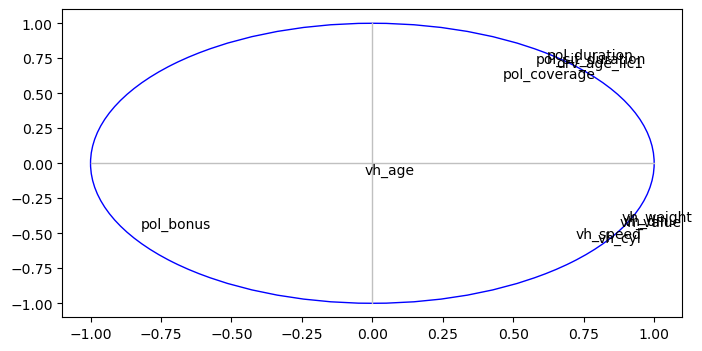

In [1293]:
# Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,4))
# affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(agreg_base.columns[j],(corvar[j,0],corvar[j,1]))
# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
# ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# affichage
plt.show()

In [1294]:
# Interprétation: 
# L’analyse en composantes principales (ACP) a permis de résumer près de 80 % de l’information contenue dans les variables quantitatives à travers les deux premiers axes :
#F1 semble capter les effets liés aux caractéristiques générales du contrat ou du véhicule
#F2 capture probablement des différences de profil personnel
#Cependant, le cercle de corrélation montre que certaines variables comme vh_age, pol_bonus, ou pol_sit_duration sont faiblement représentées dans ce plan.
#Cela signifie que leur contribution à la différenciation des assurés est répartie sur d'autres dimensions.

In [1295]:
# les jeunes en bas à droite du nuage des points des coordonnées factorielles ont un bonus élevé (donc malus) indiquant un profil à risque.
# les femmes et les hommes de 35-45 ans au centre à droite ont un bonus équilibré entrainant une couverture moyenne. Profil cœur de cible pour l'assureur.
# Les personnes âgées en haut à gauche ont des Véhicules plus anciens, moins couvert, bonus excellent. Profils distincts mais pas dangereux.

In [1296]:
ass_sin.drv_sex1.unique()

array(['Femme', 'Homme'], dtype=object)

* Analyse Factorielle des Correspondances (AFC)

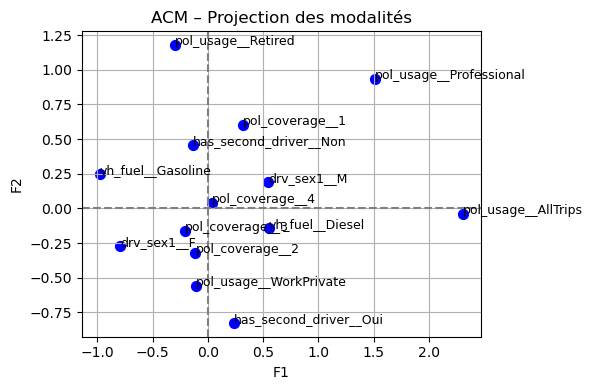

In [1297]:
import pandas as pd
import matplotlib.pyplot as plt
from prince import MCA

# préparation de la base
ass_sin = pd.read_csv("ass_sin.csv")
ass_sin['has_second_driver'] = ass_sin['drv_drv2'].map({'Yes': 'Oui', 'No': 'Non'})

# Sélection des variables qualitatives
df = ass_sin[[
    'drv_sex1',        # Sexe
    'pol_coverage',    # Couverture
    'vh_fuel',         # Carburant
    'has_second_driver',
    'pol_usage'        #  présence du conducteur secondaire
]].dropna().astype(str)

# Instanciation et ajustement de l'ACM
mca = MCA(n_components=2, random_state=42)
mca = mca.fit(df)

# Récupération des coordonnées des modalités
coords = mca.column_coordinates(df)

# Affichage du plan factoriel
plt.figure(figsize=(6, 4))
plt.scatter(coords[0], coords[1], c='blue', s=50)

# Ajout des labels
for i, label in enumerate(coords.index):
    plt.text(coords.iloc[i, 0], coords.iloc[i, 1], str(label), fontsize=9)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("ACM – Projection des modalités")
plt.grid(True)
plt.tight_layout()
plt.show()


In [1298]:
print(ass_sin.columns)


Index(['id_client_x', 'id_vehicle_x', 'id_policy', 'id_year_x', 'pol_bonus',
       'pol_coverage', 'pol_duration', 'pol_sit_duration', 'pol_pay_freq',
       'pol_payd', 'pol_usage', 'pol_insee_code', 'drv_drv2', 'drv_age1',
       'drv_age2', 'drv_sex1', 'drv_age_lic1', 'drv_age_lic2', 'vh_age',
       'vh_cyl', 'vh_din', 'vh_fuel', 'vh_make', 'vh_model', 'vh_sale_begin',
       'vh_sale_end', 'vh_speed', 'vh_type', 'vh_value', 'vh_weight',
       'id_claim', 'claim_nb', 'claim_amount', 'has_second_driver'],
      dtype='object')


In [1299]:
# interprétation: 
#L'axe F1 horizontal semble séparer les profils plus prudents ou standards à gauche des profils plus risqués ou spécifiques à droite.
#L' axe F2 vertical semble structurer la progression des niveaux de couverture ou la combinaison de plusieurs modalités liées à la couverture.
#drv_sex1__M est proche de vh_fuel__Diesel:Les hommes conduisent plus souvent des véhicules diesel
# has_second_driver__Oui proche de ces deux	donc, les conducteurs masculins utilisant le diesel partagent plus souvent leur véhicule.
#drv_sex1__F proche de vh_fuel__Gasoline et has_second_driver__Non:	Les femmes conduisent souvent seules des véhicules à Gasoline (essence). 
# pol_coverage__4 (isolé en bas) Les assurés avec couverture maximale forment un groupe spécifique peu corrélé au reste
# pol_coverage__1 très en haut	Représente les profils les moins couverts, donc il sont plus prudents ou les moins exposés

# Modèle de scoring à mettre dans la partie ML à base des résultats de l'ACP

In [1300]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chargement des données
base_clim = pd.read_csv("Base_climatique.csv")  
base_tot_s = pd.read_csv("Base_tot.csv")
# Extraire les 2 premiers caractères du code INSEE
base_tot_s["DEPT"] = base_tot_s["pol_insee_code"].astype(str).str[:2]

# Vérification et renommage de la colonne DEP
if 'DEP' in base_clim.columns:
    base_clim = base_clim.rename(columns={'DEP': 'DEPT'})
else:
    raise ValueError("La colonne 'DEP' n'existe pas dans la base climatique.")

# Formatage du code département
base_clim["DEPT"] = base_clim["DEPT"].astype(str).str.zfill(2)
base_tot_s["DEPT"] = base_tot_s["DEPT"].astype(str).str.zfill(2)

# Variables climatiques pertinentes
vars_clim = [
    'RR', 'NBJRR10', 'NBJRR30', 
    'TX', 'TN', 'TM',
    'NBJTX30', 'NBJTN5', 'TAMPLIM', 'NBJGELEE'
]

# Agrégation climat par département
zonier = base_clim.groupby("DEPT")[vars_clim].mean().reset_index()

# Standardisation + ACP
scaler = StandardScaler()
X_clim = scaler.fit_transform(zonier[vars_clim])
pca = PCA(n_components=2)
components = pca.fit_transform(X_clim)

# Création d’un DataFrame avec ACP
zonier_pca = zonier[["DEPT"]].copy()
zonier_pca["ACP1"] = components[:, 0]
zonier_pca["ACP2"] = components[:, 1]

# Jointure avec la base principale
base_tot_s = base_tot_s.merge(zonier_pca, on="DEPT", how="left")

# Sauvegarde
base_tot_s.to_csv("Base_tot_ACP.csv", index=False)

# Résumé
print(" Intégration réussie des axes ACP dans la base principale.")
print("Variance expliquée par ACP1 & ACP2 :", pca.explained_variance_ratio_)
print(base_tot_s[["DEPT", "ACP1", "ACP2"]].dropna().head())


 Intégration réussie des axes ACP dans la base principale.
Variance expliquée par ACP1 & ACP2 : [0.55127614 0.2306838 ]
  DEPT      ACP1      ACP2
0   71 -0.700185 -0.024207
1   67 -1.136817 -0.095788
2   69 -0.534598 -0.738948
3   69 -0.534598 -0.738948
4   19  0.040880  2.237000


In [1301]:
# L'ACP1 représente le premier axe de l'ACP , qui explique 55% de la variance climatique. 
# Il est principalement associé aux conditions générales de climat humide et froid. Les départements avec des valeurs élevées sur ACP1 sont caractérisés par des précipitations abondantes (RR, NBJRR10) et des températures moyennes plus basses (TM, TN).
# l'ACP1 différencie donc les régions océaniques/montagneuses du reste du territoire

# l'ACP2 second axe climatique, expliquant 23% de la variance ont des coefficients plus faibles.
# Le deuxième axe (ACP2) explique 23,1 % de la variance.
#Il capte la dimension des extrêmes thermiques, notamment à travers des variables comme le nombre de jours de fortes chaleurs (NBJTX30) ou de gelées (NBJGELEE).
#l'ACP2 distingue donc les départements connaissant des variations thermiques fortes (gel intense, vagues de chaleur).

* L'objectif de ce modèle est de prédire la probabilité qu’un assuré soit sinistré (sinistre = 1) à partir de variables liées au :
 - contrat (bonus, couverture), au conducteur (âge, sexe), au véhicule (valeur) et aux conditions climatiques (ACP1, ACP2).

In [1302]:
df=Base_tot.copy()

Classification Report :
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     26090
           1       0.50      0.00      0.00      3784

    accuracy                           0.87     29874
   macro avg       0.69      0.50      0.47     29874
weighted avg       0.83      0.87      0.81     29874

AUC :  0.6127330321857094


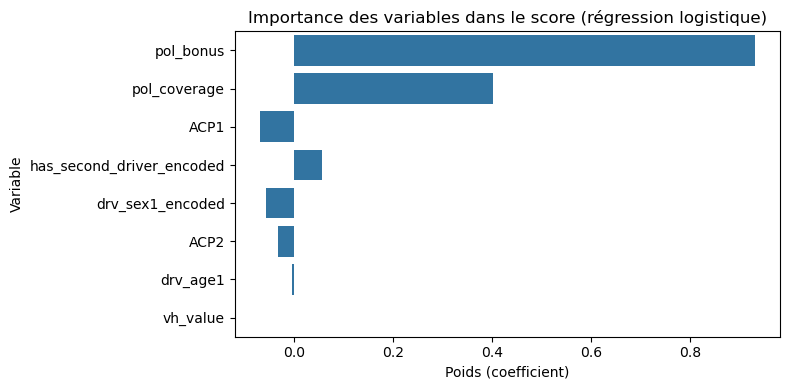

In [1303]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------
# Étape 0 : Création des variables nécessaires
# ----------------------------------------

# Création de la cible sinistre
base_tot_s["sinistre"] = (base_tot_s["claim_nb"] > 0).astype(int)

# Encodage binaire
base_tot_s["drv_sex1_encoded"] = (base_tot_s["drv_sex1"] == "M").astype(int)
base_tot_s["has_second_driver_encoded"] = (base_tot_s["drv_drv2"] == "Yes").astype(int)

# Vérification de la présence des variables ACP
assert "ACP1" in base_tot_s.columns and "ACP2" in base_tot_s.columns, "Les colonnes ACP1 et ACP2 doivent être présentes"

# ----------------------------------------
# Étape 1 : Sélection des variables
# ----------------------------------------
features = [
    "pol_bonus", "pol_coverage", "vh_value", "drv_age1",
    "drv_sex1_encoded", "has_second_driver_encoded",
    "ACP1", "ACP2"
]

X = base_tot_s[features].dropna()
y = base_tot_s.loc[X.index, "sinistre"]

# ----------------------------------------
# Étape 2 : Train / test split
# ----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------
# Étape 3 : Modèle de scoring (régression logistique)
# ----------------------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ----------------------------------------
# Étape 4 : Évaluation du modèle
# ----------------------------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report :")
print(classification_report(y_test, y_pred))

print("AUC : ", roc_auc_score(y_test, y_proba))

# ----------------------------------------
# Étape 5 : Interprétation des coefficients
# ----------------------------------------
coefficients = pd.DataFrame({
    "Variable": X.columns,
    "Poids (coefficient)": model.coef_[0]
}).sort_values(by="Poids (coefficient)", key=abs, ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x="Poids (coefficient)", y="Variable", data=coefficients)
plt.title("Importance des variables dans le score (régression logistique)")
plt.tight_layout()
plt.show()


In [1304]:
# caractéristiques de chaque axe
loadings = pd.DataFrame(pca.components_.T, columns=['ACP1', 'ACP2'], index=vars_clim)
print(loadings.sort_values(by='ACP1', ascending=False))

              ACP1      ACP2
TM        0.409876 -0.100816
TX        0.394615 -0.073732
TN        0.389604 -0.198464
NBJTX30   0.352544  0.056902
NBJRR30   0.320597  0.390141
RR        0.313774  0.376415
NBJRR10   0.260826  0.440324
TAMPLIM  -0.106423  0.102221
NBJTN5   -0.182366  0.506286
NBJGELEE -0.293857  0.432685


In [1305]:
# Interprétation : 

# pol_bonus et pol_coverage : Ces variables liées à la police d'assurance (bonus/malus et type de couverture) ont les coefficients les plus élevés,
#indiquant qu'elles jouent un rôle clé dans la prédiction du risque sinistre. 

# ACP1 : représente le premier axe de l'ACP,qui explique 55% de la variance climatique.
# Cela suggère que les conditions climatiques telles que :la température élevée et une intense précipitationinfluencent significativement le risque. 

# ACP2 est caractéridé par les températures extrêms thermique et les jours de gèle (NBJGELEE ,NBJTN5) et 
# Fréquence des pluies modérées à intense(NBJRR10, NBJRR30) ce qui peut entrainer rendre les routes glissantes engendrant les sinistres

# La présence d'un second conducteur a aussi un impact notable sur le risque.

#Le modèle prédit presque uniquement la classe 0, avec un rappel nul pour les sinistrés : il ne détecte pas les vrais sinistres.
# la précision global est 87% mais cela masque un problème de déséquilibre. 
# malgré une bonne performance apparente en accuracy, le modèle est inefficace pour identifier les sinistrés, donc peu utile en pratique si l’objectif est la prévention ou la tarification.

- Améliorons avec la méthode de class_weight='balanced' dans la régression logistique:

In [1306]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Modèle de régression logistique avec pondération automatique
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train, y_train)

# Prédictions
y_pred_bal = model_balanced.predict(X_test)
y_proba_bal = model_balanced.predict_proba(X_test)[:, 1]

# Résultats
print("Classification Report (class_weight='balanced') :")
print(classification_report(y_test, y_pred_bal))

print("AUC : ", roc_auc_score(y_test, y_proba_bal))


Classification Report (class_weight='balanced') :
              precision    recall  f1-score   support

           0       0.92      0.45      0.61     26090
           1       0.16      0.72      0.26      3784

    accuracy                           0.49     29874
   macro avg       0.54      0.59      0.44     29874
weighted avg       0.82      0.49      0.56     29874

AUC :  0.613201162912248


C:\Users\cleme\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [1307]:
# Le modèle détecte désormais 72 % des sinistrés, ce qui est beaucoup mieux pour l’usage en scoring. 
# Par contre, la précision chute à 0.16, donc il y a beaucoup de faux positifs : certains non-sinistrés seront mal classés comme à risque.

- Améliorons le modèle en ajustant le seuil de décision afin de maximiser le f1-score

In [1308]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# Prédictions de probabilité
y_proba = model.predict_proba(X_test)[:, 1]

# Liste des seuils et F1 associés
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

# Meilleur seuil selon le F1-score
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Seuil optimal (F1) : {best_threshold:.2f}")


Seuil optimal (F1) : 0.13


In [1309]:
y_pred_thresh = (y_proba >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_thresh))


              precision    recall  f1-score   support

           0       0.91      0.54      0.68     26090
           1       0.17      0.64      0.26      3784

    accuracy                           0.55     29874
   macro avg       0.54      0.59      0.47     29874
weighted avg       0.82      0.55      0.63     29874



In [1310]:
# Le modèle identifie encore bien les non sinistrés, mais en détecte moins qu’avant.
# On a Fort gain de rappel, on détecte 64% des sinistrés, au prix d'une précision plus faible (faux positifs).
# Cela implique q'on a une bonne couverture des sinistrés : plus de 6 sinistrés sur 10 sont détectés 

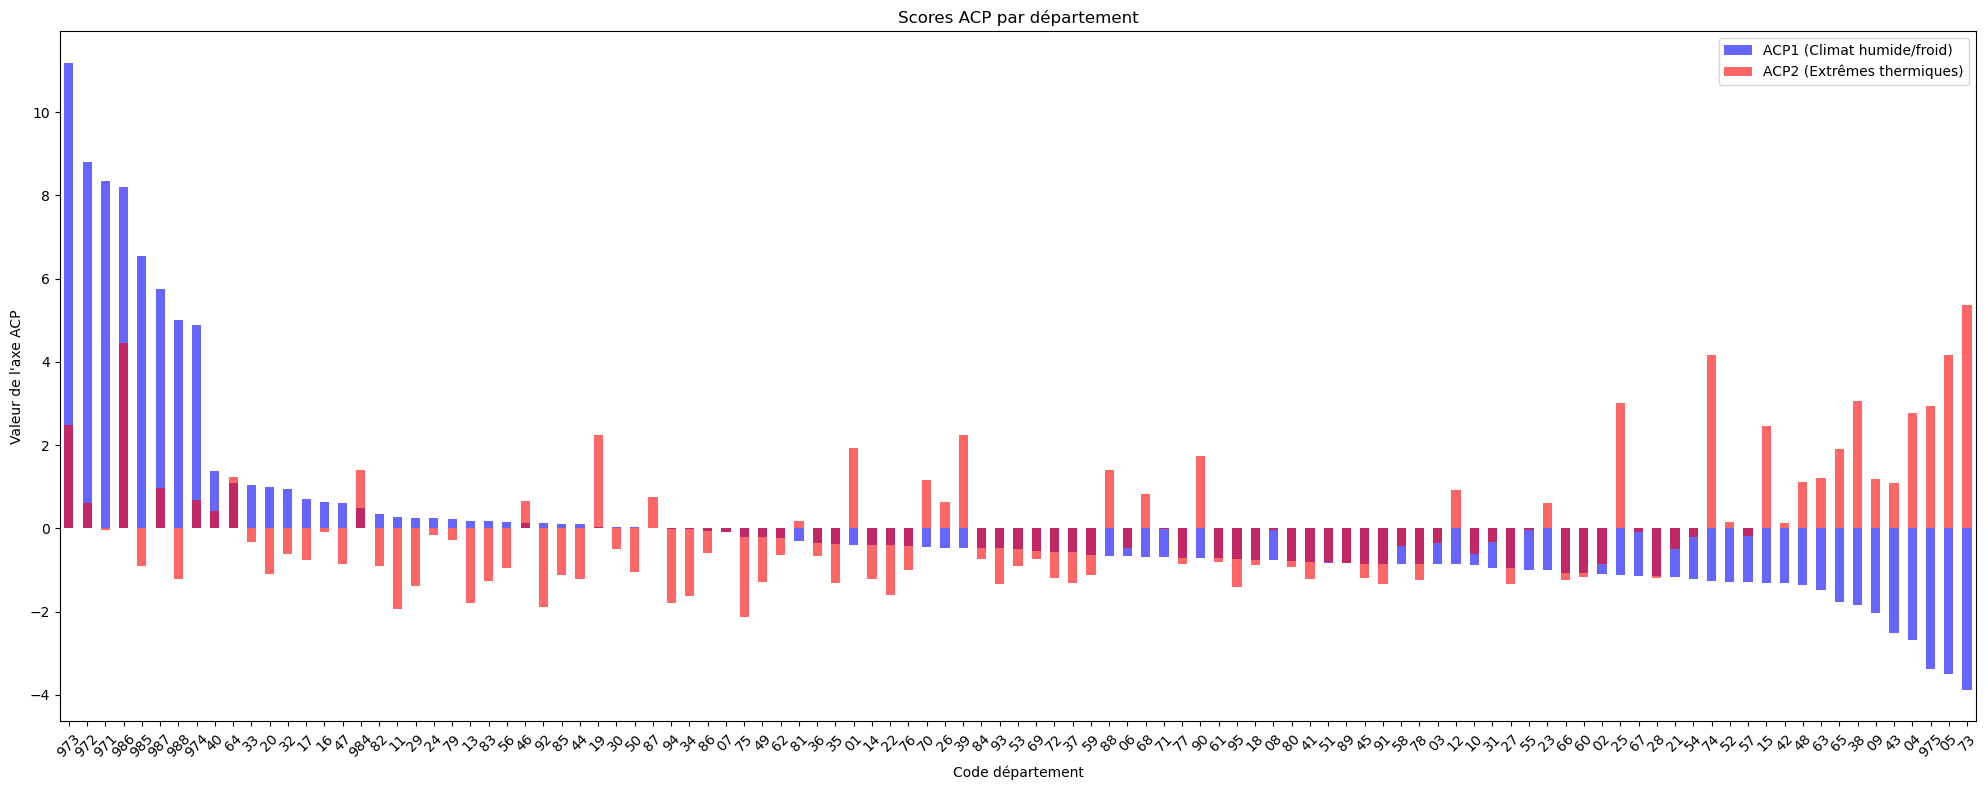

In [1311]:
import matplotlib.pyplot as plt

# Agrégation des scores ACP par département
acp_by_dept = zonier_pca.groupby("DEPT")[["ACP1", "ACP2"]].mean().sort_values(by="ACP1", ascending=False)

# Visualisation
plt.figure(figsize=(20, 8))
acp_by_dept["ACP1"].plot(kind="bar", color="blue", alpha=0.6, label="ACP1 (Climat humide/froid)")
acp_by_dept["ACP2"].plot(kind="bar", color="red", alpha=0.6, label="ACP2 (Extrêmes thermiques)")
plt.title("Scores ACP par département")
plt.xlabel("Code département")
plt.ylabel("Valeur de l'axe ACP")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1312]:
#interprétation
# Certains départements comme 73, 74, 38 présentent de forts scores ACP1 : ils sont associés à des climats froids et humides.

# À l’opposé, d'autres département surtout au sud et en bordure méditerranéenne ont des scores ACP1 négatifs et des scores ACP2 élevés : 
#ils connaissent davantage d’extrêmes thermiques (très chaud ou très froid).

# Un grand nombre de départements présentent des scores proches de zéro, ce qui indique un climat modéré.
#La répartition climatique est très hétérogène selon les territoires, ce qui justifie d’avoir intégré ces axes climatiques dans l’analyse de la sinistralité.



In [1313]:
#interprétation
# Certains départements comme 73, 74, 38 présentent de forts scores ACP1 : ils sont associés à des climats froids et humides.
# À l’opposé, d'autres (surtout au sud et en bordure méditerranéenne) ont des scores ACP1 négatifs et des scores ACP2 élevés : 
#ils connaissent davantage d’extrêmes thermiques (très chaud ou très froid).


In [1314]:
import plotly.express as px

# Supposons que zonier_pca contienne une colonne "nom
fig = px.scatter(zonier_pca, x="ACP1", y="ACP2", color="ACP1", hover_name="DEPT",
                 title="Scores ACP par département")
fig.show()

In [1315]:
# ACP1 élevé  les départements avec climat humide et froid ce qui implique un risque sinistre accru.
#ACP2 élevé : les départements avec des fortes amplitudes thermiques ont des effets secondaires sur le sinistre.

* Analyse Factorielle de Données Mixtes (AFDM) 

* Utilisation de la Base_tot: Base incluant les assurés sinistré et non sinistrés

In [1316]:
Base_tot.head()

,id_client_x,id_vehicle_x,id_policy,id_year_x,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,id_claim,claim_nb,claim_amount
0,A00072644,V01,A00072644-V01,Year 0,0.50,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,45.0,F,33.0,0.0,6.0,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0,CL01,1.0,1860.92
1,A00036953,V01,A00036953-V01,Year 0,0.50,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,39.0,34.0,1.0,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0,NaN,NaN,NaN
2,A00079066,V01,A00079066-V01,Year 0,0.50,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,45.0,F,51.0,0.0,6.0,1598.0,113.0,Gasoline,RENAULT,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0,NaN,NaN,NaN
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,15.0,17.0,17.0,1294.0,100.0,Gasoline,RENAULT,CLIO,18.0,15.0,190.0,Tourism,12517.0,860.0,NaN,NaN,NaN
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,45.0,F,9.0,0.0,18.0,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0,NaN,NaN,NaN


In [1317]:
# Remplacement des NAN par 0 dans la base totale
Base_tot.claim_nb.fillna(0, inplace=True)
Base_tot.claim_amount.fillna(0, inplace = True)
Base_tot.id_claim.fillna(0, inplace =True)

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\659008321.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\659008321.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [1318]:
Base_tot.isna().sum() 
#BASE3.isna().sum()

id_client_x         0
id_vehicle_x        0
id_policy           0
id_year_x           0
pol_bonus           0
pol_coverage        0
pol_duration        0
pol_sit_duration    0
pol_pay_freq        0
pol_payd            0
pol_usage           0
pol_insee_code      0
drv_drv2            0
drv_age1            0
drv_age2            0
drv_sex1            0
drv_age_lic1        0
drv_age_lic2        0
vh_age              0
vh_cyl              0
vh_din              0
vh_fuel             0
vh_make             0
vh_model            0
vh_sale_begin       0
vh_sale_end         0
vh_speed            0
vh_type             0
vh_value            0
vh_weight           0
id_claim            0
claim_nb            0
claim_amount        0
dtype: int64

In [1319]:

# Création de la variable 'sinistre'
Base_tot["sinistre"] = (Base_tot["claim_amount"] > 0).astype(int)

# Recode 'has_second_driver'
Base_tot['has_second_driver'] = Base_tot['drv_drv2'].map({'Yes': 'Oui', 'No': 'Non'})

# Variables quantitatives
quant_vars = [
    'drv_age1', 'drv_age_lic1', 'pol_bonus', 'vh_value',
    'vh_din', 'vh_speed', 'vh_weight', 'vh_age'
]

# Variables qualitatives
qual_vars = [
    'pol_coverage', 'pol_pay_freq', 'has_second_driver',
    'drv_sex1', 'vh_fuel', 'vh_type'
]

# Sélection des colonnes nécessaires
afmd_vars = quant_vars + qual_vars + ['sinistre']
afmd_df = Base_tot[afmd_vars].dropna().copy()

In [1320]:
# Standardiser les variables quantitatives
# Transformer les variables qualitatives en variables indicatrices (one-hot encoding)
#Appliquer une Analyse Discriminante Linéaire (LDA) ou une méthode factorielle supervisée équivalente

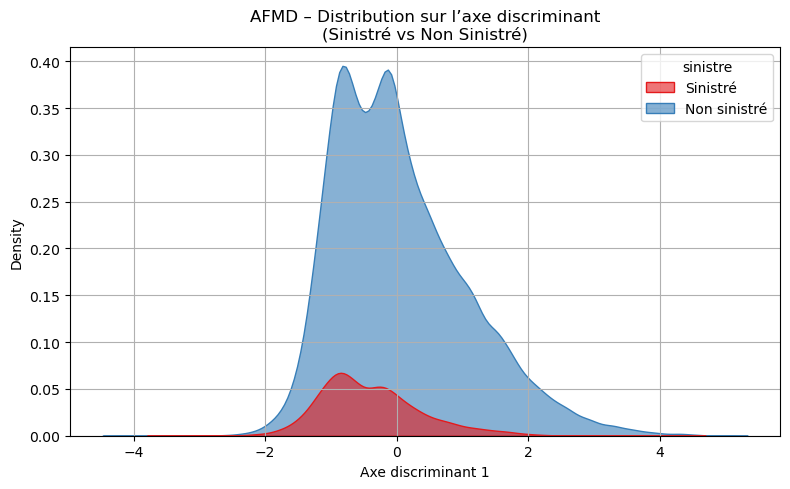

In [1321]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Séparation des variables explicatives
X_quanti = afmd_df[quant_vars]

# Encodage des variables qualitatives en dummies
X_quali = pd.get_dummies(afmd_df[qual_vars], drop_first=True)

# Fusion des variables
X = pd.concat([X_quanti, X_quali], axis=1)

# Standardisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Variable cible : sinistré ou non
y = afmd_df["sinistre"]

# Modèle LDA (Analyse Discriminante Linéaire)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)


# Création d'un DataFrame pour l'affichage
df_lda = pd.DataFrame({
    'projection': X_lda[:, 0],
    'sinistre': y.map({0: 'Non sinistré', 1: 'Sinistré'})
})

# Affichage de la distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_lda, x='projection', hue='sinistre', fill=True, palette="Set1", alpha=0.6)
plt.title("AFMD – Distribution sur l’axe discriminant\n(Sinistré vs Non Sinistré)")
plt.xlabel("Axe discriminant 1")
plt.grid(True)
plt.tight_layout()
plt.show()

In [1322]:
# interprétation: 

#Les non sinistrés (en bleu) forment une population nombreuse, homogène et bien regroupée autour d’un même profil.
# Les assurés non sinistrés ont des caractéristiques communes (bonus favorable, véhicule classique, contrat équilibré) profil plus prévisible

# Les sinistrés (en rouge) sont plus dispersés, donc plus difficiles à cerner avec précision.
# Les sinistrés sont plus variés, ce qui montre que le risque de sinistre dépend d’une combinaison subtile de plusieurs facteurs. 

# Interface avec la librairie ipywidgests de la base

In [1323]:
!pip install ipywidgets

In [1397]:
import ipywidgets as widgets
from IPython.display import display

# Charger la base
df = pd.read_csv('tot_ass.csv')

# Widget pour choisir une colonne
column_selector = widgets.Dropdown(
    options=df.select_dtypes(include=['number']).columns.tolist(), # seulement colonnes numériques
    description='Colonne:',
    disabled=False
)

# Boutons
button_summary = widgets.Button(
    description='Résumé Statistique',
    button_style='info',
    tooltip='Afficher moyenne, écart-type, etc.',
    icon='calculator'
)

button_plot = widgets.Button(
    description='Afficher Graphique',
    button_style='success',
    tooltip='Afficher histogramme',
    icon='bar-chart'
)

# Zone d'affichage
output = widgets.Output()

# Fonctions déclenchées
def show_summary(b):
    with output:
        output.clear_output()
        selected_col = column_selector.value
        print(f"Résumé statistique pour '{selected_col}':")
        print(df[selected_col].describe())

def plot_histogram(b):
    with output:
        output.clear_output()
        selected_col = column_selector.value
        plt.figure(figsize=(8,5))
        plt.hist(df[selected_col].dropna(), bins=30)
        plt.title(f"Histogramme de {selected_col}")
        plt.xlabel(selected_col)
        plt.ylabel('Fréquence')
        plt.grid(True)
        plt.show()

# Lier les boutons aux fonctions
button_summary.on_click(show_summary)
button_plot.on_click(plot_histogram)

# Interface
ui = widgets.VBox([
    widgets.Label("Exploration avancée de la base des assurés sinistrés :"),
    column_selector,
    widgets.HBox([button_summary, button_plot]),
    output
])

display(ui)


# Partie économétrie
* Régression logistique sur la base assurée (ass), base des assurés claim_amount > 0 et non assurés claim_amount = 0.
* * L'objectif est de prédire ou d'expliquer si un assuré aura un sinistre ou non. 

In [1325]:
#Base des assurés total : sinistrés ou non
tot_ass.head()

,id_client_x,id_vehicle_x,id_policy,id_year_x,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,id_claim,claim_nb,claim_amount
0,A00072644,V01,A00072644-V01,Year 0,0.50,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,45.0,F,33.0,0.0,6.0,1910.0,116.0,Diesel,FIAT,STILO,10.0,7.0,192.0,Tourism,18000.0,1320.0,CL01,1.0,1860.92
1,A00036953,V01,A00036953-V01,Year 0,0.50,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,39.0,34.0,1.0,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0,0,0.0,0.00
2,A00079066,V01,A00079066-V01,Year 0,0.50,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,45.0,F,51.0,0.0,6.0,1598.0,113.0,Gasoline,RENAULT,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0,0,0.0,0.00
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,15.0,17.0,17.0,1294.0,100.0,Gasoline,RENAULT,CLIO,18.0,15.0,190.0,Tourism,12517.0,860.0,0,0.0,0.00
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,45.0,F,9.0,0.0,18.0,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0,0,0.0,0.00


In [1326]:
# Suppression des variables inutiles:
tot_ass.drop(columns=['id_client_x', 'id_vehicle_x','id_year_x', 'id_claim','vh_make','vh_model','drv_age2', 
         'drv_age_lic2','vh_sale_begin','vh_sale_end'],inplace= True)
# id : identifiant unique 
# vh_make, vh_model trop de modalités différentes, bruit
# drv_age2, drv_age_lic2	Infos sur le conducteur secondaire, souvent manquantes
# vh_sale_begin, vh_sale_end	dates techniques, rarement utilisées dans les modèles de risque

* Étape 1 : préparation de la base
  
  - Création de la variable cible : sinistre

In [1327]:
tot_ass["sinistre"] = (ass["claim_amount"] > 0).astype(int)

In [1328]:
tot_ass

,id_policy,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_sex1,drv_age_lic1,vh_age,vh_cyl,vh_din,vh_fuel,vh_speed,vh_type,vh_value,vh_weight,claim_nb,claim_amount,sinistre
0,A00072644-V01,0.50,4,8.0,4.0,Monthly,No,WorkPrivate,7181,No,53.0,F,33.0,6.0,1910.0,116.0,Diesel,192.0,Tourism,18000.0,1320.0,1.0,1860.92,1
1,A00036953-V01,0.50,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,M,39.0,1.0,1997.0,164.0,Diesel,216.0,Tourism,32000.0,1399.0,0.0,0.00,0
2,A00079066-V01,0.50,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,F,51.0,6.0,1598.0,113.0,Gasoline,185.0,Tourism,20800.0,1320.0,0.0,0.00,0
3,A00018024-V01,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,F,15.0,17.0,1294.0,100.0,Gasoline,190.0,Tourism,12517.0,860.0,0.0,0.00,0
4,A00019276-V01,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,F,9.0,18.0,1118.0,49.0,Gasoline,143.0,Tourism,9742.0,820.0,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99950,A00016135-V01,0.50,4,25.0,1.0,Yearly,No,Retired,76341,Yes,65.0,M,47.0,7.0,2148.0,143.0,Diesel,215.0,Tourism,33265.0,1545.0,0.0,0.00,0
99951,A00033699-V01,0.50,3,11.0,2.0,Biannual,No,Professional,81257,No,42.0,M,22.0,8.0,2664.0,125.0,Diesel,155.0,Commercial,26800.0,1700.0,1.0,524.72,1
99952,A00012012-V01,0.50,4,17.0,3.0,Yearly,No,WorkPrivate,57547,No,40.0,M,17.0,7.0,1781.0,226.0,Gasoline,243.0,Tourism,37710.0,1465.0,0.0,0.00,0
99953,A00073986-V01,0.50,4,20.0,1.0,Biannual,Yes,WorkPrivate,45308,No,65.0,M,47.0,15.0,1108.0,56.0,Gasoline,150.0,Tourism,9254.0,840.0,0.0,0.00,0


In [1329]:
# Standardisation des variables quantitatives: 

quant_vars = [
    "drv_age1", "drv_age_lic1", "pol_bonus", "pol_duration",
    "pol_sit_duration", "vh_age", "vh_cyl", "vh_din", 
    "vh_speed", "vh_value", "vh_weight"  ] 

# Création d'une copie de travail
tot_ass_copy = tot_ass.copy()

# Standardisation des variables quantitatives
scaler = StandardScaler()
X_quant_scaled = scaler.fit_transform(tot_ass_copy[quant_vars])

# Création d'un DataFrame standardisé
X_quant_scaled_df = pd.DataFrame(X_quant_scaled, columns=quant_vars, index=tot_ass_copy.index)

# Ajout des colonnes standardisées à la base copiée
for col in quant_vars:
    tot_ass_copy[col + "_std"] = X_quant_scaled_df[col]

# Affichage des premières lignes
tot_ass_copy[[col + "_std" for col in quant_vars]].head()


,drv_age1_std,drv_age_lic1_std,pol_bonus_std,pol_duration_std,pol_sit_duration_std,vh_age_std,vh_cyl_std,vh_din_std,vh_speed_std,vh_value_std,vh_weight_std
0,0.096237,0.070612,-0.380624,-0.360281,0.532561,-0.505422,0.571746,0.717094,0.912357,-0.006876,0.531325
1,0.593805,0.541318,-0.380624,-0.009517,-0.731340,-1.217031,0.760139,2.116209,1.939933,1.609198,0.811775
2,1.754797,1.482729,-0.380624,-0.477202,-0.731340,-0.505422,-0.103871,0.629649,0.612648,0.316339,0.531325
3,-1.396466,-1.341504,1.049039,-0.711044,-0.731340,1.060119,-0.762165,0.250722,0.826726,-0.639799,-1.101678
4,-1.645250,-1.812209,1.865990,-1.178729,-0.731340,1.202441,-1.143282,-1.235839,-1.185609,-0.960128,-1.243678


In [1330]:
# Liste des variables qualitatives à encoder
qual_vars = [
    "pol_pay_freq", "pol_payd", "pol_usage", "drv_sex1",
    "drv_drv2", "vh_fuel", "vh_type"
]

# Encodage one-hot et suppression des modalités de références 
X_qual_encoded = pd.get_dummies(tot_ass_copy[qual_vars], drop_first=True)

# Fusion avec les variables quantitatives standardisées
X_model = pd.concat([tot_ass_copy[[col + "_std" for col in quant_vars]], X_qual_encoded], axis=1)

# Aperçu du DataFrame final prêt pour la modélisation
X_model.head()

,drv_age1_std,drv_age_lic1_std,pol_bonus_std,pol_duration_std,pol_sit_duration_std,vh_age_std,vh_cyl_std,vh_din_std,vh_speed_std,vh_value_std,vh_weight_std,pol_pay_freq_Monthly,pol_pay_freq_Quarterly,pol_pay_freq_Yearly,pol_payd_Yes,pol_usage_Professional,pol_usage_Retired,pol_usage_WorkPrivate,drv_sex1_M,drv_drv2_Yes,vh_fuel_Gasoline,vh_type_Tourism
0,0.096237,0.070612,-0.380624,-0.360281,0.532561,-0.505422,0.571746,0.717094,0.912357,-0.006876,0.531325,True,False,False,False,False,False,True,False,False,False,True
1,0.593805,0.541318,-0.380624,-0.009517,-0.731340,-1.217031,0.760139,2.116209,1.939933,1.609198,0.811775,False,False,True,False,False,True,False,True,True,False,True
2,1.754797,1.482729,-0.380624,-0.477202,-0.731340,-0.505422,-0.103871,0.629649,0.612648,0.316339,0.531325,False,False,True,False,False,True,False,False,False,True,True
3,-1.396466,-1.341504,1.049039,-0.711044,-0.731340,1.060119,-0.762165,0.250722,0.826726,-0.639799,-1.101678,False,False,True,False,False,False,True,False,True,True,True
4,-1.645250,-1.812209,1.865990,-1.178729,-0.731340,1.202441,-1.143282,-1.235839,-1.185609,-0.960128,-1.243678,True,False,False,False,False,False,True,False,False,True,True


#  Lancement de la régression logistique pour modéliser la variable sinistre (0/1) ?

In [1331]:
import statsmodels.api as sm

In [1332]:
X_model_const = sm.add_constant(X_model) # Ajout de la constante 
X_model_const = X_model_const.astype(float)
y = y.astype(float)

# modèle
logit_model = sm.Logit(y, X_model_const)
logit_result = logit_model.fit()
logit_result.summary()


Optimization terminated successfully.
         Current function value: 0.336758
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               sinistre   No. Observations:                99955
Model:                          Logit   Df Residuals:                    99932
Method:                           MLE   Df Model:                           22
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                 0.02933
Time:                        17:56:59   Log-Likelihood:                -33661.
converged:                       True   LL-Null:                       -34678.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.4578      0.252     -5.781      0.000      -1.952      -0.964
drv_age1_std               0.0034      0.019      0.175      0.861      -0.035       0.042
drv_age_lic1_std           0.0228      0.023      1.003      0.316      -0.022       0.067
pol_bonus_std              0.0604      0.011      5.584      0.000       0.039       0.082
pol_duration_std          -0.0031      0.012     -0.269      0.788      -0.026       0.020
pol_sit_duration_std      -0.0223      0.014     -1.577      0.115      -0.050       0.005
vh_age_std                -0.4254      0.018    -24.285      0.000      -0.460      -0.391
vh_cyl_std                 0.0737      0.024      3.074      0.002       0.027       0.121
vh_din_std                -0.0497      0.038     -1.290      0.197      -0.125       0.026
vh_speed_std               0.0847      0.024      3.462      0.001       0.037       0.133
vh_value_std               0.0126      0.027      0.472      0.637      -0.040       0.065
vh_weight_std              0.0429      0.018      2.405      0.016       0.008       0.078
pol_pay_freq_Monthly       0.0747      0.027      2.765      0.006       0.022       0.128
pol_pay_freq_Quarterly     0.1704      0.063      2.696      0.007       0.047       0.294
pol_pay_freq_Yearly       -0.0432      0.026     -1.679      0.093      -0.094       0.007
pol_payd_Yes              -0.2277      0.061     -3.755      0.000      -0.346      -0.109
pol_usage_Professional    -0.4650      0.250     -1.862      0.063      -0.954       0.025
pol_usage_Retired         -0.6604      0.249     -2.656      0.008      -1.148      -0.173
pol_usage_WorkPrivate     -0.6544      0.248     -2.643      0.008      -1.140      -0.169
drv_sex1_M                -0.0682      0.022     -3.056      0.002      -0.112      -0.024
drv_drv2_Yes               0.0258      0.022      1.184      0.236      -0.017       0.069
vh_fuel_Gasoline          -0.1799      0.030     -5.914      0.000      -0.239      -0.120
vh_type_Tourism            0.0269      0.047      0.571      0.568      -0.065       0.119
==========================================================================================
"""

In [1333]:
# Après la regression on remarque que plusieurs variables ne sont pas significatives et donc on a une faible performance du modèle

*  Suppression des variables non_significatives pour avoir un modèle plus robuste 

In [1334]:
# Récupération des p-values du modèle
pvalues = logit_result.pvalues

# Seuil de significativité à 5%
significant_vars = pvalues[pvalues < 0.05].index.tolist()

# On exclut la constante si elle est présente
if 'const' in significant_vars:
    significant_vars.remove('const')

# Création d'un nouveau X avec uniquement les variables significatives
X_model_significant = X_model_const[significant_vars]

# Réajout de la constante
X_model_significant = sm.add_constant(X_model_significant)

# Nouveau modèle avec variables significatives uniquement
logit_model_reduced = sm.Logit(y, X_model_significant)
logit_result_reduced = logit_model_reduced.fit()

# Résumé du nouveau modèle
logit_result_reduced.summary()

Optimization terminated successfully.
         Current function value: 0.336834
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               sinistre   No. Observations:                99955
Model:                          Logit   Df Residuals:                    99942
Method:                           MLE   Df Model:                           12
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                 0.02911
Time:                        17:57:00   Log-Likelihood:                -33668.
converged:                       True   LL-Null:                       -34678.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.9090      0.041    -46.487      0.000      -1.990      -1.829
pol_bonus_std              0.0535      0.010      5.513      0.000       0.034       0.072
vh_age_std                -0.4270      0.016    -27.026      0.000      -0.458      -0.396
vh_cyl_std                 0.0521      0.017      3.000      0.003       0.018       0.086
vh_speed_std               0.0663      0.014      4.871      0.000       0.040       0.093
vh_weight_std              0.0380      0.016      2.392      0.017       0.007       0.069
pol_pay_freq_Monthly       0.0965      0.023      4.246      0.000       0.052       0.141
pol_pay_freq_Quarterly     0.1937      0.061      3.153      0.002       0.073       0.314
pol_payd_Yes              -0.2116      0.060     -3.551      0.000      -0.328      -0.095
pol_usage_Retired         -0.1717      0.041     -4.200      0.000      -0.252      -0.092
pol_usage_WorkPrivate     -0.1899      0.037     -5.108      0.000      -0.263      -0.117
drv_sex1_M                -0.0674      0.022     -3.087      0.002      -0.110      -0.025
vh_fuel_Gasoline          -0.2016      0.026     -7.836      0.000      -0.252      -0.151
==========================================================================================
"""

In [1335]:
# Interpétation: toutes les variables ont un effet statistiquement significatives

# pol_bonus_std (0.0535): plus le bonus est faible (donc malus élevé), plus le risque de sinistre augmente, 
# vh_age_std (-0.4270): les véhicules plus récents sont associés à plus de sinistres 
#vh_cyl_std (+0.052):plus la cylindrée est élevée, plus le risque de sinistre augmente.
#vh_speed_std (0.0663): les véhicules rapides sont plus souvent impliqués dans des sinistres.
# vh_weight_std	(0.0380): les véhicules lourds sont légèrement plus à risque.
# pol_pay_freq_Monthly(0.0965): Les assurés qui paient mensuellement ont un risque plus élevé que ceux qui paient annuellement (modalité de référence).
# pol_pay_freq_Quarterly(0.1937): Les assurés en paiement fractionné ont des profils plus risqués statistiquement.
# pol_payd_Yes(	-0.2116): les contrats PAYD basé sur le kilométrage sont associés à moins de sinistres.
# pol_usage_Retired	(-0.1717): les retraités ont un risque de sinistre nettement inférieur.
# pol_usage_WorkPrivate	(-0.1899) : les véhicules usagés travail et personnels sont moins risqués que les professionnels(modalité de référence)
# drv_sex1_M(-0.0674): Les hommes ont un risque légèrement plus faible que les femmes (référence), contre intuitif  mais ici, d'autres variables (puissance, bonus…) absorbent une partie du risque.
# vh_fuel_Gasoline(-0.2016): Les véhicules essence(Gazoline) sont moins risqués que les diesels (modalité de référence).

In [1336]:
# Les résidus
print(dir(logit_result_reduced))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_data_in_cache', '_get_endog_name', '_get_robustcov_results', '_get_wald_nonlinear', '_transform_predict_exog', '_use_t', 'aic', 'bic', 'bse', 'conf_int', 'converged', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_distribution', 'get_influence', 'get_margeff', 'get_prediction', 'im_ratio', 'info_criteria', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'method', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generali

#  Valider le modèle en analysant les résidus (resid_response)

In [1337]:
eps = logit_result_reduced.resid_response

* Courbe ROC/AUC pour la validation du modèle de régression logistique

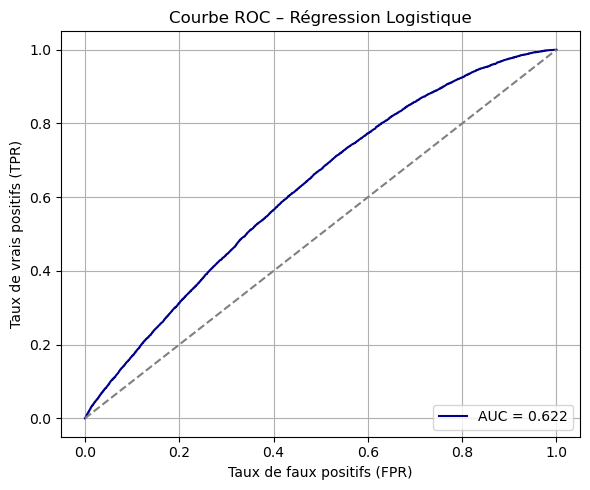

0.6221259253459901

In [1338]:
from sklearn.metrics import roc_curve, roc_auc_score

# Vérification et conversion pour s'assurer que tout est au bon format
X_model_significant = X_model_significant.astype(float)
y_float = y.astype(float)

# Prédiction des probabilités sur le modèle déjà ajusté
y_proba_logit = logit_result_reduced.predict(X_model_significant)

# Courbe ROC
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_float, y_proba_logit)
auc_score_logit = roc_auc_score(y_float, y_proba_logit)

# Affichage de la courbe ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr_logit, tpr_logit, label=f"AUC = {auc_score_logit:.3f}", color="darkblue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Courbe ROC – Régression Logistique")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

auc_score_logit

In [1339]:
# interprétation: 
# L'AUC 0.62 indique une capacité modérée du modèle à détecter les assurés sinistrés et non sinistrés. le modèle n'est pas un bon classificateur.

In [1340]:
ass_nsin.head()

,id_client_x,id_vehicle_x,id_policy,id_year_x,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,id_claim,claim_nb,claim_amount
1,A00036953,V01,A00036953-V01,Year 0,0.50,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,39.0,34.0,1.0,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0,0,0.0,0.0
2,A00079066,V01,A00079066-V01,Year 0,0.50,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,45.0,F,51.0,0.0,6.0,1598.0,113.0,Gasoline,RENAULT,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0,0,0.0,0.0
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,15.0,17.0,17.0,1294.0,100.0,Gasoline,RENAULT,CLIO,18.0,15.0,190.0,Tourism,12517.0,860.0,0,0.0,0.0
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,45.0,F,9.0,0.0,18.0,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0,0,0.0,0.0
5,A00062452,V01,A00062452-V01,Year 0,0.58,4,1.0,1.0,Monthly,No,WorkPrivate,71315,No,34.0,45.0,M,15.0,0.0,5.0,1398.0,55.0,Diesel,PEUGEOT,CLIO,6.0,1.0,154.0,Tourism,11850.0,880.0,0,0.0,0.0


In [1341]:
#ass_sin.drop("sinistre", axis=1, inplace=True) 
ass_sin["sinistre"] = 1  # Tous les assurés de ass_sin ont eu un sinistre

In [1342]:
# suppression des variables inutiles
ass_sin.drop(columns=['id_client_x', 'id_vehicle_x','id_year_x', 'id_claim','drv_age2', 
         'drv_age_lic2','vh_sale_begin','vh_sale_end'],inplace= True) 

In [1343]:
from sklearn.linear_model import LinearRegression 
# 2. Standardiser les variables quantitatives
quant_vars = [
    "drv_age1", "drv_age_lic1",
    "vh_age", "vh_cyl", "vh_din", 
    "vh_speed", "vh_value", "vh_weight"
]
quant_std_vars = [col + "_std" for col in quant_vars]

scaler_sin = StandardScaler()
X_quant_scaled_sin = scaler_sin.fit_transform(ass_sin[quant_vars])
X_quant_scaled_sin_df = pd.DataFrame(X_quant_scaled_sin, columns=quant_std_vars, index=ass_sin.index)

# Ajout des colonnes standardisées
for col in quant_std_vars:
    ass_sin[col] = X_quant_scaled_sin_df[col]

# 3. Encodage one-hot des variables qualitatives
qual_vars = [
    "pol_pay_freq", "pol_payd", "pol_usage", "drv_sex1",
    "drv_drv2", "vh_fuel", "vh_type"
]
X_qual_encoded_sin = pd.get_dummies(ass_sin[qual_vars], drop_first=True)

# 4. Fusion des variables explicatives
X_model_sin = pd.concat([ass_sin[quant_std_vars], X_qual_encoded_sin], axis=1)
y_model_sin = ass_sin["claim_amount"].astype(float)

# Vérification de la structure des données préparées
X_model_sin.shape, y_model_sin.shape

((12650, 19), (12650,))

In [1344]:
# Le Choix est porté sur le Random Forest car il s'agit des données réelles qui ne sont pas linéaires.

In [1345]:
# Réimportation des métriques nécessaires pour évaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Création du modèle Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_model_sin, y_model_sin)

# Prédictions
y_pred_rf_reg = rf_regressor.predict(X_model_sin)

# Robustest du modèle
mse_rf = mean_squared_error(y_model_sin, y_pred_rf_reg)
r2_rf = r2_score(y_model_sin, y_pred_rf_reg)
mae_rf = mean_absolute_error(y_model_sin, y_pred_rf_reg)

mse_rf, mae_rf, r2_rf

(951859.8753520725, 331.9543208578957, 0.8349304319274304)

In [1346]:
# Interprétation: 
# Le modèle Random Forest explique 83 % de la variance des montants de sinistres.

* Les variables qui influencent le plus le montant des sinistres 

C:\Users\cleme\AppData\Local\Temp\ipykernel_2768\2938059742.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




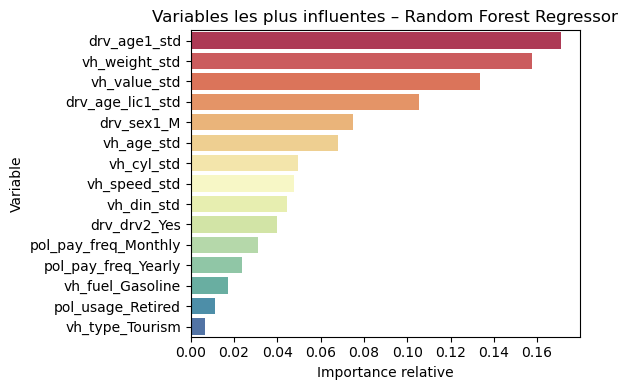

,Variable,Importance
0,drv_age1_std,0.171260
7,vh_weight_std,0.157565
6,vh_value_std,0.133614
1,drv_age_lic1_std,0.105379
15,drv_sex1_M,0.074749
2,vh_age_std,0.067850
3,vh_cyl_std,0.049648
5,vh_speed_std,0.047788
4,vh_din_std,0.044558
16,drv_drv2_Yes,0.039621


In [1347]:
# Récupérer l'importance des variables depuis le modèle Random Forest
importances = rf_regressor.feature_importances_
features = X_model_sin.columns

# Créer un DataFrame trié par importance décroissante
importance_df = pd.DataFrame({
    "Variable": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Afficher les 15 variables les plus importantes
top_vars = importance_df.head(15)

# Visualisation
plt.figure(figsize=(6, 4))
sns.barplot(data=top_vars, x="Importance", y="Variable", palette="Spectral")
plt.title("Variables les plus influentes – Random Forest Regressor")
plt.xlabel("Importance relative")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

top_vars

In [1348]:
# Interprétation: 

# Plus la voiture est chère, le coût des sinistres est élevé pour l'assureur.
# L’ancienneté du contrat reflète la fidélité : un assuré plus ancien, souvent mieux couvert ou plus stable, peut générer des sinistres plus coûteux.
# L’ancienneté du permis reflète l’expérience : les jeunes conducteurs sont plus exposés à des sinistres coûteux par manque de maîtrise.
# L’âge du conducteur influence la conduite : les très jeunes ou très âgés sont plus sujets à des sinistres graves et coûteux.
#Les véhicules neufs entraînent des sinistres plus coûteux, tandis que les anciens, moins valorisés, limitent les réparations.
#Les voitures rapides sont liées à des sinistres plus violents, augmentant la gravité et le coût.
# Le sexe influe sur le risque : les hommes sont statistiquement plus à risque, mais des biais assurantiels
# Les véhicules lourds causent plus de dégâts et coûtent plus cher à réparer.
# La puissance fiscale reflète souvent la puissance réelle du véhicule et son niveau de risque donc les coûts plus élevés.
#La cylindrée indique la puissance plus elle est élevée, plus les sinistres sont graves et donc les seront plus élevés
# Le paiement mensuel, souvent lié à une fragilité financière, peut indiquer un profil plus risqué et donc un coût élevé.
# Une faible ancienneté de situation peut refléter une instabilité, souvent associée à un coût de sinistre plus élevé.
# Un conducteur secondaire augmente l’usage du véhicule, donc le risque et le coût potentiel des sinistres.
# Le paiement annuel reflète un profil plus stable et solvable, lié à des sinistres moins fréquents ou moins graves entrainant un faible coût de sinistre
# Le bonus/malus reflète l’historique de sinistres, influençant surtout la fréquence et non le coût des sinistres..

# Clustering sur la base des assurés non sinistrés afin de créer les profils des clients non sinistrés.

In [1349]:
ass_nsin.head()

,id_client_x,id_vehicle_x,id_policy,id_year_x,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,drv_age2,drv_sex1,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,vh_fuel,vh_make,vh_model,vh_sale_begin,vh_sale_end,vh_speed,vh_type,vh_value,vh_weight,id_claim,claim_nb,claim_amount
1,A00036953,V01,A00036953-V01,Year 0,0.50,4,11.0,1.0,Yearly,No,Retired,67419,Yes,59.0,55.0,M,39.0,34.0,1.0,1997.0,164.0,Diesel,PEUGEOT,RCZ,2.0,1.0,216.0,Tourism,32000.0,1399.0,0,0.0,0.0
2,A00079066,V01,A00079066-V01,Year 0,0.50,4,7.0,1.0,Yearly,No,Retired,69081,No,73.0,45.0,F,51.0,0.0,6.0,1598.0,113.0,Gasoline,RENAULT,SCENIC,8.0,6.0,185.0,Tourism,20800.0,1320.0,0,0.0,0.0
3,A00018024,V01,A00018024-V01,Year 0,0.64,3,5.0,1.0,Yearly,No,WorkPrivate,69270,Yes,35.0,35.0,F,15.0,17.0,17.0,1294.0,100.0,Gasoline,RENAULT,CLIO,18.0,15.0,190.0,Tourism,12517.0,860.0,0,0.0,0.0
4,A00019276,V01,A00019276-V01,Year 0,0.72,1,1.0,1.0,Monthly,No,WorkPrivate,19151,No,32.0,45.0,F,9.0,0.0,18.0,1118.0,49.0,Gasoline,FORD,FIESTA,19.0,17.0,143.0,Tourism,9742.0,820.0,0,0.0,0.0
5,A00062452,V01,A00062452-V01,Year 0,0.58,4,1.0,1.0,Monthly,No,WorkPrivate,71315,No,34.0,45.0,M,15.0,0.0,5.0,1398.0,55.0,Diesel,PEUGEOT,CLIO,6.0,1.0,154.0,Tourism,11850.0,880.0,0,0.0,0.0


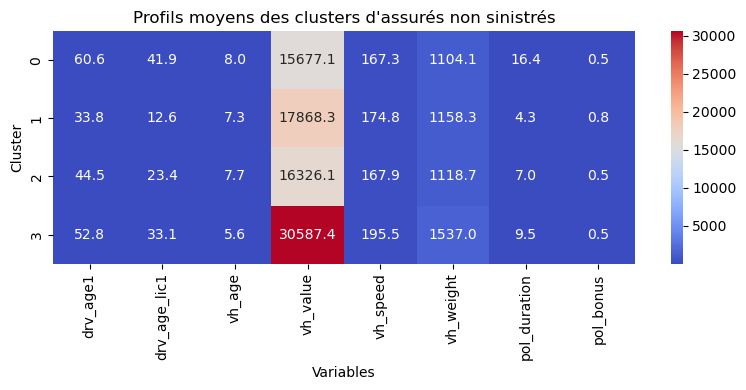

In [1350]:
# Variables quantitatives pertinentes à utiliser pour le clustering
features = ["drv_age1", "drv_age_lic1", "vh_age", "vh_value", "vh_speed", "vh_weight", "pol_duration", "pol_bonus"]

# Nettoyage : suppression des lignes incomplètes
ass_nsin_cluster = df[features].dropna()

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ass_nsin_cluster)

# K-Means avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
ass_nsin_cluster["cluster"] = kmeans.fit_predict(X_scaled)

# Ajout au DataFrame d’origine pour analyse
ass_nsin_result = df.loc[ass_nsin_cluster.index].copy()
ass_nsin_result["cluster"] = ass_nsin_cluster["cluster"]

# Visualisation des profils moyens par cluster
cluster_summary = ass_nsin_result.groupby("cluster")[features].mean()

# visualisation
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_summary, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Profils moyens des clusters d'assurés non sinistrés")
plt.ylabel("Cluster")
plt.xlabel("Variables")
plt.tight_layout()
plt.show()